# Scaling of the mixed layer depth

The purpose of this notbook is to focus on the scaling of the mixed layer deepend by mechanical stress without thermal forcing (cf Pollard 1972) and try to extend this scaling behond the 1st inertial oscilation 

In [73]:
# load required packages
import netCDF4 as nc
import matplotlib.pyplot as plt
import cmocean 
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib import colors
import xarray as xr
from matplotlib.colors import ListedColormap

from IPython.display import display, Math

In [783]:
file_norot        = 'entrainment_norot.nc'
file_norot        = 'entrainment_norot_5j.nc'
file_norot        = 'entrainment_norot_10j.nc'
file_norot        = 'entrainment_norot_10j_bis.nc'
#file_norot        = 'entrainment_norot_30j.nc'
file_u20         = 'u20.nc'

file_rot        = 'entrainment_rot.nc'
file_rot        = 'entrainment_rot_5j.nc'
file_rot        = 'entrainment_rot_10j.nc'
file_rot        = 'entrainment_rot_10j_bis.nc'
file_rot       =  'entrainment_f1e-5.nc'

file_rot        = 'entrainment.nc'
#file_rot        = 'entrainment_rot_30j.nc'
g= 9.81

In [784]:

entrainment_rotdata = nc.Dataset(file_rot)         #  I use netCDF4 to convert the time date in second 
entrainment_rot = xr.open_dataset(file_rot)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)
entrainment_u20data = nc.Dataset(file_u20)         #  I use netCDF4 to convert the time date in second 
entrainment_u20= xr.open_dataset(file_u20) 
entrainment_norotdata = nc.Dataset(file_norot)         #  I use netCDF4 to convert the time date in second 
entrainment_norot = xr.open_dataset(file_norot)        #  I prefer use Xarray because it allow to better visualize the data (variable, shapes etc..)


# model parameters (have to be consistent with gotm.yaml)
NN0     = 1.0e-4                    # initial NN 

lat_rot     = 45.0                      # latitude 
tx      = 0.1027                  # surface stress

# derived parameters
f_rot       = 4.*np.pi/86400.*np.sin(np.pi*lat_rot/180.)      # Coriolis parameter
us      = np.sqrt(tx/1027.)   # surface friction velocity

f=f_rot

In [785]:
def coriolis (lat):
    return 4.*np.pi/86400.*np.sin(np.pi*lat/180.) 

In [786]:
f=coriolis (4)
f

1.0145667845133025e-05

In [787]:
entrainment_norot

<xarray.Dataset>
Dimensions:              (time: 217, lon: 1, lat: 1, z: 1000, zi: 1001)
Coordinates:
  * time                 (time) datetime64[ns] 2005-01-01 ... 2005-01-10
  * lon                  (lon) float32 0.0
  * lat                  (lat) float32 0.0
    z                    (time, z, lat, lon) float32 ...
    zi                   (time, zi, lat, lon) float32 ...
Data variables: (12/117)
    zeta                 (time, lat, lon) float32 ...
    u_taus               (time, lat, lon) float32 ...
    u10                  (time, lat, lon) float32 ...
    v10                  (time, lat, lon) float32 ...
    airt                 (time, lat, lon) float32 ...
    airp                 (time, lat, lon) float32 ...
    ...                   ...
    us0                  (time, lat, lon) float32 ...
    vs0                  (time, lat, lon) float32 ...
    ds                   (time, lat, lon) float32 ...
    Ekin                 (time, lat, lon) float32 ...
    Epot                 (time, lat, lon) float32 ...
    Eturb                (time, lat, lon) float32 ...
Attributes:
    title:    shear-driven entrainment
    comment:  file created by flexout - https://github.com/BoldingBruggeman/f...

Simulation **avec rotation**
- Model de fermeture $k-\epsilon$
- Latitude $45°$


In [788]:
# extract variable for rotation
z             = entrainment_norot.variables['z'][:, :, 0, 0]
zi            = entrainment_norot.variables['zi'][:, :, 0, 0]
t             = entrainment_norotdata.variables['time'][:]
u_norot       = entrainment_norot.variables['u'][:, :, 0, 0]
v_norot       = entrainment_norot.variables['v'][:, :, 0, 0]
NN_norot      = entrainment_norot.variables['NN'][:, :, 0, 0]
#NN_norot      = entrainment_norotdata.variables['NN'][:, :, 0, 0]
u_taus_norot  = entrainment_norot.variables['u_taus'][:, 0, 0]
h_norot       = entrainment_norot.variables['mld_surf'][: , 0, 0]
rho_norot     = entrainment_norot.variables['rho'][: ,:, 0, 0]
Ekin_norot    = entrainment_norot.variables['Ekin'][: , 0, 0]
T_norot       = entrainment_norot.variables['temp'][: ,:, 0, 0]
Epot_norot    = entrainment_norot.variables['Epot'][: , 0, 0]
Eturb_norot   = entrainment_norot.variables['Eturb'][: , 0, 0]
tke_norot     = entrainment_norot.variables['tke'][:, :, 0, 0]
eps_norot     = entrainment_norot.variables['eps'][:, :, 0, 0]
P_norot       = entrainment_norot.variables['P'][:, :, 0, 0]
G_norot       = entrainment_norot.variables['G'][:, :, 0, 0]
num_norot     = entrainment_norot.variables['num'][:, :, 0, 0]
nuh_norot     = entrainment_norot.variables['nuh'][:, :, 0, 0]
nus_norot     = entrainment_norot.variables['nus'][:, :, 0, 0]
avh_norot     = entrainment_norot.variables['avh'][:, :, 0, 0]
b_norot       = entrainment_norot.variables['buoy'][:, :, 0, 0]
cmue1_norot   = entrainment_norot.variables['cmue1'][:, :, 0, 0]

# extract variable for no rotation
z           = entrainment_rot.variables['z'][:, :, 0, 0]
zi          = entrainment_rot.variables['zi'][:, :, 0, 0]
t           = entrainment_rotdata.variables['time'][:]
u_rot       = entrainment_rot.variables['u'][:, :, 0, 0]
v_rot       = entrainment_rot.variables['v'][:, :, 0, 0]
nuh_rot     = entrainment_rot.variables['nuh'][:, :, 0, 0]
NN_rot      = entrainment_rotdata.variables['NN'][:, :, 0, 0]
u_taus_rot  = entrainment_rot.variables['u_taus'][:, 0, 0]
h_rot       = entrainment_rot.variables['mld_surf'][:, 0, 0]
rho_rot     = entrainment_rot.variables['rho'][: ,:, 0, 0]
T_rot       = entrainment_rot.variables['temp'][: ,:, 0, 0]
Ekin_rot    = entrainment_rot.variables['Ekin'][: , 0, 0]
Epot_rot    = entrainment_rot.variables['Epot'][: , 0, 0]
Eturb_rot   = entrainment_rot.variables['Eturb'][: , 0, 0]
Rig_rot     = entrainment_rot.variables['Rig'][: ,:, 0, 0]
Rif_rot     = entrainment_rot.variables['xRf'][: ,:, 0, 0]
tke_rot     = entrainment_rot.variables['tke'][:, :, 0, 0]
eps_rot     = entrainment_rot.variables['eps'][:, :, 0, 0]
P_rot       = entrainment_rot.variables['P'][:, :, 0, 0]
G_rot       = entrainment_rot.variables['G'][:, :, 0, 0]
num_rot     = entrainment_rot.variables['num'][:, :, 0, 0]
nuh_rot     = entrainment_rot.variables['nuh'][:, :, 0, 0]
nus_rot     = entrainment_rot.variables['nus'][:, :, 0, 0]
avh_rot     = entrainment_rot.variables['avh'][:, :, 0, 0]
b_rot       = entrainment_rot.variables['buoy'][:, :, 0, 0]
cmue1_rot   = entrainment_rot.variables['cmue1'][:, :, 0, 0]

z_u20             = entrainment_u20.variables['z'][:, :, 0, 0]
zi_u20            = entrainment_u20.variables['zi'][:, :, 0, 0]
t_u20             = entrainment_u20data.variables['time'][:]
u_u20       = entrainment_u20.variables['u'][:, :, 0, 0]
v_u20       = entrainment_u20.variables['v'][:, :, 0, 0]
NN_u20      = entrainment_u20.variables['NN'][:, :, 0, 0]
#NN_norot      = entrainment_norotdata.variables['NN'][:, :, 0, 0]
u_taus_u20  = entrainment_u20.variables['u_taus'][:, 0, 0]
h_u20       = entrainment_u20.variables['mld_surf'][: , 0, 0]
rho_u20     = entrainment_u20.variables['rho'][: ,:, 0, 0]
Ekin_u20    = entrainment_u20.variables['Ekin'][: , 0, 0]
T_u20       = entrainment_u20.variables['temp'][: ,:, 0, 0]
Epot_u20    = entrainment_u20.variables['Epot'][: , 0, 0]
Eturb_u20   = entrainment_u20.variables['Eturb'][: , 0, 0]
tke_u20     = entrainment_u20.variables['tke'][:, :, 0, 0]
eps_u20     = entrainment_u20.variables['eps'][:, :, 0, 0]
P_u20       = entrainment_u20.variables['P'][:, :, 0, 0]
G_u20       = entrainment_u20.variables['G'][:, :, 0, 0]
num_u20     = entrainment_u20.variables['num'][:, :, 0, 0]
nuh_u20     = entrainment_u20.variables['nuh'][:, :, 0, 0]
nus_u20     = entrainment_u20.variables['nus'][:, :, 0, 0]
avh_u20     = entrainment_u20.variables['avh'][:, :, 0, 0]
b_u20       = entrainment_u20.variables['buoy'][:, :, 0, 0]
cmue1_u20   = entrainment_u20.variables['cmue1'][:, :, 0, 0]

In [789]:
dz = z[0,1].data-z[0,0].data
dt = t[1]-t[0]
NN0     = NN_rot[0,1]
NN0_norot =   NN_norot[0,1]
hours = 3600
hour=3600
#f=f_rot

# %%%%%%%%%%%%% Definition temps inertiel %%%%%%%%%%%%%%%%
if file_norot        == 'entrainment_norot_5j.nc':
    Tf = 1/f
else:
    Tf = 5/f
iTf = np.argmin(np.abs(t-Tf))
#rho0=np.mean(rho_norot[0]).data
rho0=1024

# entrainment depth without rotation (Pollard et al., 1973; Price, 1979)
Rv      = 0.6    # bulk Richardson number  (set by Price 1979) 
h_poll_norot       = (2*Rv)**0.25 * us * (t/np.sqrt(NN0))**0.5


|name |Dimension|Description|
| --- | --- | --- |
| rot |  --- |avec rotation ($f=10^{-4}$) |
| norot |  --- |sans rotation |
| Pe |  kg.s$^{-2}$ |Energie potentiel calculé à partire du profil de densité $\int\rho g z dz$|
| Epot|  kg.m$^2$s$^{-2}$  |Energie potentiel calculé dans gotm (sortie de model)|
| ep | m$^2$ .s$^{-2}$  |Energie potentiel calculé a partir de $b$ $(ep=-zb)$ (non integré sur la vertcale)|
| Epb | kg.s$^{-2}$  |Energie potentiel calculé a partir de $h$ $(Epb = \rho_0 \frac{1}{12} N^2 h^3)$|
| --- |  --- |--- |
| Ke |  kg.s$^{-2}$ |Energie cinétique calculé a partire des sortie de vitesse $\int \rho u^2 +v^2 dz$|
| Ekin |  kg.m$^2$s$^{-2}$ |Energie cinétique calculé dans gotam (sortie de model)|


In [790]:
NN_norot[0].data

array([0.e+00, 1.e-04, 1.e-04, ..., 1.e-04, 1.e-04, 0.e+00], dtype=float32)

In [791]:
num_rot

<xarray.Variable (time: 697, zi: 1001)>
[697697 values with dtype=float32]
Attributes:
    units:          m2/s
    long_name:      turbulent diffusivity of momentum
    standard_name:  ??
    path:           /turbulence

### Definition de l'energie portentiel

In [792]:
Epb_rot = (1/12*NN0)*(rho0)
#Epb_norot = (1/12*NN0*h_norot**3)*(rho0)
Epb_norot = (1/12*NN0_norot)*(rho0)
Epb_rot,Epb_norot

(0.0085333331177632,
 <xarray.Variable ()>
 array(0.00853333))

In [793]:
##### Energire potentiel calculé a partir de la densité ######


Pe_rot  = np.sum(rho_rot*g*z*(dz)  , axis=1)

Pe_norot  = np.sum(rho_norot*g*z*(dz)  , axis=1)

##### Energire potentiel calculé a partir de h ######
Epb_rot = (1/12*NN0*h_rot**3)*(rho0)
#Epb_norot = (1/12*NN0*h_norot**3)*(rho0)
Epb_norot = (1/12*NN0_norot*h_norot**3)*(rho0)

##### Energie potentiel calculé a partir de b ######
ep_rot = -z*b_rot
ep_norot = -z*b_norot


Ep_rot            = np.zeros(t.size)
Ep_norot          = np.zeros(t.size)
for i in range (len(t)):
    Ep_rot[i]     = np.sum((ep_rot[i,:])*dz)*rho0
    Ep_norot[i]   = np.sum((ep_norot[i,:])*dz)*rho0


##### Calcul de TKE #######
TKE_rot = np.sum(tke_rot*(z[0,1].data-z[0,0].data)  , axis=1)
TKE_norot = np.sum(tke_norot*(z[0,1].data-z[0,0].data)  , axis=1)

dPe_rot  = np.gradient(Pe_rot, axis=0)/dt
dEpot_rot = np.gradient(Epot_rot, axis=0)/dt
dEp_rot  = np.gradient(Ep_rot, axis=0)/dt
dEp_rot =  np.gradient(Ep_rot, axis=0)/dt
dTKE_rot = np.gradient(TKE_rot, axis=0)/dt

dPe_norot = np.gradient(Pe_norot, axis=0)/dt
dEpot_norot = np.gradient(Epot_norot, axis=0)/dt
dEp_norot  = np.gradient(Ep_norot, axis=0)/dt
dTKE_norot = np.gradient(TKE_norot, axis=0)/dt



ValueError: operands cannot be broadcast together with mismatched lengths for dimension 'time': (217, 697)

### Definition de l'energie cinetique et des derivé temporelles

In [794]:
ke_rot = rho0*(u_rot**2+v_rot**2)*0.5
ke_norot = rho0*(u_norot**2+v_norot**2)*0.5

Ke_rot = np.sum(ke_rot*(z[0,1].data-z[0,0].data)  , axis=1)
Ke_norot = np.sum(ke_norot*(z[0,1].data-z[0,0].data)  , axis=1)


dKe_rot = np.gradient(Ke_rot, axis=0)/dt
dEkin_rot = np.gradient(Ekin_rot, axis=0)/dt
dKe_norot = np.gradient(Ke_norot, axis=0)/dt
dEkin_norot = np.gradient(Ekin_norot, axis=0)/dt

### Dans le code je devrais aussi deriver l'energie cinétique selon z donc je clarifie ici mes notations
dt_Ekin_rot = dEkin_rot
dt_Ekin_norot = dEkin_norot


## %%%%%%%%%%%%%%%    Moyenne sur plusieurs periodes inertielles  #############
dEk_rot_mean = np.ones(dEkin_rot.size)*np.mean(dEkin_rot[iTf:])
dEk_rot_abs = np.ones(dEkin_rot.size)*np.mean(np.abs(dEkin_rot[iTf:]))
dEp_rot_mean = np.ones(dEpot_rot.size)*np.mean(dEpot_rot[iTf:])
dTKE_rot_mean = np.ones(dTKE_rot.size)*np.mean(dTKE_rot[iTf:])


ValueError: x and y must have same first dimension, but have shapes (697,) and (217,)

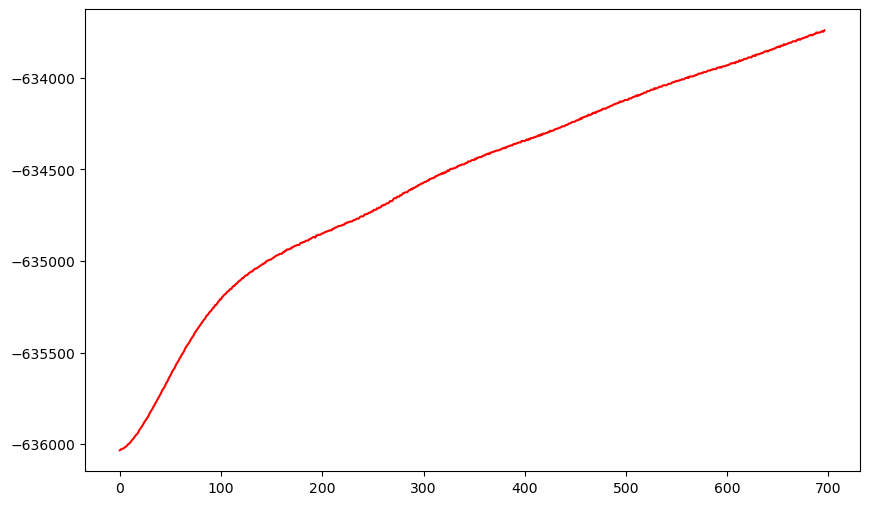

In [795]:

plt.figure(figsize=(10, 6))
plt.plot(t/hours,Pe_rot- Pe_rot[0]+Epot_rot[1],'-', color='r', label=r'$Ep_{rot}$ Calculé a partir de $\rho$')
plt.plot(t/hours,Ep_rot-Ep_rot[0].data+Epot_rot[1].data,'.',color='y', label=r'$Ep_{rot}$ Calculé a partir de b')
plt.plot(t[1:]/hours,Epot_rot[1:],'--', color='b',label='gotm')
plt.plot(t/hours,Epb_rot- Epb_rot[0]+Epot_rot[1],'-', color='g', label='$Epb_{rot}$ Analytique')
plt.legend()
plt.grid()
plt.savefig('evolution_temp_epot')
print(np.min((Pe_rot[1:]- Pe_rot[0]+Epot_rot[1])/Epot_rot[1:]))
plt.savefig('e_pot')

plt.figure(figsize=(10, 6))
plt.plot(t/hours,Pe_norot- Pe_norot[0]+Epot_norot[1],'-', color='r', label=r'$Ep_{norot}$ Calculé a partir de $\rho$')
plt.plot(t/hours,Ep_norot- Ep_norot[0].data+Epot_norot[1].data,'.',color='y', label=r'$Ep_{norot}$ Calculé a partir de b')
plt.plot(t[1:]/hours,Epot_norot[1:],'--', color='b', label='gotm')
plt.plot(t/hours,Epb_norot- Epb_norot[0]+Epot_norot[1],'-', color='g', label='$Epb_{norot}$ Analytique')
plt.legend()
plt.grid()
print(np.min((Pe_norot[1:]- Pe_norot[0]+Epb_norot[1])/Epb_norot[1:]))
#plt.savefig('e_pot')

# Diagnostique de la dissipation $\epsilon$

## plot local de la dissipation


/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/4209963493.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/4209963493.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


TypeError: Length of x (697) must match number of columns in z (217)

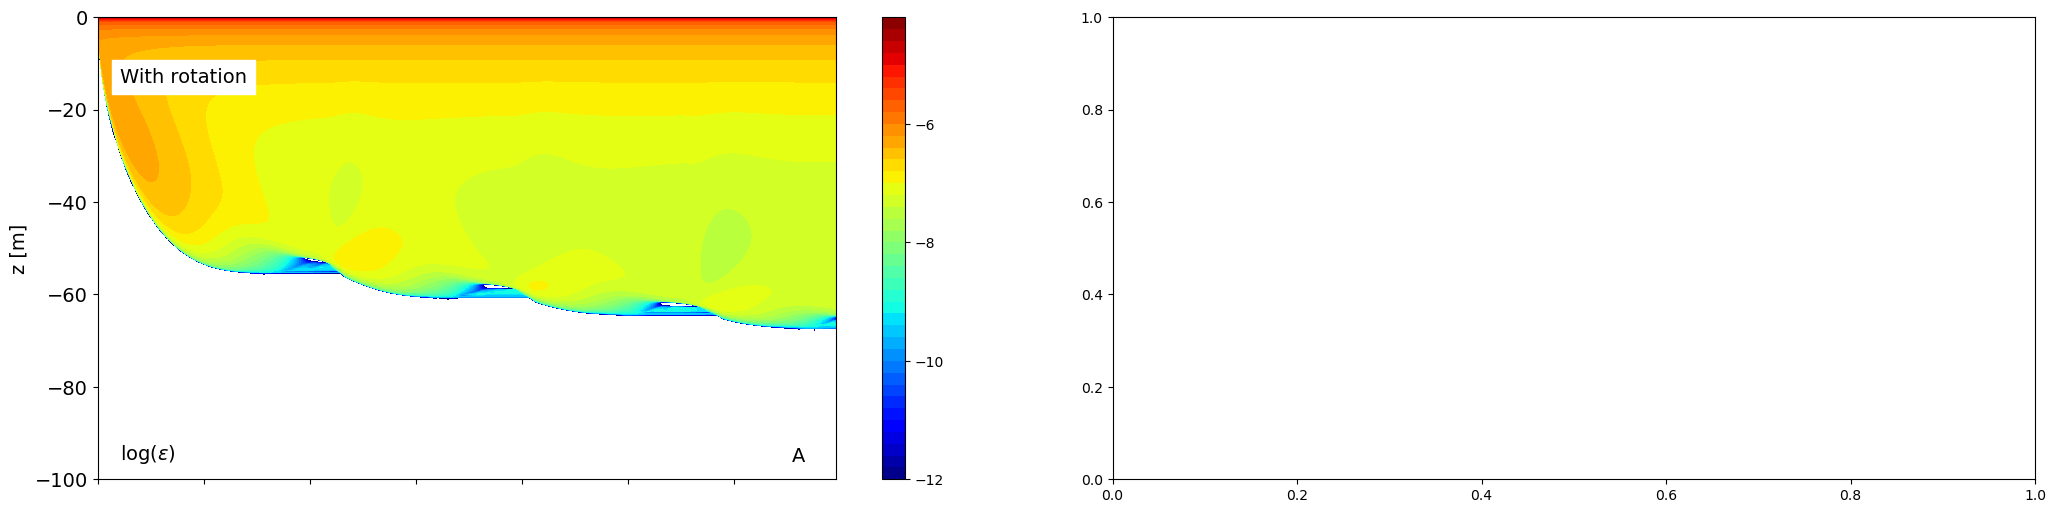

In [796]:
# plot all following profiles at time index iPlt
NT      = t.size
iPlt    = NT-1

#parametre of the plot
H       = - z[iPlt,0]


# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))
plt.subplots_adjust(wspace=0.1)
bprops = {'facecolor': 'white', 'edgecolor': 'none', 'pad': 2}
# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]
Z_interface = np.arange(-7,8,1)

# Plot with rotation
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=40).tick_values(-12, np.log10(eps_rot.max()))
CS1 = ax1.contourf(t/hour, zi1D, np.log10(eps_rot.T), levels=levels, cmap=cmap)
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox={'facecolor': 'white', 'edgecolor': 'none', 'pad': 2})
ax1.text(0.03, 0.03, r'$\log(\epsilon)$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.85, 'With rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
#ax1.set_ylim([-30, 0])
ax1.tick_params(labelsize=14)
ax1.xaxis.set_ticklabels([])
colorbar = fig.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()

# Plot without rotation
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=40).tick_values(-12, np.log10(eps_rot.max()))
CS2 = ax2.contourf(t/hour, zi1D, np.log10(eps_norot.T), levels=levels, cmap=cmap)
ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14)
ax2.text(0.03, 0.03, r'$\log(\epsilon)$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14)
ax2.text(0.03, 0.85, 'No rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
ax2.tick_params(labelsize=14)
ax2.xaxis.set_ticklabels([])
colorbar2 = fig.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()

plt.savefig('log_eps')
plt.show()

# Definition du profil verticale de la vitesse

## Expression analytique de Joel U et he

### Figure avec u sans le sinus

(0.0, 30.0)

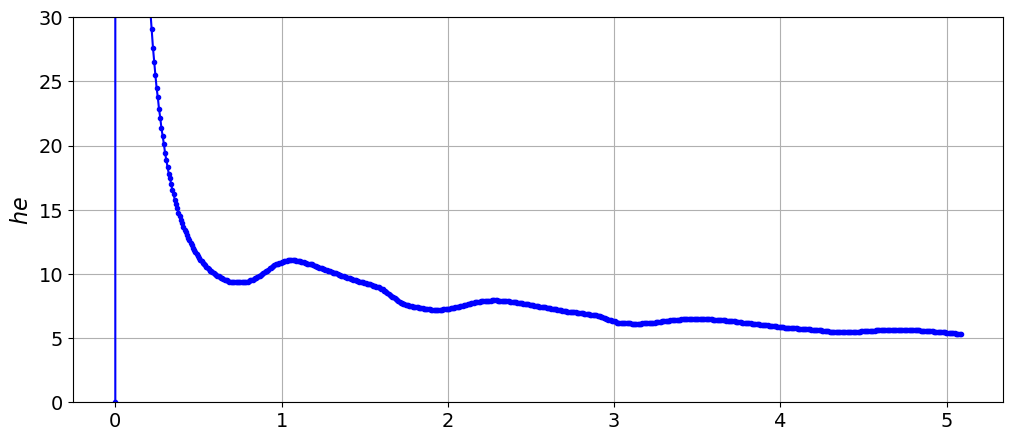

In [797]:
u_p73 = us*(np.sqrt(np.sqrt(NN0)/f))

z0 = -.05
u_jl  = np.zeros(h_rot.size)
u_jl[0] = 0 
u_jl[1:] = u_p73 *((L_p73/h_rot[1:])*np.sin(f*t[1:]) + 1/kappa *np.sqrt(f/np.sqrt(NN0))* (np.log(-h_rot[1:]/z0)-1)  )
#u_jl[1:] = us*((us/(h_rot[1:]*f)*np.sin(f*t[1:]))-1/kappa)
u_jl[-1]

u_bottom  = np.zeros(h_rot.size)
u_bottom[0] = 0 
u_bottom[1:] = u_p73 *((L_p73/h_rot[1:])*(-1) - 1/kappa *np.sqrt(f/np.sqrt(NN0)))

he  = np.zeros(h_rot.size)
he[0] = 0
he[1:] = u_bottom[1:]**2/(NN0  * h_rot[1:])


fig, (ax1) = plt.subplots(1,1,figsize=(12, 5))

# Calcul de t_14
ax1.plot(t/Tf,he[:], '.-', color='b')
ax1.grid()
ax1.set_ylabel(r'$he$ ', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_ylim([0,30])
#plt.savefig('he_f.png')


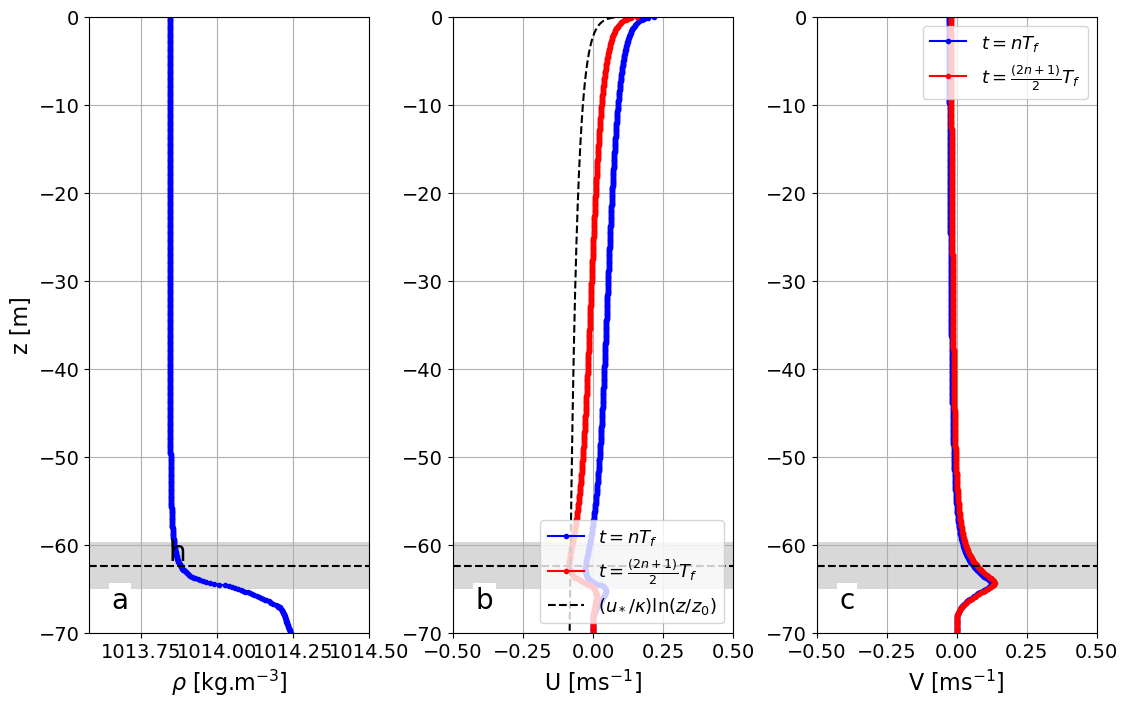

In [798]:
kappa = 0.41
profil_log = -us/kappa*np.log((-z[-1]))+0.02
L_p73 = us/np.sqrt(np.sqrt(NN0)*f)
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(13, 8))

# Calcul de t_14
t_1z = -1/zi[0,:-1] * eps_rot[-1, -3]
t_1z2 = 1/zi[0,:-1]**2 * 2e-5


#######################   plot densité   #######################
ax1.plot(rho_rot[-1], z[-1], '.-', color='b')
ax1.invert_yaxis()
ax1.grid()
ax1.set_ylabel('z [m]', fontsize=16)
ax1.set_xlabel(r'$\rho$ [kg.m$^{-3}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_ylim([-70, 0])
ax1.set_xlim([ 1013.58,1014.5])
ax1.text(0.08, 0.03, 'a', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=20, bbox=bprops)

# Ajout de la ligne horizontale
ax1.axhline(y=-h_rot[-1], color='k', linestyle='--')
ax1.text(1013.9 , -h_rot[-1], 'h', color='k', fontsize=20, va='bottom', ha='right')
# Ajout de l'intervalle coloré
ax1.axhspan(-h_rot[-1] - he[-1]/2, -h_rot[-1] + he[-1]/2, facecolor='gray', alpha=0.3)


#######################   plot U   #######################
ax2.plot(u_rot[-1], z[-1], '.-', color='b',label=r'$t=n T_f$')
ax2.plot(u_rot[-12], z[-1], '.-', color='r',label=r'$t=\frac{(2n+1)}{2} T_f$')
ax2.plot(profil_log, z[-1], '--', color='k', label =r'$(u_*/ \kappa)\ln(z/z_0)$')
ax2.invert_yaxis()
ax2.grid()
#ax2.set_ylabel('z [m]', fontsize=16)
ax2.set_xlabel(r'U [ms$^{-1}$]', fontsize=16)
ax2.tick_params(axis='both', labelsize=14)
ax2.set_ylim([-70, 0])
ax2.set_xlim([-0.5, 0.5])
ax2.legend(fontsize=13,loc='lower right')
ax2.text(0.08, 0.03, 'b', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=20, bbox=bprops)
# Ajout de la ligne horizontale
ax2.axhline(y=-h_rot[-1], color='k', linestyle='--')
#ax2.text(1013.9 , -h_rot[-1], 'h', color='k', fontsize=20, va='bottom', ha='right')
# Ajout de l'intervalle coloré
ax2.axhspan(-h_rot[-1] - he[-1]/2, -h_rot[-1] + he[-1]/2, facecolor='gray', alpha=0.3)

#######################   plot  V  #######################
ax3.plot(v_rot[-1], z[-1], '.-', color='b',label=r'$t=n T_f$')
ax3.plot(v_rot[-6], z[-1], '.-', color='r',label=r'$t=\frac{(2n+1)}{2} T_f$')
#ax3.plot(profil_log, z[-1], '--', color='k')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_ylabel('z [m]', fontsize=16)
ax3.set_xlabel(r'V [ms$^{-1}$]', fontsize=16)
ax3.tick_params(axis='both', labelsize=14)
ax3.set_xlim([-0.5, 0.5])
ax3.set_ylim([-70, 0])
ax3.legend(fontsize=13,loc='upper right')
ax3.text(0.08, 0.03, 'c', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=20, bbox=bprops)
# Ajout de la ligne horizontale
ax3.axhline(y=-h_rot[-1], color='k', linestyle='--')
#ax1.text(1013.9 , -h_rot[-1], 'h', color='k', fontsize=20, va='bottom', ha='right')
# Ajout de l'intervalle coloré
ax3.axhspan(-h_rot[-1] - he[-1]/2, -h_rot[-1] + he[-1]/2, facecolor='gray', alpha=0.3)


plt.subplots_adjust(wspace=0.3)

#plt.savefig('profil_vertical_rho_u_v_f.png')

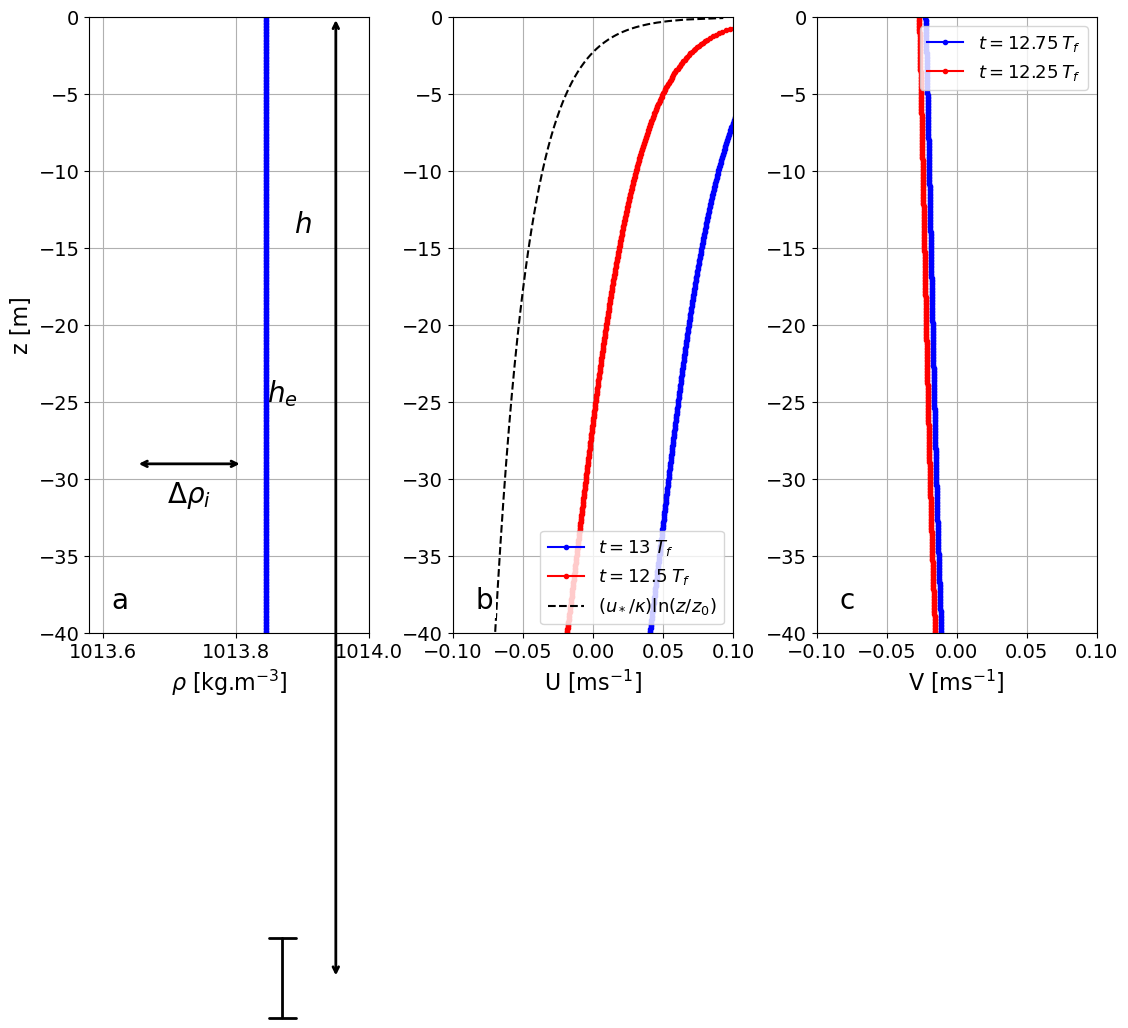

In [799]:
profil_log = -us/kappa*np.log((-z[-1]))+0.02
L_p73 = us/np.sqrt(np.sqrt(NN0)*f)
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(13, 8))

# Calcul de t_14
t_1z = -1/zi[0,:-1] * eps_rot[-1, -3]
t_1z2 = 1/zi[0,:-1]**2 * 2e-5


#######################   plot densité   #######################
ax1.plot(rho_rot[-1], z[-1], '.-', color='b')
ax1.invert_yaxis()
ax1.grid()
ax1.set_ylabel('z [m]', fontsize=16)
ax1.set_xlabel(r'$\rho$ [kg.m$^{-3}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_ylim([-40, 0])
ax1.set_xlim([ 1013.58,1014])
ax1.text(0.08, 0.03, 'a', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=20, bbox=bprops)
ax1.annotate('', xy=(1013.65, -29), xytext=(1013.81, -29),
             arrowprops=dict(arrowstyle='<->', linewidth=2), annotation_clip=False)
ax1.text(1013.73, -31.5, r'$\Delta \rho_i$', fontsize=20, ha='center')

ax1.annotate('', xy=(1013.87, -h_rot[-1] - he[-1]/2-0.1), xytext=(1013.87,-h_rot[-1] + he[-1]/2+0.1),
             arrowprops=dict(arrowstyle='|-|', linewidth=2), annotation_clip=False)
ax1.text(1013.87, -25., r'$h_e$', fontsize=20, ha='center')

ax1.annotate('', xy=(1013.95, 0), xytext=(1013.95, -h_rot[-1]),
             arrowprops=dict(arrowstyle='<->', linewidth=2), annotation_clip=False)
ax1.text(1013.9, -14., r'$h$', fontsize=20, ha='center')



# Ajout de la ligne horizontale
ax1.axhline(y=-h_rot[-1], color='k', linestyle='--')
#ax1.text(1013.9 , -h_rot[-1], 'h', color='k', fontsize=20, va='bottom', ha='right')
# Ajout de l'intervalle coloré
ax1.axhspan(-h_rot[-1] - he[-1]/2, -h_rot[-1] + he[-1]/2, facecolor='gray', alpha=0.3)


#######################   plot U   #######################
ax2.plot(u_rot[-1], z[-1], '.-', color='b',label=r'$t=13\: T_f$')
ax2.plot(u_rot[-12], z[-1], '.-', color='r',label=r'$t=12.5 \: T_f$')
ax2.plot(profil_log, z[-1], '--', color='k', label =r'$(u_*/ \kappa)\ln(z/z_0)$')
ax2.invert_yaxis()
ax2.grid()
#ax2.set_ylabel('z [m]', fontsize=16)
ax2.set_xlabel(r'U [ms$^{-1}$]', fontsize=16)
ax2.tick_params(axis='both', labelsize=14)
ax2.set_ylim([-40, 0])
ax2.set_xlim([-0.1, 0.1])
ax2.legend(fontsize=13,loc='lower right')
ax2.text(0.08, 0.03, 'b', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=20, bbox=bprops)

# Ajout de la ligne horizontale
ax2.axhline(y=-h_rot[-1], color='k', linestyle='--')
#ax2.text(1013.9 , -h_rot[-1], 'h', color='k', fontsize=20, va='bottom', ha='right')
# Ajout de l'intervalle coloré
ax2.axhspan(-h_rot[-1] - he[-1]/2, -h_rot[-1] + he[-1]/2, facecolor='gray', alpha=0.3)


#######################   plot  V  #######################
ax3.plot(v_rot[-6], z[-1], '.-', color='b',label=r'$t=12.75 \:T_f$')
ax3.plot(v_rot[-18], z[-1], '.-', color='r',label=r'$t=12.25 \:T_f$')
#ax3.plot(profil_log, z[-1], '--', color='k')
ax3.invert_yaxis()
ax3.grid()
#ax3.set_ylabel('z [m]', fontsize=16)
ax3.set_xlabel(r'V [ms$^{-1}$]', fontsize=16)
ax3.tick_params(axis='both', labelsize=14)
ax3.set_xlim([-0.1, 0.1])
ax3.set_ylim([-40, 0])
ax3.legend(fontsize=13,loc='upper right')
ax3.text(0.08, 0.03, 'c', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=20, bbox=bprops)

# Ajout de la ligne horizontale
ax3.axhline(y=-h_rot[-1], color='k', linestyle='--')
#ax1.text(1013.9 , -h_rot[-1], 'h', color='k', fontsize=20, va='bottom', ha='right')
# Ajout de l'intervalle coloré
ax3.axhspan(-h_rot[-1] - he[-1]/2, -h_rot[-1] + he[-1]/2, facecolor='gray', alpha=0.3)



plt.subplots_adjust(wspace=0.3)

#plt.savefig('profil_vertical_rho_u_v_f.png')

# Profil dissipation


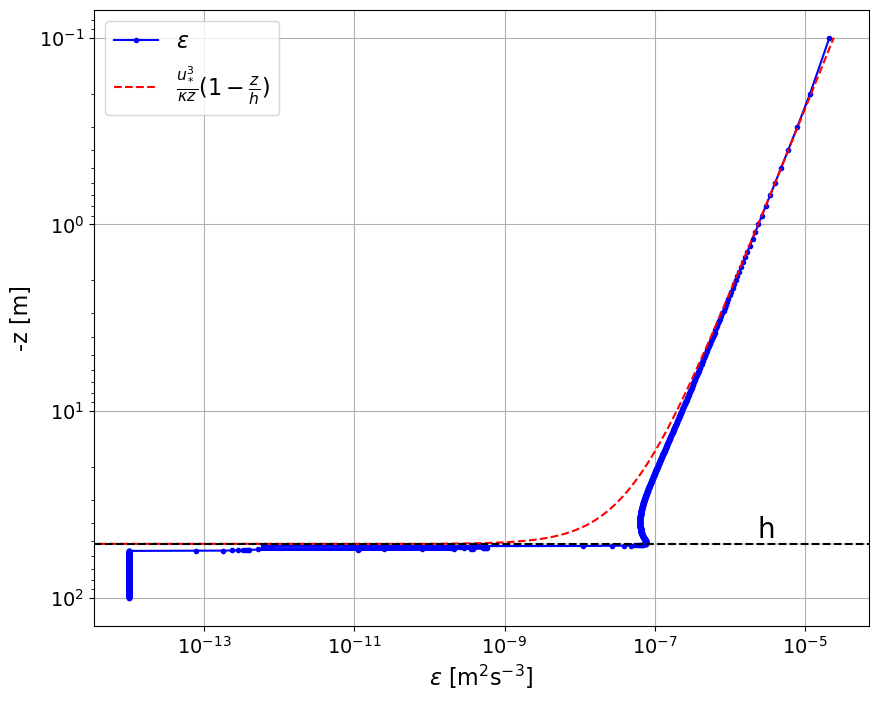

In [758]:
fig, (ax1) = plt.subplots(1,1,figsize=(10, 8))

z0 = 0.02
# Calcul de t_14
t_1z = -1/zi[0,:-1] * eps_rot[-1, -3]
t_1z2 = -us**3/zi[0,:-1]/kappa
t_1z3 = (-us**3/zi[0,:-1]/kappa)*(1+ zi[0,:-1]/h_rot[-1])

ax1.plot(eps_rot[-1,:-1], -zi[-1,:-1], '.-', color='b', label ='$\epsilon$')
#ax1.plot(t_1z2, -zi[-1,:-1], '--', color='k', label=r'$\frac{u_*^3}{\kappa z}$')
ax1.plot(t_1z3, -zi[-1,:-1], '--', color='r', label=r'$\frac{u_*^3}{\kappa z} (1- \frac{z}{h})$')
ax1.invert_yaxis()

ax1.grid()
ax1.set_ylabel('-z [m]', fontsize=16)
ax1.set_xlabel(r'$\epsilon$ [m$^2$s$^{-3}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
#ax1.set_ylim([-40, 0])
ax1.set_xscale('log')
ax1.set_yscale('log')


# Ajout de la ligne horizontale
ax1.axhline(y=h_rot[-1], color='k', linestyle='--')
ax1.text(.4e-5  , h_rot[-1], 'h', color='k', fontsize=20, va='bottom', ha='right')
# Ajout de l'intervalle coloré
ax1.axhspan(h_rot[-1] - he[-1]/2, +h_rot[-1] + he[-1]/2, facecolor='gray', alpha=0.3)


plt.legend(fontsize=16)

#plt.savefig('profil_vertical_eps_log.png')








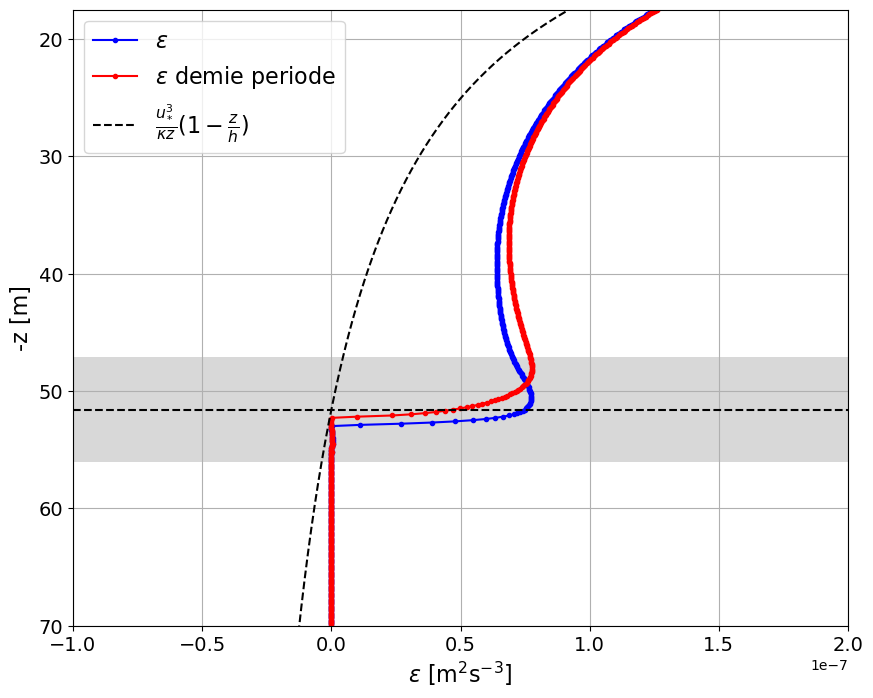

In [773]:
fig, (ax1) = plt.subplots(1,1,figsize=(10, 8))


z0 = 0.005
# Calcul de t_14
t_1z = -1/zi[0,:-1] * eps_rot[-1, -3]
t_1z2 = -us**3/zi[0,:-1]/kappa
t_1z3 = (-us**3/(kappa*(zi[0,:-1]+z0)))*(1+ zi[0,:-1]/h_rot[-1])

ax1.plot(eps_rot[-1,:-1], -zi[-1,:-1], '.-', color='b', label ='$\epsilon$')
ax1.plot(eps_rot[-12,:-1], -zi[-1,:-1], '.-', color='r', label ='$\epsilon$ demie periode')
#ax1.plot(t_1z2, -zi[-1,:-1], '--', color='k', label=r'$\frac{u_*^3}{\kappa z}$')
ax1.plot(t_1z3, -zi[-1,:-1], '--', color='k', label=r'$\frac{u_*^3}{\kappa z} (1- \frac{z}{h})$')
ax1.invert_yaxis()

ax1.grid()
ax1.set_ylabel('-z [m]', fontsize=16)
ax1.set_xlabel(r'$\epsilon$ [m$^2$s$^{-3}$]', fontsize=16)

# Ajout de la ligne horizontale
ax1.axhline(y=h_rot[-1], color='k', linestyle='--')
#ax1.axhline(y=h_rot[-12], color='k', linestyle='--')
#ax1.text(.4e-5  , h_rot[-1], 'h', color='k', fontsize=20, va='bottom', ha='right')
# Ajout de l'intervalle coloré
ax1.axhspan(h_rot[-1] - he[-1]/2, +h_rot[-1] + he[-1]/2, facecolor='gray', alpha=0.3)
#ax1.axhspan(h_rot[-12] - he[-12]/2, +h_rot[-12] + he[-12]/2, facecolor='gray', alpha=0.3)

ax1.tick_params(axis='both', labelsize=14)
ax1.set_ylim([70, 17.5])
ax1.set_xlim([-1e-7, 0.2e-6])
#ax1.set_xscale('log')
#ax1.set_yscale('log')
plt.legend(fontsize=16)

#plt.savefig('profil_vertical_eps_he_f.png')



## serie temporel de $\epsilon(-h+he)$

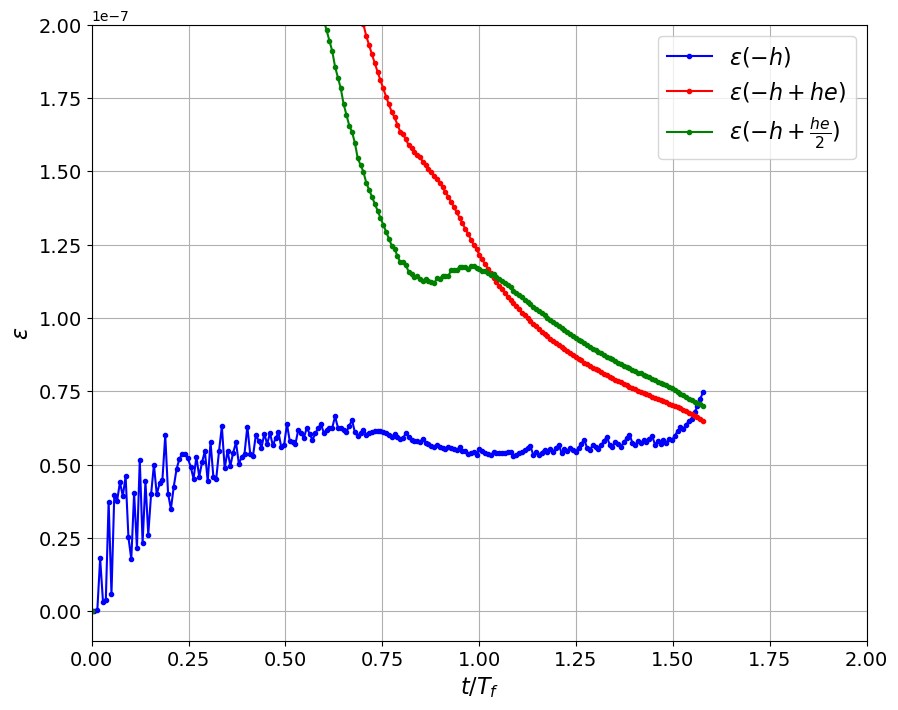

In [775]:
###### Indice del'interface de la couche de mélange et zone stablement stratifié #### 
idh_rot = np.zeros(len(t),dtype=np.int64)
idh_he_rot = np.zeros(len(t),dtype=np.int64)
idh_he2_rot = np.zeros(len(t),dtype=np.int64)
for i in range (len(t)):
    idh_rot[i]= np.argmin(np.abs(z[i].data+h_rot[i].data))
    idh_he2_rot[i]= np.argmin(np.abs(z[i].data+h_rot[i].data-he[i]/2))
    idh_he_rot[i]= np.argmin(np.abs(z[i].data+h_rot[i].data-he[i]))

### Calcul de epsilon moyen dans la MLD#####
eps_h_he2= np.zeros((len(t)))
eps_h_he= np.zeros((len(t)))
eps_h= np.zeros((len(t)))

for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_he_rot[i]
    j3 = idh_he2_rot[i]
    #print(j1,j2)
    eps_h_he[i] =  eps_rot[i,j2] 
    eps_h_he2[i] =  eps_rot[i,j3]         
    eps_h[i]    =  eps_rot[i,j1]

fig, (ax1) = plt.subplots(1,1,figsize=(10, 8))

# Calcul de t_14
ax1.plot(t/Tf,eps_h,'.-', color='b', label = r'$\epsilon(-h)$')
ax1.plot(t/Tf,eps_h_he,'.-', color='r', label = r'$\epsilon(-h+he)$')
ax1.plot(t/Tf,eps_h_he2,'.-', color='g', label = r'$\epsilon(-h+\frac{he}{2})$')
#ax1.plot(t/Tf,u_jl[:]/u_p73, '-', color='r')
#ax1.plot(t/Tf,v_rot[:,-1], '.-', color='r')
ax1.grid()
plt.legend(fontsize=16)
ax1.set_ylabel(r'$\epsilon$ ', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_xlim([0, 2])
ax1.set_ylim([-1e-8, 2e-7])
ax1.set_xlabel('$t/T_f$ ', fontsize=16)
#plt.savefig('time_serie_eps_he_f.png')

# Profil de B


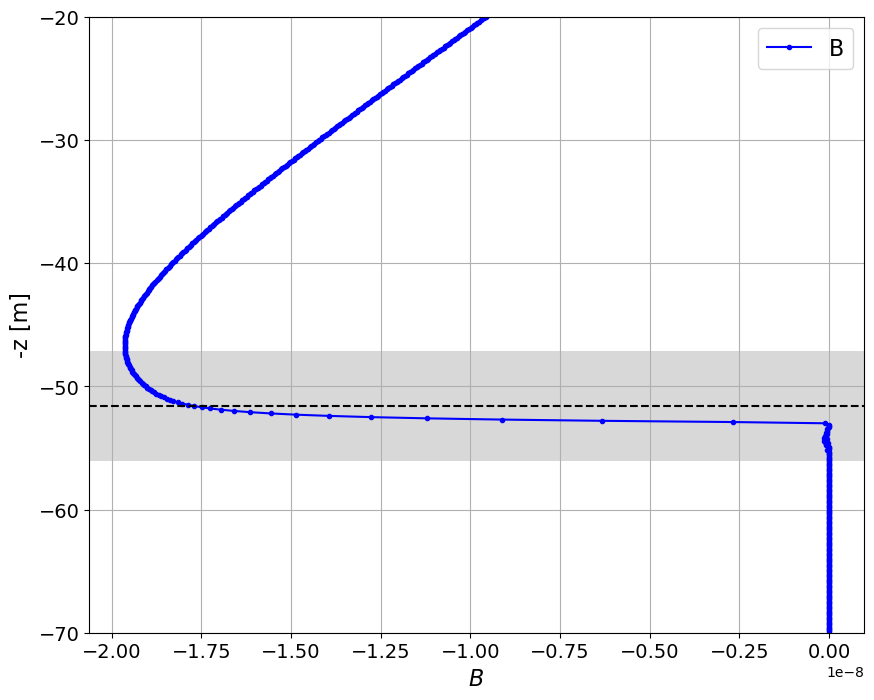

In [776]:
plt.figure(figsize=(10, 8))

plt.plot(G_rot[-1,:],zi[-1], '.-', color='b', label ='B')
plt.ylim([-70, -20])
#plt.xlim([-30, -10])

plt.axhline(y=-h_rot[-1], color='k', linestyle='--')
# Ajout de l'intervalle coloré
plt.axhspan(-h_rot[-1] - he[-1]/2, -h_rot[-1] + he[-1]/2, facecolor='gray', alpha=0.3)


plt.ylabel('-z [m]', fontsize=16)
plt.xlabel(r'$B$ ', fontsize=16)
plt.tick_params(axis='both', labelsize=14)


plt.legend(fontsize=16)
plt.grid()
#plt.savefig('profil_vertical_B_f.png')



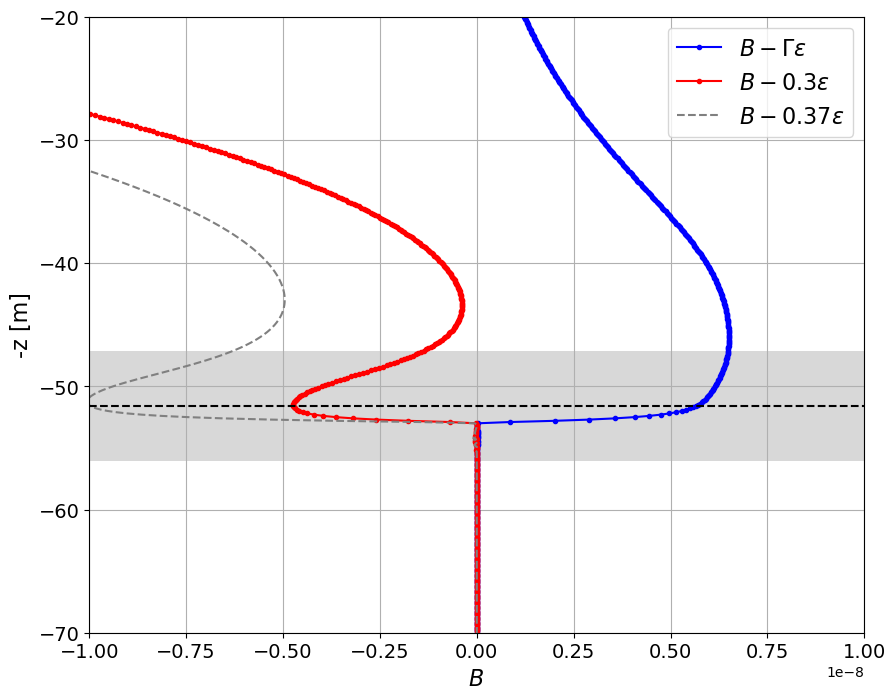

In [779]:
# Definition de Gamma 
Gamma_bulk = 0.3
gamma = -G_rot[-1,:]/(-G_rot[-1,:]+P_rot[-1,:])

plt.figure(figsize=(10, 8))

plt.plot(-G_rot[-1,:]-gamma*eps_rot[-1,:],zi[-1], '.-', color='b', label =r'$B-\Gamma \epsilon$')
plt.plot(-G_rot[-1,:]-.3*eps_rot[-1,:],zi[-1], '.-', color='r', label =r'$B-0.3 \epsilon$')
plt.plot(-G_rot[-1,:]-.37*eps_rot[-1,:],zi[-1], '--', color='gray', label =r'$B-0.37 \epsilon$')
plt.ylim([-70, -20])
plt.xlim([-1e-8, 1e-8])

plt.axhline(y=-h_rot[-1], color='k', linestyle='--')
# Ajout de l'intervalle coloré
plt.axhspan(-h_rot[-1] - he[-1]/2, -h_rot[-1] + he[-1]/2, facecolor='gray', alpha=0.3)
#plt.axhline(y=-h_rot[-1]+he[-1], color='gray', linestyle='--')

plt.ylabel('-z [m]', fontsize=16)
plt.xlabel(r'$B$ ', fontsize=16)
plt.tick_params(axis='both', labelsize=14)


plt.legend(fontsize=16)
plt.grid()
#plt.savefig('profil_vertical_B_gamma_eps_f.png')


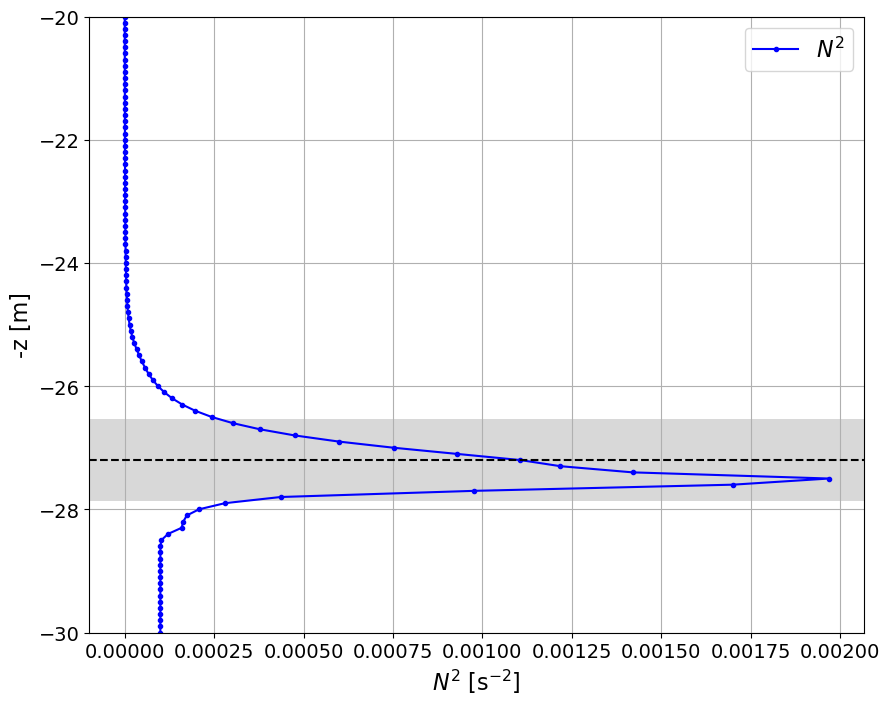

In [646]:
plt.figure(figsize=(10, 8))

plt.plot(NN_rot[-1,:],zi[-1], '.-', color='b', label ='$N^2$')
plt.ylim([-30, -20])
#plt.xlim([-30, -10])

# Ajout de la ligne horizontale
plt.axhline(y=-h_rot[-1], color='k', linestyle='--')
# Ajout de l'intervalle coloré
plt.axhspan(-h_rot[-1] - he[-1]/2, -h_rot[-1] + he[-1]/2, facecolor='gray', alpha=0.3)

plt.ylabel('-z [m]', fontsize=16)
plt.xlabel(r'$N^2$ [s$^{-2}$]', fontsize=16)
plt.tick_params(axis='both', labelsize=14)


plt.legend(fontsize=16)
plt.grid()
plt.savefig('profil_vertical_N2.png')


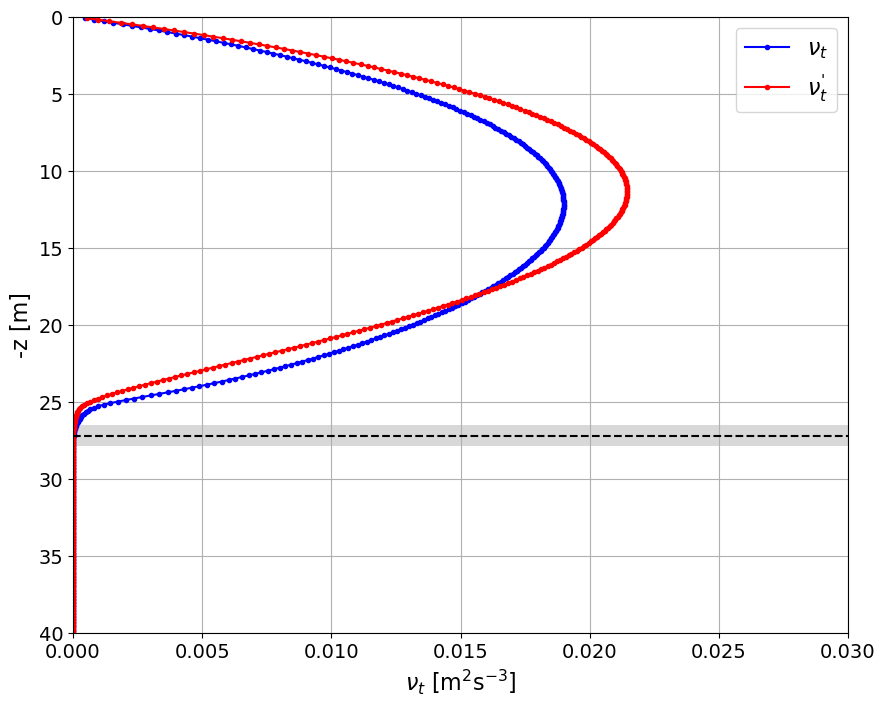

In [731]:
fig, (ax1) = plt.subplots(1,1,figsize=(10, 8))

# Calcul de t_14
t_1z = -1/zi[0,:-1] * eps_rot[-1, -3]
t_1z2 = -us*zi[0,:-1]*kappa


ax1.plot(num_rot[-1,:-1], -zi[-1,:-1], '.-', color='b', label =r'$\nu_t$')
ax1.plot(nuh_rot[-1,:-1], -zi[-1,:-1], '.-', color='r', label =r"$\nu^'_t$")
#ax1.plot(t_1z2, -zi[-1,:-1], '--', color='k', label=r'$\frac{u_*^3}{\kappa z}$')

ax1.invert_yaxis()

ax1.grid()
ax1.set_ylabel('-z [m]', fontsize=16)
ax1.set_xlabel(r'$\nu_t$ [m$^2$s$^{-3}$]', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_ylim([40, 0])
ax1.set_xlim([0, 0.03])
#ax1.set_xscale('log')
#ax1.set_yscale('log')
plt.legend(fontsize=16)
# Ajout de la ligne horizontale
plt.axhline(y=h_rot[-1], color='k', linestyle='--')
# Ajout de l'intervalle coloré
plt.axhspan(h_rot[-1] - he[-1]/2, h_rot[-1] + he[-1]/2, facecolor='gray', alpha=0.3)

plt.savefig('profil_vertical_nut_f.png')








(1e-17, 2e-07)

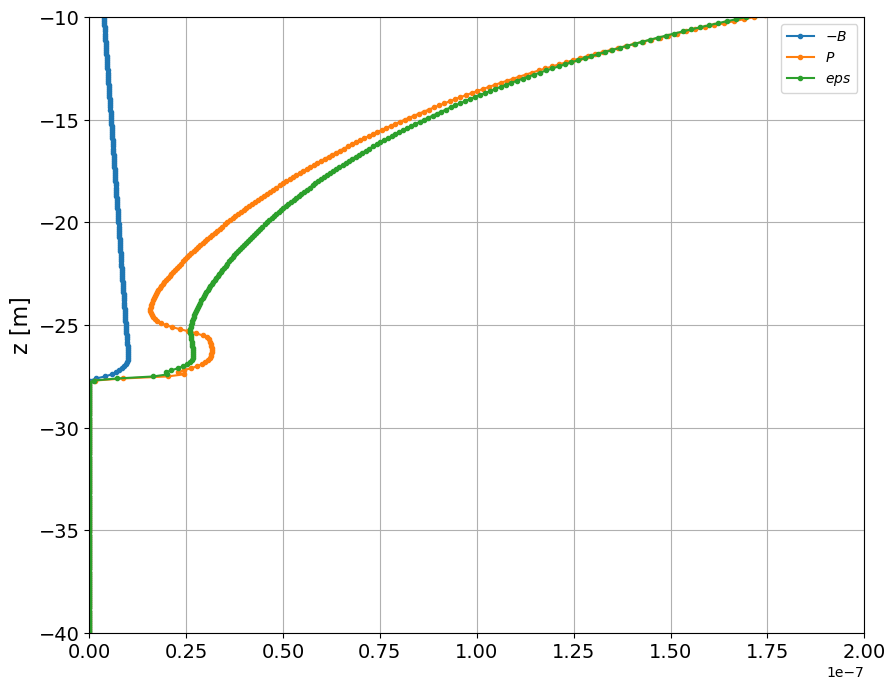

In [447]:

# Dernier instant
last_index = -1


# Sélectionner les données au dernier instant
P_rot_last = P_rot[last_index, :-1]

eps_rot_last = eps_rot[last_index, :-1]
G_rot_last = G_rot[last_index, :-1]
zi_last = zi1D[:-1]

Ri_f = -G_rot_last/P_rot_last
#Ri_f = np.where((P_rot_last < 1e-10), 0, Ri_f)
#Ri_f = np.where((Ri_f> 1), 0, Ri_f)
#gamma = Ri_f/(1+Ri_f)
gamma = -G_rot_last/(-G_rot_last+P_rot_last)
# Créer un nouveau graphique
# Création de la figure et du graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer la fonction existante
ax.plot(-G_rot_last, zi[-1, :-1],'.-', label=r'$-B$')
ax.plot(P_rot_last, zi[-1, :-1],'.-', label=r'$P$')
ax.plot(eps_rot_last, zi[-1, :-1],'.-', label=r'$eps$')
# Tracer la nouvelle fonction
#ax.plot(custom_function_values, z_custom_function, label='Approximated Function', linestyle='--', color='red')

# Inverser l'axe y
ax.invert_yaxis()

# Ajouter une légende
ax.legend()

# Grille
ax.grid()

# Ajouter des labels et ajuster les paramètres de l'axe
ax.set_ylabel('z [m]', fontsize=16)
#ax.set_xlabel(, fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylim([-40, -10])
ax.set_xlim([1e-17, .2e-6])
#ax.set_xscale('log')


In [448]:
720*4.8e-5/0.5

0.06912

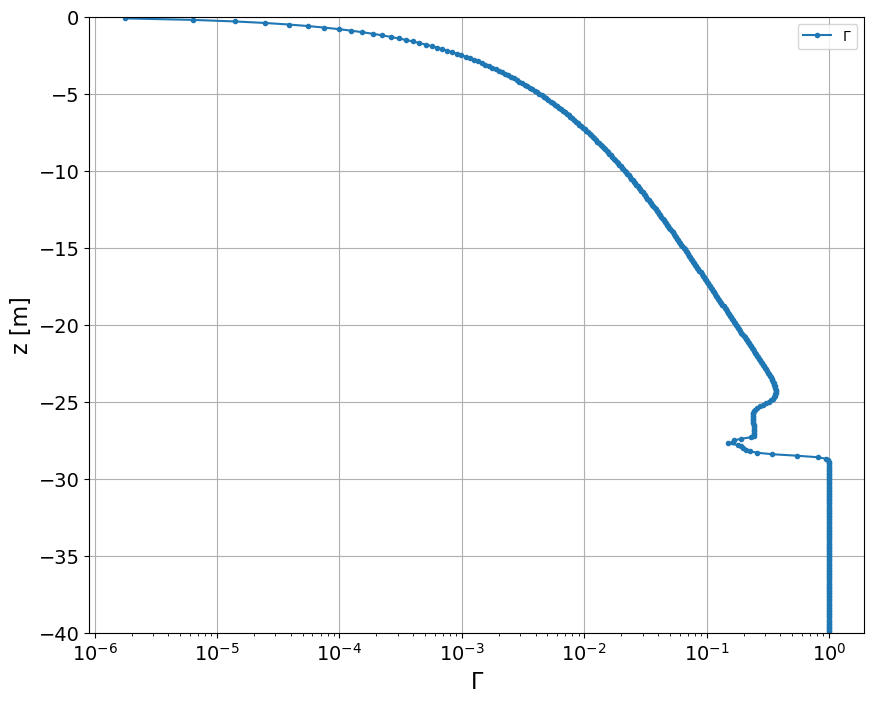

In [449]:

# Création de la fonction spécifiée
def custom_function(z):
    result = np.zeros_like(z)
    mask1 = (z >= 24) & (z <= 28)
    mask2 = (z > 0) & (z < 24) | (z >= 28) & (z <= 40)
    result[mask1] = 0.5
    result[mask2] = 0
    return result

# Création du tableau de z pour la nouvelle fonction
z_custom_function = -zi[-1, :-1]

# Calcul des valeurs de la nouvelle fonction
custom_function_values = custom_function(z_custom_function)

# Création de la figure et du graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer la fonction existante
ax.plot(gamma, zi[-1, :-1],'.-', label=r'$\Gamma$')

# Tracer la nouvelle fonction
#ax.plot(custom_function_values, z_custom_function, label='Approximated Function', linestyle='--', color='red')

# Inverser l'axe y
ax.invert_yaxis()

# Ajouter une légende
ax.legend()

# Grille
ax.grid()

# Ajouter des labels et ajuster les paramètres de l'axe
ax.set_ylabel('z [m]', fontsize=16)
ax.set_xlabel(r'$\Gamma$', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylim([-40, 0])
#ax.set_xlim([-0.5, 1])
ax.set_xscale('log')
# Sauvegarder le graphique
plt.savefig('profil_vertical_gamma1')

# Afficher le graphique
plt.show()

In [780]:
z0 = -0.2
u_jl  = np.zeros(h_rot.size)
u_jl[0] = 0 
u_jl[1:] = u_p73 *((L_p73/h_rot[1:])*np.sin(f*t[1:]) + 1/kappa *np.sqrt(f/np.sqrt(NN0))* (np.log(-h_rot[1:]/z0)-1)  )
#u_jl[1:] = us*((us/(h_rot[1:]*f)*np.sin(f*t[1:]))-1/kappa)
u_jl[-1]

0.30194483367388886

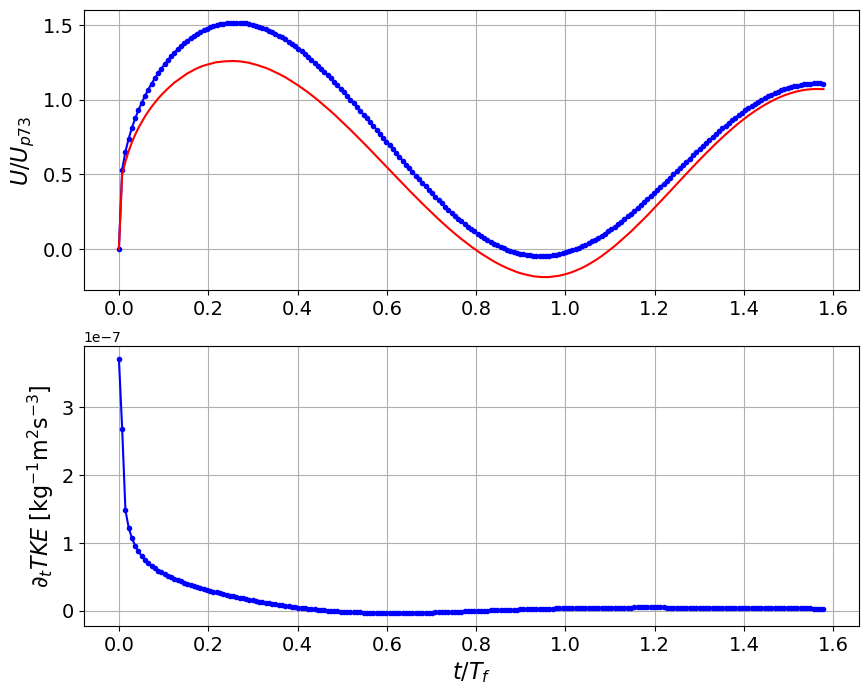

In [781]:
k_rot = tke_rot
dt_tke_rot  =  np.gradient(k_rot, axis = 0)/dt 
Dt_Tke_rot    = np.zeros(t.size)
for i in range (len(t)):
    Dt_Tke_rot[i]    = np.sum((dt_tke_rot[i,:])*dz)
    
z0 = -.05
u_jl  = np.zeros(h_rot.size)
u_jl[0] = 0 
u_jl[1:] = u_p73 *((L_p73/h_rot[1:])*np.sin(f*t[1:]) + 1/kappa *np.sqrt(f/np.sqrt(NN0))* (np.log(-h_rot[1:]/z0)-1)  )
#u_jl[1:] = us*((us/(h_rot[1:]*f)*np.sin(f*t[1:]))-1/kappa)
u_jl[-1]

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10, 8))

# Calcul de t_14
ax1.plot(t/Tf,u_rot[:,-1]/u_p73, '.-', color='b')
ax1.plot(t/Tf,u_jl[:]/u_p73, '-', color='r')
#ax1.plot(t/Tf,v_rot[:,-1], '.-', color='r')
ax1.grid()
ax1.set_ylabel(r'$U/U_{p73}$ ', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)

ax2.plot(t/Tf,Dt_Tke_rot, '.-', color='b')
ax2.grid()
ax2.set_xlabel('$t/T_f$ ', fontsize=16)
ax2.set_ylabel(r'$\partial_t TKE $ [kg$^{-1}$m$^2$s$^{-3}$]', fontsize=16)
ax2.tick_params(axis='both', labelsize=14)
plt.subplots_adjust(wspace=0.3)
#plt.savefig('evol_tke')



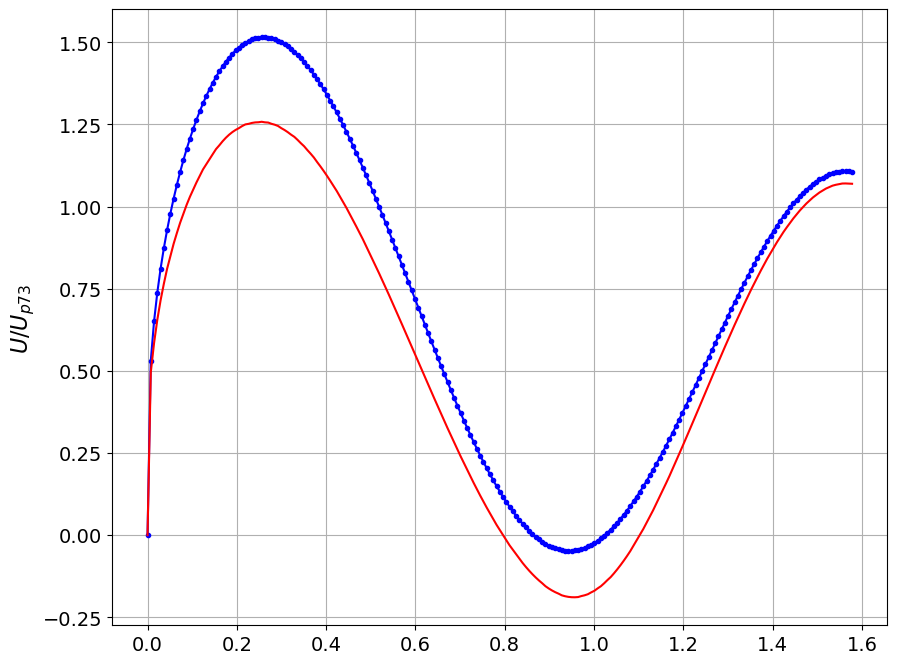

In [782]:
k_rot = tke_rot
dt_tke_rot  =  np.gradient(k_rot, axis = 0)/dt 
Dt_Tke_rot    = np.zeros(t.size)
for i in range (len(t)):
    Dt_Tke_rot[i]    = np.sum((dt_tke_rot[i,:])*dz)
    
z0 = -0.05
u_jl  = np.zeros(h_rot.size)
u_jl[0] = 0 
u_jl[1:] = u_p73 *((L_p73/h_rot[1:])*np.sin(f*t[1:]) + 1/kappa *np.sqrt(f/np.sqrt(NN0))* (np.log(-h_rot[1:]/z0)-1)  )
#u_jl[1:] = us*((us/(h_rot[1:]*f)*np.sin(f*t[1:]))-1/kappa)
u_jl[-1]

fig, (ax1) = plt.subplots(1,1,figsize=(10, 8))

# Calcul de t_14
ax1.plot(t/Tf,u_rot[:,-1]/u_p73, '.-', color='b')
ax1.plot(t/Tf,u_jl[:]/u_p73, '-', color='r')
#ax1.plot(t/Tf,v_rot[:,-1], '.-', color='r')
ax1.grid()
ax1.set_ylabel(r'$U/U_{p73}$ ', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)


#plt.savefig('evol_tke')



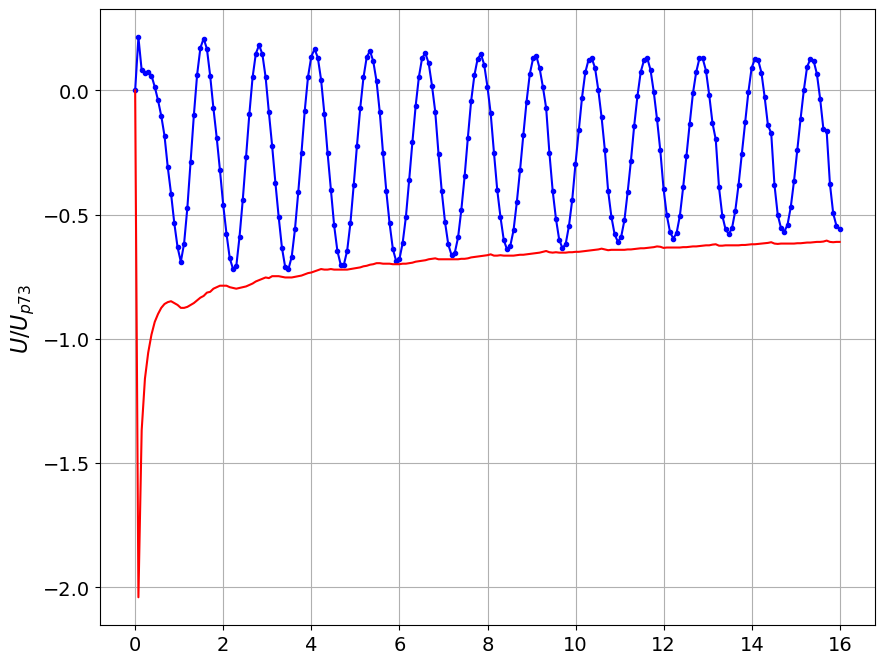

In [453]:
###### Indice del'interface de la couche de mélange et zone stablement stratifié #### 
idh_rot = np.zeros(len(t),dtype=np.int64)
idh_norot = np.zeros(len(t),dtype=np.int64)
for i in range (len(t)):
    idh_rot[i]= np.argmin(np.abs(z[i].data+h_rot[i].data))+4
    idh_norot[i]= np.argmin(np.abs(z[i].data+h_norot[i].data))+4


### Calcul de epsilon moyen dans la MLD#####
um_rot= np.zeros((len(t)))
vm_rot = np.zeros((len(t)))
ue_rot = np.zeros((len(t)))

for i in range (1,len(t)):
    j1 = idh_rot[i]
    #print(j1,j2)
    um_rot[i] = np.mean(u_rot[i,j1:-1])    #Vitesse moyenné sur la ML
    vm_rot[i] = np.mean(v_rot[i,j1:-1])
    ue_rot[i] =  u_rot[i,j1]         # vitesse d'entrainement a la base

    
u_int = np.zeros((len(t)))
for i in range (0,len(t)):
    ui = u_rot[i,:]
    u_int[i] = np.sum(ui)*dz         # Vitesse integré 

iTf = np.argmin(np.abs(t-Tf))


ue_rot_mean = np.ones(ue_rot.size)*np.mean(ue_rot[2*iTf:])


# Calcul de la vitesse theorique  
z0 = -0.05
u_jl  = np.zeros(h_rot.size)
u_jl[0] = 0 
#u_jl[1:] = u_p73 *((L_p73/h_rot[1:])*np.sin(f*t[1:]) - 1/kappa *np.sqrt(f/np.sqrt(NN0)))
u_jl[1:] = u_p73 *((L_p73/h_rot[1:])*(-1) - 1/kappa *np.sqrt(f/np.sqrt(NN0)))
#u_jl[1:] = us*((us/(h_rot[1:]*f)*np.sin(f*t[1:]))-1/kappa)
u_jl[-1]

fig, (ax1) = plt.subplots(1,1,figsize=(10, 8))

# Calcul de t_14
ax1.plot(t/Tf,ue_rot[:]/u_p73, '.-', color='b')
ax1.plot(t/Tf,u_jl[:]/u_p73, '-', color='r')
#ax1.plot(t/Tf,v_rot[:,-1], '.-', color='r')
ax1.grid()
ax1.set_ylabel(r'$U/U_{p73}$ ', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)

plt.show()



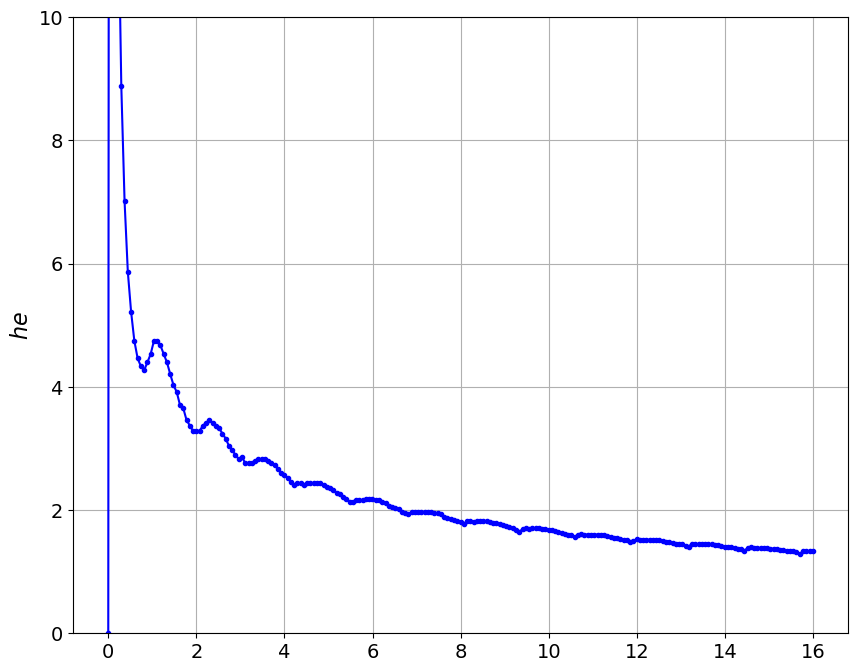

In [454]:
### Calcul de he:


# Calcul de la vitesse theorique  
z0 = -0.05
u_jl  = np.zeros(h_rot.size)
u_jl[0] = 0 
#u_jl[1:] = u_p73 *((L_p73/h_rot[1:])*np.sin(f*t[1:]) - 1/kappa *np.sqrt(f/np.sqrt(NN0)))
u_jl[1:] = u_p73 *((L_p73/h_rot[1:])*(-1) - 1/kappa *np.sqrt(f/np.sqrt(NN0)))

#u_jl[1:] = us*((us/(h_rot[1:]*f)*np.sin(f*t[1:]))-1/kappa)
u_jl[-1]

he  = np.zeros(h_rot.size)
he[0] = 0
he[1:] = u_jl[1:]**2/(NN0  * h_rot[1:])


fig, (ax1) = plt.subplots(1,1,figsize=(10, 8))

# Calcul de t_14
ax1.plot(t/Tf,he[:], '.-', color='b')
ax1.grid()
ax1.set_ylabel(r'$he$ ', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax1.set_ylim([0,10])
plt.show()

In [610]:
he[-1]

1.3296290267423168

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


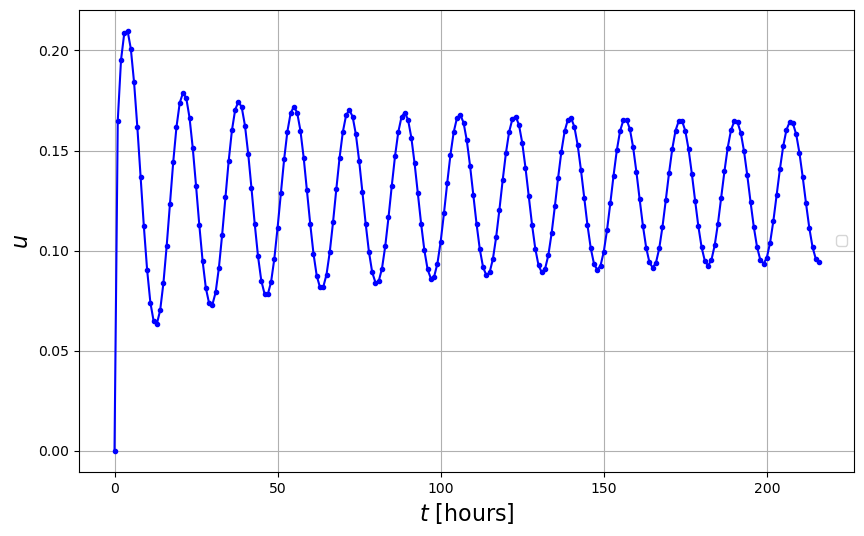

In [456]:
def it_TF (nb,f):
    T_f = np.pi /f
    idt = nb*T_f
    id = np.argmin(np.abs(t-idt))
    return id


u_ek = tx/1024/(np.sqrt(2*f*num_rot[:,-1]))
plt.figure(figsize=(10, 6))
plt.plot(t/hour,u_rot[:,-1], '.-', color='b') 
#plt.plot(t[1:]/hour,u_ek[1:], '.-', color='b') 
plt.grid()
plt.xlabel('$t$ [hours]', fontsize=16)
plt.ylabel(r'$u$', fontsize=16)
plt.legend(loc='center right')

ax.tick_params(axis='both', labelsize=14)
#plt.savefig('evol_tke')
plt.show()

In [457]:
r = (np.pi/4)**(1/4)*0.005**(-1/2) * (0.0002*10)**(1/2)
W = 0.6
Dt = 80
W/(r*Dt**(1/2))

0.11266883166974137

## teste de la loi de h

In [458]:
f_10/N_u20

NameError: name 'f_10' is not defined

In [ ]:
import matplotlib.image as mpimg
image = mpimg.imread('U20.png')


# Afficher l'image
plt.figure(figsize=(10, 6))
x_min, x_max = 0, 5
y_min, y_max = 0, 2.5

# Afficher l'image avec les limites des axes redimensionnées
plt.imshow(image, extent=[x_min, x_max, y_min, y_max])



f_N = np.linspace(1.3*10**(-3),2*10**(-2),20)


t_15 = (t_u20)**(1/5)
kappa = 0.41
Ric = 1
rho0 = 1024
Gamma0 = 0.3
f_u20 = 2.5*10**(-5)
N_u20 = 1*10**(-2)


t_15 = (t_u20)**(1/5)


T_f20 = 2*np.pi/f_u20
T_f = 2*np.pi/f_10
t_15_f = (t_u20/T_f20)**(1/5)
L_p73 = us/np.sqrt(N_u20*f_10)
L_p73_20 = us/np.sqrt(N_u20*f_u20)

h_analytique  =L_p73_20*((40*Ric*np.pi*Gamma0)/(kappa))**(1/5)*(f_u20/N_u20)**(1/10) * t_15_f 


t_uj = (t_u20/T_f20)**(0.18)
h_uj = 1.5 *(us/np.sqrt(f_u20*N_u20))*(f_u20/N_u20)**(-2.2e-2)*t_uj



plt.plot(t_u20/T_f,h_u20/L_p73,label=r' $h$ gotm ')
plt.plot(t_u20/T_f20,h_analytique/L_p73_20,label=r' $h$ analytique ')
plt.plot(t_u20/T_f20,h_uj/L_p73_20,label=r' $h$ Ushijima ')
#plt.plot(t/T_f,  K* f_N[0]**(1/10)*t_15_f, color = 'r', alpha = 0.2, label = r'$K (\frac{f}{N})^{1/10} (\frac{t}{T_f})^{1/5}$ ')

plt.grid()
plt.xlabel('$t/Tf$')
plt.ylabel('$h/L_{p73}$')
plt.xlim([0, 5])
plt.ylim([0, 2.5])

#plt.xscale('log')
plt.legend()
#plt.yscale('log')
plt.grid(which='both')
plt.grid()
plt.show()

In [ ]:
f/np.sqrt(NN0)

In [ ]:

# Afficher l'image
plt.figure(figsize=(10, 8))
x_min, x_max = 0, 5
y_min, y_max = 0, 2.5

# Afficher l'image avec les limites des axes redimensionnées
plt.imshow(image, extent=[x_min, x_max, y_min, y_max])




t_15 = (t)**(1/5)
kappa = 0.41
rho0 = 1024
Gamma0 = 0.3


t_15 = (t)**(1/5)


T_f = np.pi/f
t_15_f = (t/T_f)**(1/5)
L_p72 = us/np.sqrt(np.sqrt(NN0)*f)


h_analytique  =L_p72*((40*np.pi*Gamma0)/(kappa))**(1/5)*(f/np.sqrt(NN0))**(1/10) * t_15_f 


t_uj = (t/T_f)**(0.18)
h_uj = 1.5 *(us/np.sqrt(np.sqrt(NN0)*f))*(f/np.sqrt(NN0))**(-2.2e-2)*t_uj



plt.plot(t/T_f,h_rot/L_p72,label=r' $h$ gotm ')
plt.plot(t/T_f,h_analytique/L_p72,label=r' $h$ analytique ')
plt.plot(t/T_f,h_uj/L_p72,label=r' $h$ Ushijima ')

plt.xlabel('$t/Tf$')
plt.ylabel('$h/L_{p73}$')
plt.grid()
plt.xlim([0, 5])
plt.ylim([0, 2.5])

#plt.xscale('log')
plt.legend()
#plt.yscale('log')
plt.grid(which='both')
plt.grid()
plt.show()


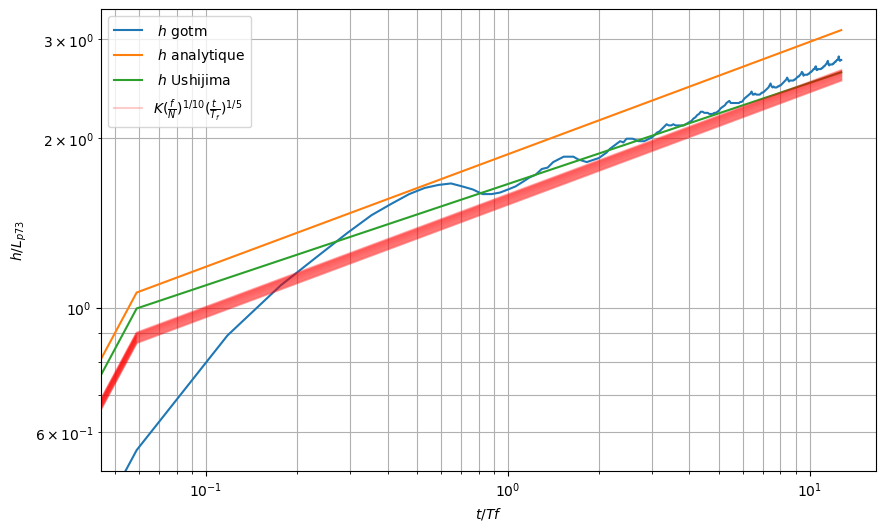

In [459]:


f_N = np.linspace(1.3*10**(-3),2*10**(-3),20)
K = ((10*np.pi*Gamma0)/(kappa**3))**(1/5)

t_15 = (t)**(1/5)
kappa = 0.41
rho0 = 1024
Gamma0 = 0.5

h_analytique  =((5*Gamma0*us**5)/(NN0**(3/2)*f*kappa**3))**(1/5) * t**(1/5)



t_15 = (t)**(1/5)


T_f = 2*np.pi/f
t_15_f = (t/T_f)**(1/5)
L_p72 = us/np.sqrt(np.sqrt(NN0)*f)


h_analytique  =L_p72*((10*np.pi*Gamma0)/(kappa**3))**(1/5)*(f/np.sqrt(NN0))**(1/10) * t_15_f 


t_uj = (t/T_f)**(0.18)
h_uj = 1.5 *(us/np.sqrt(np.sqrt(NN0)*f))*(f/np.sqrt(NN0))**(-2.2e-2)*t_uj


plt.figure(figsize=(10, 6))
plt.plot(t/T_f,h_rot/L_p73,label=r' $h$ gotm ')
plt.plot(t/T_f,h_analytique/L_p72,label=r' $h$ analytique ')
plt.plot(t/T_f,h_uj/L_p72,label=r' $h$ Ushijima ')
plt.plot(t/T_f,  K* f_N[0]**(1/10)*t_15_f, color = 'r', alpha = 0.2, label = r'$K (\frac{f}{N})^{1/10} (\frac{t}{T_f})^{1/5}$ ')
for li in range (len(f_N)):
    plt.plot(t/T_f,  K* f_N[li]**(1/10)*t_15_f, color = 'r', alpha = 0.2)
plt.grid()
plt.xlabel('$t/Tf$')
plt.ylabel('$h/L_{p73}$')


plt.xscale('log')
plt.legend()
plt.yscale('log')
plt.grid(which='both')
plt.grid()
plt.show()

## Calcul de $\int\epsilon dz$ 

In [460]:
epsilon_rot = np.zeros(t.size)
epsilon_norot = np.zeros(t.size)



for i in range (len(t)):
    #epsilon_rot[i] = np.sum((eps_rot[i,:]*dz))
    #epsilon_norot[i] = np.sum((eps_norot[i,:]*dz))
    #epsilon_rot[i] = np.sum((0.5*(eps_rot[i,:-1]+eps_rot[i,1:])*dz))
    #epsilon_norot[i] = np.sum((0.5*(eps_norot[i,:-1]+eps_norot[i,1:])*dz))
    epsilon_norot[i] = np.sum(eps_norot[i,1:-1]*dz)
    epsilon_rot[i] = np.sum(eps_rot[i,1:-1]*dz)
    

## Dissipation moyenne dans la couche de mélange, à l'interface  et en surface

In [461]:
###### Indice del'interface de la couche de mélange et zone stablement stratifié #### 
idh_rot = np.zeros(len(t),dtype=np.int64)
idh_norot = np.zeros(len(t),dtype=np.int64)
for i in range (len(t)):
    idh_rot[i]= np.argmin(np.abs(z[i].data+h_rot[i].data))+6#+4
    idh_norot[i]= np.argmin(np.abs(z[i].data+h_norot[i].data))+6#+4


### Calcul de epsilon moyen dans la MLD#####
epsm_rot= np.zeros((len(t)))
epsm_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    #print(j1,j2)
    epsm_rot[i] = np.mean(eps_rot[i,j1:-1])
    epsm_norot[i] = np.mean(eps_norot[i,j2:-1])
    #epsm_rot[i] = np.mean(eps_rot[i,:])
    #epsm_norot[i] = np.mean(eps_norot[i,:])



### Calcul de epsilon à l'interface (surface )#####
epssurf_rot= np.zeros((len(t)))
epssurf_norot= np.zeros((len(t)))
#epsi_rot = np.mean(eps_rot[:,-20:-1], axis = 1)
#epsi_norot = np.mean(eps_norot[:,-20:-1], axis = 1)
epssurf_rot = eps_rot[:,-2]                              # Pour rester consistant avec les calcules d'énérgie, on elimine le point en surface définit arbitraiment dans gotm
epssurf_norot = eps_norot[:,-2]                          #idem


epsi_rot= np.zeros((len(t)))
epsi_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    epsi_rot[i] = eps_rot[i,j1].data
    epsi_norot[i] = eps_norot[i,j2].data

epsi_interface_rot= np.zeros((len(t),15))
epsi_interface_norot= np.zeros((len(t),15))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    R1 = eps_rot[i,j1-7:j1+8].data
    R2 = eps_norot[i,j2-7:j2+8].data
    
    epsi_interface_rot[i] =R1
    epsi_interface_norot[i] =R2



## Zoom de la dissipation autour de l'interface

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/2236780976.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/2236780976.py:15: RuntimeWarning: divide by zero encountered in log10
  CS1 = ax1.contourf(t/hour, Z_interface,  np.log10(epsi_interface_rot).T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/2236780976.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``m

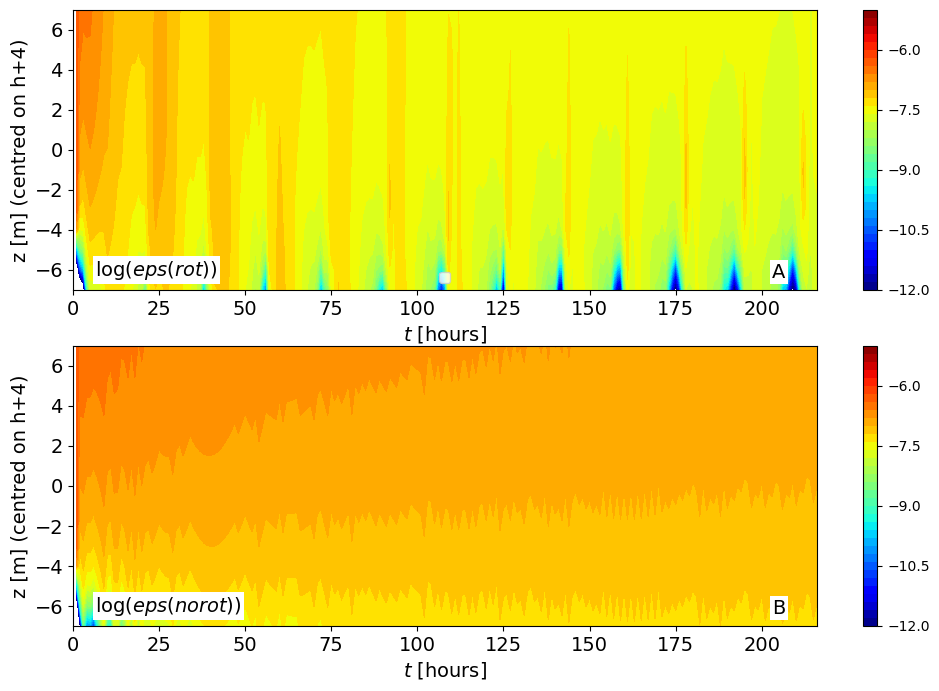

In [462]:

# plot contour plot of entire time series
fig1, (ax1, ax2 )= plt.subplots(2 ,figsize=(12, 8))
plt.subplots_adjust(hspace=0.2)
bprops = {'facecolor': 'white', 'edgecolor': 'none', 'pad': 2}
# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]
Z_interface = np.arange(-7,8,1)


cmap = plt.cm.get_cmap('jet')
#levels = MaxNLocator(nbins=40).tick_values(np.log10(Ri_rot).min(), np.log10(Ri_rot).max())
#levels = MaxNLocator(nbins=40).tick_values(np.log10(1/4), np.log(100))#np.log10(Ri_rot).max())
levels = MaxNLocator(nbins=40).tick_values(-12, -5)
CS1 = ax1.contourf(t/hour, Z_interface,  np.log10(epsi_interface_rot).T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
#ax1.plot(t/hour, -h_poll_rot, '--', color='k',label='Pollard et al. (1973)')
#ax1.plot(t/hour, -h_rot, '--', color='k',label='Pollard et al. (1973)')
#ax1.plot(t/hour,-h_norot.data,color= 'b', linewidth=1, label = 'MLD' )
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, r'$\log(eps (rot))$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m] (centred on h+4)', fontsize=14)
#ax1.set_ylim([-H, 0])
#ax1.set_ylim([-30, -10])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)
colorbar = fig1.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()


cmap = plt.cm.get_cmap('jet')
#levels = MaxNLocator(nbins=40).tick_values(np.log10(Ri_rot_bis).min(), np.log10(Ri_rot_bis).max())
levels = MaxNLocator(nbins=40).tick_values(-12, -5)
CS2 = ax2.contourf(t/hour, Z_interface,  np.log10(epsi_interface_norot).T, levels=levels, cmap=cmap)#cmocean.cm.thermal)

#ax2.plot(t/hour, -h_poll_norot, '--', color='k')

ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'$\log(eps(no rot))$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m] (centred on h+4)', fontsize=14)
#ax2.set_ylim([-H, 0])
#ax2.set_ylim([-30, -10])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('$t$ [hours]', fontsize=14)
colorbar2 = fig1.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()
plt.savefig('epsilon_interface')

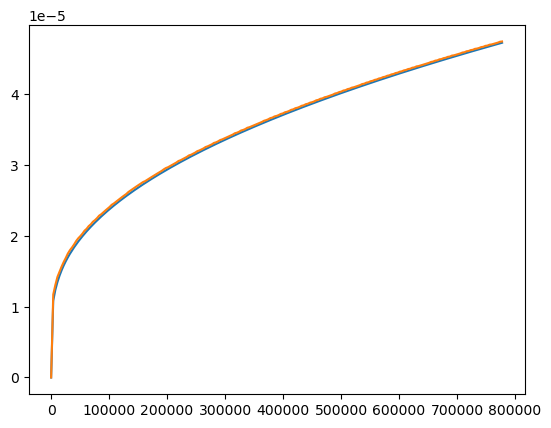

In [463]:
plt.plot(t,epsilon_norot)
plt.plot(t,epsm_norot*h_norot)

## Relation entre $\epsilon_{interface}$ - $\epsilon_{moyen}$ et  $\epsilon_{surface}$
On prendra comme réference $\epsilon_{moyen}$

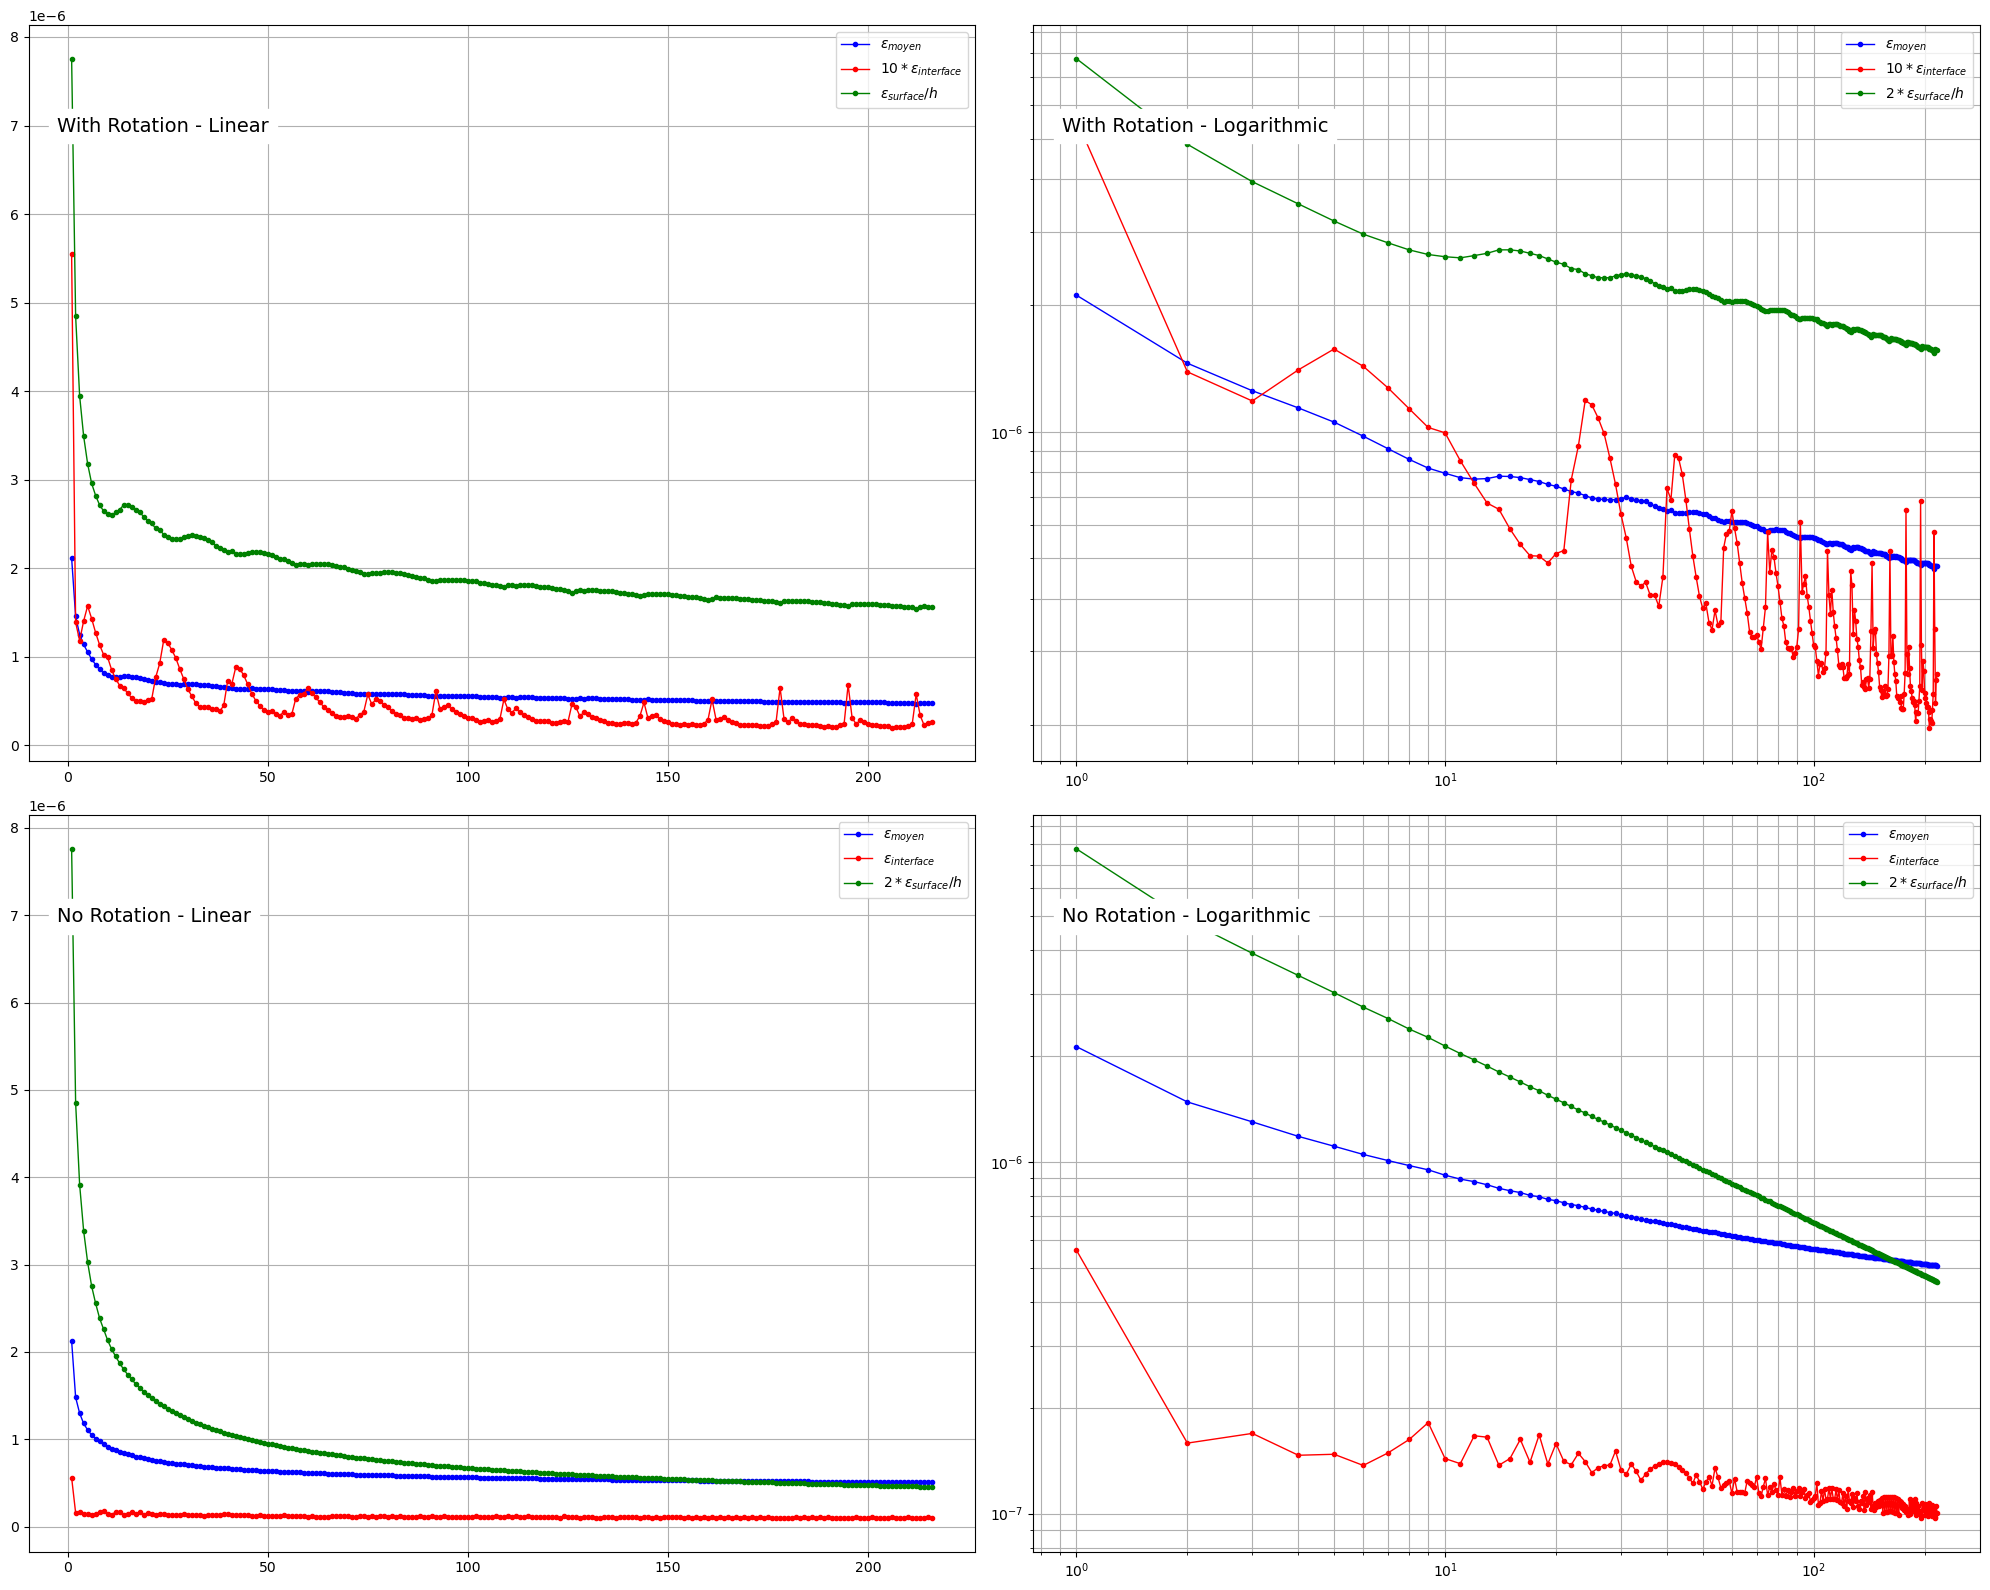

In [464]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Premier sous-graphique (No rotation - Linéaire)
axes[0, 0].plot(t[1:]/3600, epsm_rot[1:], '.-', color='b', linewidth=1, label='$\epsilon_{moyen}$')
#axes[0, 0].plot(t[1:]/3600,1/2* epsi_rot[1:]*h_rot[1:], '.-', color='r', linewidth=1, label='$10*\epsilon_{interface}$')
axes[0, 0].plot(t[1:]/3600, 10 * epsi_rot[1:], '.-', color='r', linewidth=1, label='$10*\epsilon_{interface}$')
axes[0, 0].plot(t[1:]/3600, 2*epssurf_rot[1:]/h_rot[1:], '.-', color='g', linewidth=1, label='$\epsilon_{surface}/h$')
axes[0, 0].text(0.03, 0.85, 'With Rotation - Linear', verticalalignment='bottom', horizontalalignment='left',
                backgroundcolor='w', transform=axes[0, 0].transAxes, fontsize=14)
axes[0, 0].legend()
axes[0, 0].grid()

# Deuxième sous-graphique (No rotation - Logarithmique)
axes[0, 1].plot(t[1:]/3600, epsm_rot[1:], '.-', color='b', linewidth=1, label='$\epsilon_{moyen}$')
#axes[0, 1].plot(t[1:]/3600, 1/2*epsi_rot[1:]*h_rot[1:], '.-', color='r', linewidth=1, label='$10*\epsilon_{interface}$')
axes[0, 1].plot(t[1:]/3600, 10 * epsi_rot[1:], '.-', color='r', linewidth=1, label='$10*\epsilon_{interface}$')

axes[0, 1].plot(t[1:]/3600,2*epssurf_rot[1:]/h_rot[1:], '.-', color='g', linewidth=1,
                label='$2*\epsilon_{surface}/h$')
axes[0, 1].text(0.03, 0.85, 'With Rotation - Logarithmic', verticalalignment='bottom', horizontalalignment='left',
                backgroundcolor='w', transform=axes[0, 1].transAxes, fontsize=14)
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].legend()
axes[0, 1].grid(which='both')

# Troisième sous-graphique (No rotation - Linéaire)
axes[1, 0].plot(t[1:]/3600, epsm_norot[1:], '.-', color='b', linewidth=1, label='$\epsilon_{moyen}$')
axes[1, 0].plot(t[1:]/3600, epsi_norot[1:], '.-', color='r', linewidth=1, label='$\epsilon_{interface}$')
axes[1, 0].plot(t[1:]/3600, 2*epssurf_norot[1:]/h_norot[1:], '.-', color='g', linewidth=1,
                label='$2*\epsilon_{surface}/h$')
axes[1, 0].text(0.03, 0.85, 'No Rotation - Linear', verticalalignment='bottom', horizontalalignment='left',
                backgroundcolor='w', transform=axes[1, 0].transAxes, fontsize=14)
axes[1, 0].legend()
axes[1, 0].grid()

# Quatrième sous-graphique (No rotation - Logarithmique)
axes[1, 1].plot(t[1:]/3600, epsm_norot[1:], '.-', color='b', linewidth=1, label='$\epsilon_{moyen}$')
axes[1, 1].plot(t[1:]/3600, epsi_norot[1:], '.-', color='r', linewidth=1, label='$\epsilon_{interface}$')
axes[1, 1].plot(t[1:]/3600, 2*epssurf_norot[1:]/h_norot[1:], '.-', color='g', linewidth=1,
                label='$2*\epsilon_{surface}/h$')
axes[1, 1].text(0.03, 0.85, 'No Rotation - Logarithmic', verticalalignment='bottom', horizontalalignment='left',
                backgroundcolor='w', transform=axes[1, 1].transAxes, fontsize=14)
axes[1, 1].legend()
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].grid(which='both')

plt.tight_layout()
plt.show()

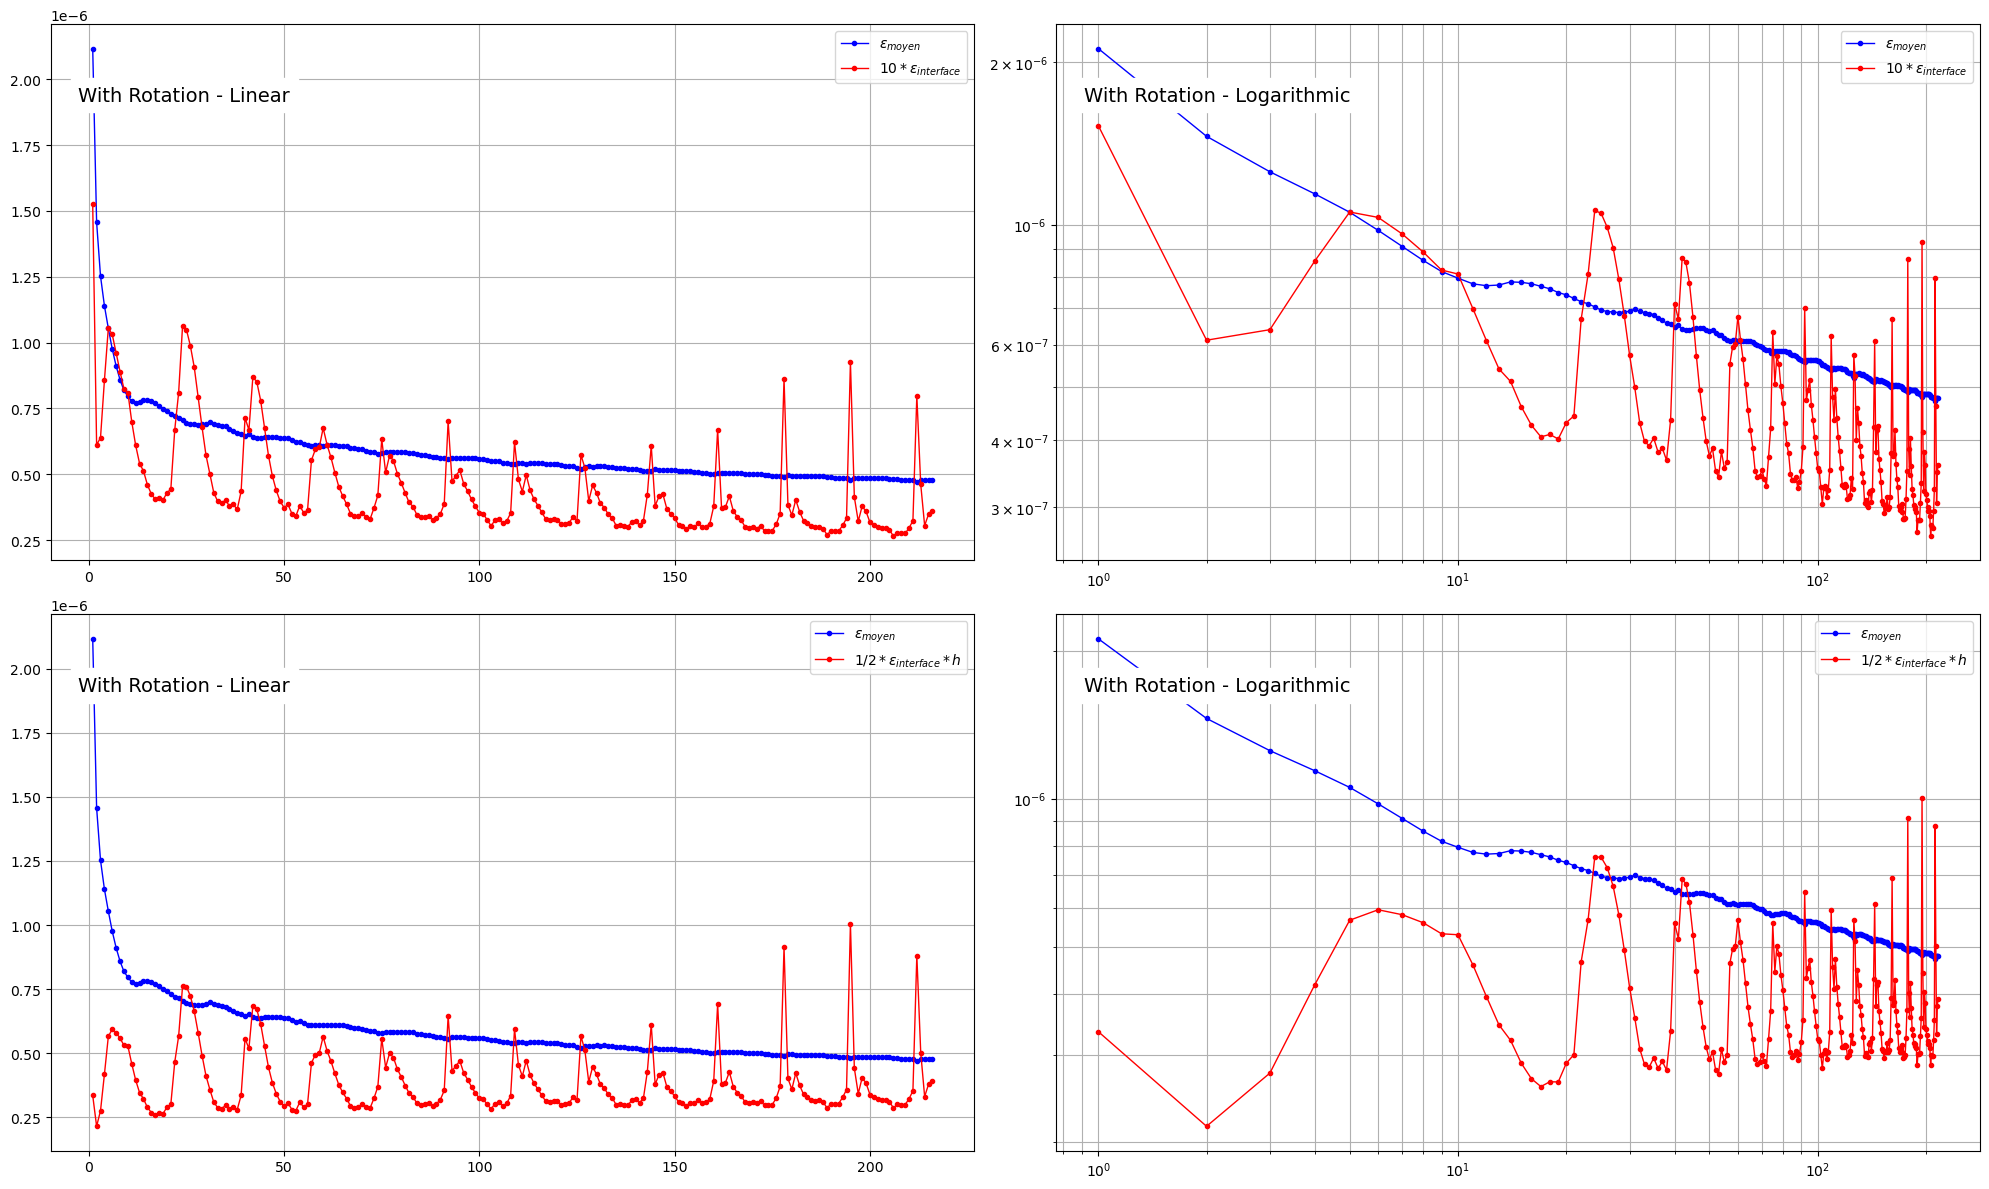

In [465]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Premier sous-graphique (No rotation - Linéaire)
axes[0, 0].plot(t[1:]/3600, epsm_rot[1:], '.-', color='b', linewidth=1, label='$\epsilon_{moyen}$')
axes[0, 0].plot(t[1:]/3600,1/2* epsi_rot[1:]*h_rot[1:], '.-', color='r', linewidth=1, label='$10*\epsilon_{interface}$')
#axes[0, 0].plot(t[1:]/3600, 10 * epsi_rot[1:], '.-', color='r', linewidth=1, label='$10*\epsilon_{interface}$')
#axes[0, 0].plot(t[1:]/3600, 2*epssurf_rot[1:]/h_rot[1:], '.-', color='g', linewidth=1, label='$\epsilon_{surface}/h$')
axes[0, 0].text(0.03, 0.85, 'With Rotation - Linear', verticalalignment='bottom', horizontalalignment='left',
                backgroundcolor='w', transform=axes[0, 0].transAxes, fontsize=14)
axes[0, 0].legend()
axes[0, 0].grid()

# Deuxième sous-graphique (No rotation - Logarithmique)
axes[0, 1].plot(t[1:]/3600, epsm_rot[1:], '.-', color='b', linewidth=1, label='$\epsilon_{moyen}$')
axes[0, 1].plot(t[1:]/3600, 1/2*epsi_rot[1:]*h_rot[1:], '.-', color='r', linewidth=1, label='$10*\epsilon_{interface}$')
#axes[0, 1].plot(t[1:]/3600, 10 * epsi_rot[1:], '.-', color='r', linewidth=1, label='$10*\epsilon_{interface}$')

#axes[0, 1].plot(t[1:]/3600,2*epssurf_rot[1:]/h_rot[1:], '.-', color='g', linewidth=1,
#                label='$2*\epsilon_{surface}/h$')
axes[0, 1].text(0.03, 0.85, 'With Rotation - Logarithmic', verticalalignment='bottom', horizontalalignment='left',
                backgroundcolor='w', transform=axes[0, 1].transAxes, fontsize=14)
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].legend()
axes[0, 1].grid(which='both')

# Troisième sous-graphique (No rotation - Linéaire)
axes[1, 0].plot(t[1:]/3600, epsm_rot[1:], '.-', color='b', linewidth=1, label='$\epsilon_{moyen}$')
axes[1, 0].plot(t[1:]/3600,0.02* epsi_rot[1:]*h_rot[1:]**2, '.-', color='r', linewidth=1, label='$1/2*\epsilon_{interface}*h$')
#axes[1, 0].plot(t[1:]/3600, 10 * epsi_rot[1:], '.-', color='r', linewidth=1, label='$10*\epsilon_{interface}$')
#axes[1, 0].plot(t[1:]/3600, 2*epssurf_rot[1:]/h_rot[1:], '.-', color='g', linewidth=1, label='$\epsilon_{surface}/h$')
axes[1, 0].text(0.03, 0.85, 'With Rotation - Linear', verticalalignment='bottom', horizontalalignment='left',
                backgroundcolor='w', transform=axes[1, 0].transAxes, fontsize=14)
axes[1, 0].legend()
axes[1, 0].grid()

# Deuxième sous-graphique (No rotation - Logarithmique)
axes[1, 1].plot(t[1:]/3600, epsm_rot[1:], '.-', color='b', linewidth=1, label='$\epsilon_{moyen}$')
axes[1, 1].plot(t[1:]/3600, 0.02*epsi_rot[1:]*h_rot[1:]**2, '.-', color='r', linewidth=1, label='$1/2*\epsilon_{interface}*h$')
#axes[1, 1].plot(t[1:]/3600, 10 * epsi_rot[1:], '.-', color='r', linewidth=1, label='$10*\epsilon_{interface}$')

#axes[1, 1].plot(t[1:]/3600,2*epssurf_rot[1:]/h_rot[1:], '.-', color='g', linewidth=1,
#                label='$2*\epsilon_{surface}/h$')
axes[1, 1].text(0.03, 0.85, 'With Rotation - Logarithmic', verticalalignment='bottom', horizontalalignment='left',
                backgroundcolor='w', transform=axes[1, 1].transAxes, fontsize=14)
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].legend()
axes[1, 1].grid(which='both')

plt.tight_layout()
plt.savefig('relation_eps_interface_moy')
plt.show()

## Relation entre $\epsilon$ - $\frac{dEp}{dt}$
On prendra comme réference $\epsilon_{moyen}$


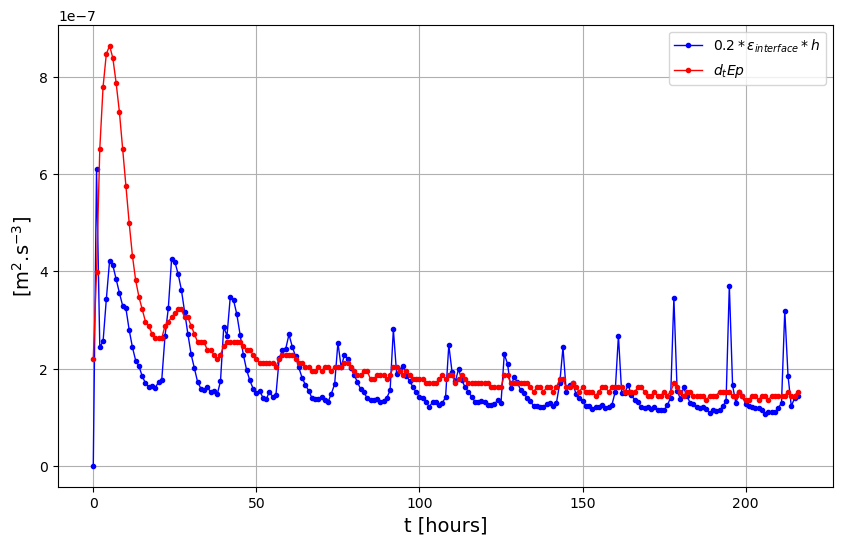

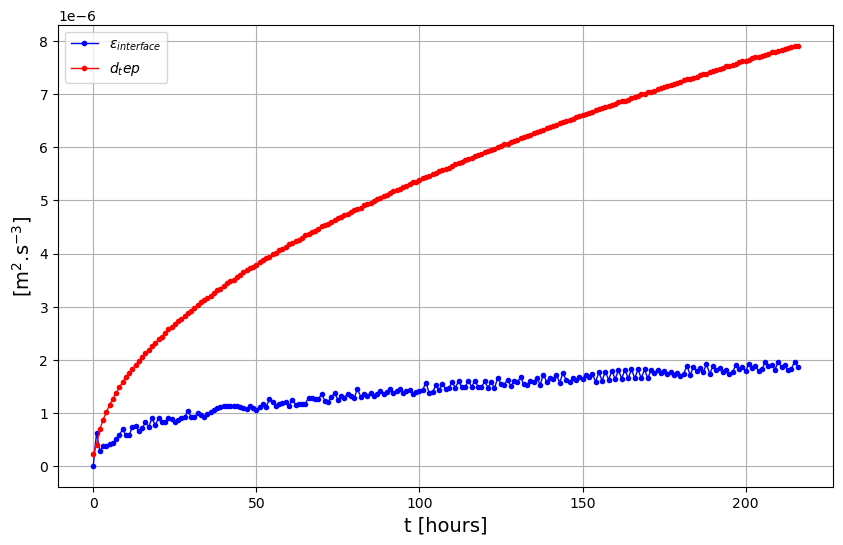

In [466]:
plt.figure(figsize=(10, 6))
plt.plot(t/hours, 0.2*epsi_rot*h_rot,'.-', color='b', linewidth=1,label='$0.2 * \epsilon_{interface} * h $')
#plt.plot(t/hours, epsilon_rot,'.-', color='r', linewidth=1,label='$\epsilon_{moyen}$')
plt.plot(t/hours, dEp_rot/rho0,'.-', color='r', linewidth=1,label='$d_t Ep$')
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend()
plt.grid()
plt.savefig('mixing_efficiency_rot')




plt.figure(figsize=(10, 6))
plt.plot(t/hours,  0.2*epsi_norot*h_norot,'.-', color='b', linewidth=1,label='$\epsilon_{interface}$')
#plt.plot(t/hours, epsilon_rot,'.-', color='r', linewidth=1,label='$\epsilon_{moyen}$')
plt.plot(t/hours, dEp_norot/rho0,'.-', color='r', linewidth=1,label='$d_t ep$')
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend()
plt.grid()


In [467]:
0.02/0.3*(np.pi/4)**(-1/4)*0.01**(-1/2)

0.708167954684798

In [468]:
0.02*(np.pi/4)**(-1/4)*0.01**(-1/2)*0.03


0.006373511592163182

# Comparaison de $\int_z \rho \epsilon dz$ et $\langle U.\tau \rangle = \langle U.\rho u_*^2 \rangle$

In [469]:
##### definition de (u.tau) et epsilon

dz = z[0,1].data-z[0,0].data


    

U_rot = np.zeros(t.size)
U_norot = np.zeros(t.size)
V_rot = np.zeros(t.size)
V_norot = np.zeros(t.size)


U_norot[:] =u_norot[:,-1]
U_rot[:] =u_rot[:,-1]

V_norot[:] =v_norot[:,-1]
V_rot[:] =v_rot[:,-1]



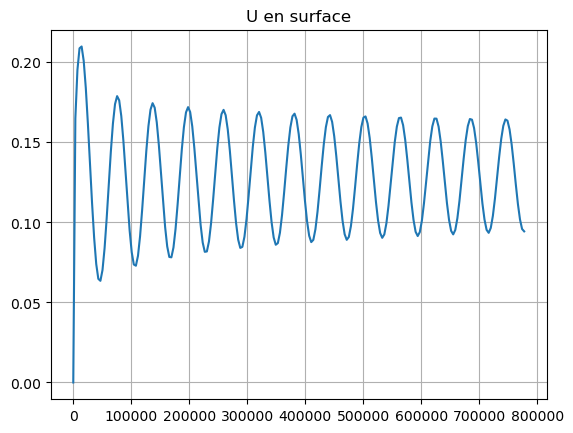

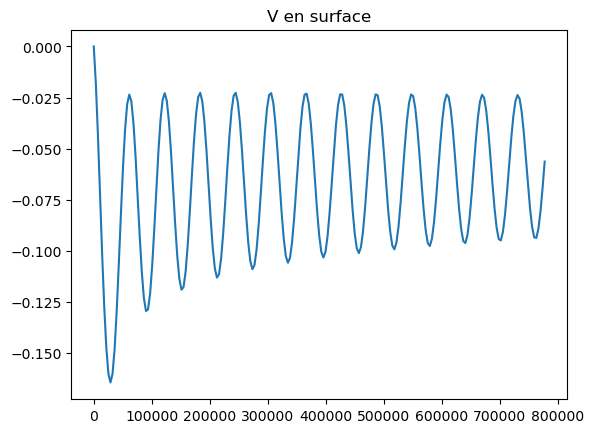

In [470]:
plt.title('U en surface')
plt.plot(t,U_rot)
plt.grid()
plt.show()

plt.title('V en surface')
plt.plot(t,V_rot)

# fermeture QDM/ENERGIE


## Bilan QDM $\partial_t \overline{u} = \partial_z ( \nu_t \partial_z \overline{u})$

Calcul de $\nu_t$
$$\nu_t = c_{\mu} \frac{k^2}{\epsilon}$$


In [471]:
np.nanmean((num_norot*eps_norot/(tke_norot**2)-cmue1_norot)),np.nanmax((num_norot*eps_norot/(tke_norot**2)/cmue1_norot))
#np.nanmin((num_rot*eps_rot/(tke_rot**2)/cmue1_norot)),np.nanmax((num_rot*eps_rot/(tke_rot**2)/cmue1_norot))

(-0.18296164, inf)

In [472]:
#c_mu = 0.1
c_mu=0.09
#k_rot = tke_rot*2 ; k_norot = tke_norot*2
k_rot = tke_rot ; k_norot = tke_norot

nu1_rot = cmue1_rot * (k_rot**2)/eps_rot
nu1_norot = cmue1_norot * (k_norot**2)/eps_norot
nu_rot = num_rot
nu_norot = num_norot




#### reshape nu sur la grille z ####  voir markdown plus bas      
#nu_rot = (nu_rot[:,:-1]+nu_rot[:,1:])/2
#nu_norot = (nu_norot[:,:-1]+nu_norot[:,1:])/2
nu_rot = nu_rot[:,1:-1]
nu_norot = nu_norot[:,1:-1]



print('La moyenne de eddy viscuosity est de {}'.format(np.mean(nu_rot).data))

La moyenne de eddy viscuosity est de 0.002254604361951351


La façon dont on definit $\nu$ est tres important: 
- $\epsilon$ et $k$ sont definient sur les bords de grilles, et la vitesses sur le centre des grilles. Ainsi si je prend le gradient (pour obtenir le cisaillement verticale de vitesse) mon premier point correspond en réalité au bas de la premiere maille, cad la deuxieme coordonnée de la grille zi. C'est pourquoi quand je rescale, je doit enlever la coordonée de surface (dernière) de nu 

|name |formule|nom|
| --- | --- | --- |
| Vitesse | $\overline{u}$|u_rot/u_norot |
| dérivé temporel vitesse | $\partial_t\overline{u}$|dt_u_rot |
| dérivé vitesse en z | $\partial_t\overline{u}$|dz_u_rot |
| dérivé temporel vitesse integré sur la colonne d'eau | $\int\partial_t\overline{u}dz$|Dt_u_rot |
| energie cinetique  | $\frac{u^2+v^2}{2}$|Ekin |
|dérivé temporel energie cinetique  | $\int\partial_t\frac{u^2+v^2}{2}dz$|Dt_Ke_rot |
|dérivé en z energie cinetique  | $\int\partial_z\frac{u^2+v^2}{2}dz$|Dz_Ke_rot |

<span style="color:red">Attention:</span> Ke est par construction multiplié par $\rho_0$
 $$e1 = \partial_z ( \nu_t \partial_z \overline{u})$$
 $$E1 = \int\partial_z ( \nu_t \partial_z \overline{u})dz$$
 $$e2 = \partial_z ( \nu_t \partial_z \overline{k})$$
 $$E2 = \int\partial_z ( \nu_t \partial_z \overline{k})dz$$
 $$e3 = \nu_t((\partial_zu^2)+(dz_v^2))$$
 $$E3 = \int\nu_t((\partial_zu^2)+(dz_v^2))dz$$



In [473]:
def boundarie_space(a): 
    bound = a[:,-1] 
    a=np.pad(a,((0,0),(1,1)))
    a[:,-1]= bound
    return a
    
def boundarie_time(a):
    """
    Modifie la taille d'un array (rendre sa taille apres un np.diff) en assumant 
    que la derniere rangé est identiques  àla précedente
    Ajoute une rangée à la fin du tableau 'a' en copiant la dernière rangée,
    et renvoie le tableau résultant.
    
    Parameters:
    a (numpy.ndarray): Tableau 2D à modifier.

    Returns:
    numpy.ndarray: Tableau 2D avec une rangée ajoutée à la fin.
    """

    # Récupération de la dernière rangée du tableau 'a'
    bound = a[-1, :]

    # Ajout d'une rangée supplémentaire à la fin du tableau 'a' en copiant la dernière rangée
    a = np.pad(a, ((0, 1), (0, 0)))
    a[-1, :] = bound

    return a 

### Tableau des conditions aux bords



In [474]:
nu_rot = num_rot
#nu_rot[:,-1] =np.ones(nu_rot[0,-1].shape)*nu_rot[0,-1]
nu_rot[:,-1] = num_rot[:,-2]
nu_norot = num_norot
#nu_norot[:,-1] =np.ones(nu_norot[0,-1].shape)*nu_norot[0,-1]
nu_norot[:,-1] = num_norot[:,-2]

##### Parametre de l'integration #####
H=-z[0,0]
dz  = np.abs(z[0,0].data-z[0,1].data)
dt = hours

#### Derivé temporel ######
dt_u_rot    = np.gradient(u_rot, axis = 0)/dt
dt_u_norot  = np.gradient(u_norot, axis = 0)/dt
dt_v_rot    = np.gradient(v_rot, axis = 0)/dt
# dt_Ke_rot ; dt_Ke_norot  sont definit plus haut avec l'energie potentiel, on à casi egalité entre celle que je calcul et la sortie de gotm
#Dt_Ke_rot   = dKe_rot/rho0
#Dt_Ke_norot = dKe_norot/rho0
dt_ke_rot   =  np.gradient(ke_rot/rho0, axis = 0)/dt    #ke_ etait en kg.m-1s-2, il faut donc normaliser par rho 
dt_ke_norot =  np.gradient(ke_norot/rho0, axis = 0)/dt
dt_tke_rot  =  np.gradient(k_rot, axis = 0)/dt 
dt_tke_norot=  np.gradient(k_norot, axis = 0)/dt 

#### Derivé selon z ######
dz_u_rot        =  np.diff(u_rot, axis = 1)/dz
dz_u_rot        =  np.pad(dz_u_rot,((0,0),(1,1)))
dz_u_rot[:,-1]  = (tx/1027)/nu_rot[:,-1].data

dz_v_rot        =  np.diff(v_rot, axis = 1)/dz
dz_v_rot        =  np.pad(dz_v_rot,((0,0),(1,1)))

dz_u_norot      =  np.diff(u_norot, axis = 1)/dz
dz_u_norot      =  np.pad(dz_u_norot,((0,0),(1,1)))
dz_u_norot[:,-1]= (tx/1027)/nu_norot[:,-1].data

nudz_u_rot = nu_rot*dz_u_rot
#nudz_u_rot[:,-2:-1] = (tx/1027)*dz

nudz_u_norot = nu_norot*dz_u_norot
#nudz_u_norot[:,-2:-1] = (tx/1027)*dz


#e1_rot          = np.diff(nu_rot*dz_u_rot, axis=1)/dz
e1_rot          = np.diff(nudz_u_rot, axis=1)/dz
#e1_rot[:,-1]  = (tx/1027)
e1_norot        = np.diff(nudz_u_norot, axis=1)/dz


dz_ke_rot       = np.diff(ke_rot/rho0, axis = 1)/dz     #ke_ etait en kg.m-1s-2, il faut donc normalisé par rho 
dz_ke_rot      =  np.pad(dz_ke_rot,((0,0),(1,1)))
dz_ke_rot[:,-1]= (U_rot*(tx/1027))/nu_rot[:,-1].data

dz_ke_norot     = np.diff(ke_norot/rho0, axis = 1)/dz
dz_ke_norot      =  np.pad(dz_ke_norot,((0,0),(1,1)))
dz_ke_norot[:,-1]= (U_norot*u_taus_norot**2)/nu_norot[:,-1].data

nudz_ke_rot = nu_rot*dz_ke_rot
nudz_ke_norot = nu_norot*dz_ke_norot

e2_rot          = np.diff(nudz_ke_rot, axis=1)/dz
e2_norot        = np.diff(nudz_ke_norot, axis=1)/dz
#e2_norot[:,-1]  = (U_norot*(tx/1027))
#### Integrale sur la colonne d'eau : #### 
# Vitesse 
u_rot_int    = np.zeros(t.size)
v_rot_int    = np.zeros(t.size)
Dt_u_rot     = np.zeros(t.size)
Dt_v_rot     = np.zeros(t.size)
Dt_u_norot   = np.zeros(t.size)
Dz_u_rot     = np.zeros(t.size)
Dz_u_norot   = np.zeros(t.size)
Dz_v_rot     = np.zeros(t.size)

# Energie
Dz_Ke_rot    = np.zeros(t.size)
Dz_Ke_norot  = np.zeros(t.size)
Dt_Ke_rot    = np.zeros(t.size)
Dt_Ke_norot  = np.zeros(t.size)
Dt_Tke_rot    = np.zeros(t.size)
Dt_Tke_norot  = np.zeros(t.size)

#Autres 
Nu_rot       = np.zeros(t.size)
Nu_norot     = np.zeros(t.size)
E1_rot       = np.zeros(t.size)
E1_norot     = np.zeros(t.size)
E2_rot       = np.zeros(t.size)
E2_norot     = np.zeros(t.size)


for i in range (len(t)):

    u_rot_int[i]    = np.sum((u_rot[i,:])*dz)
    v_rot_int[i]    = np.sum((v_rot[i,:])*dz)
    Dt_u_rot[i]     = np.sum((dt_u_rot[i,:])*dz)
    Dt_u_norot[i]   = np.sum((dt_u_norot[i,:])*dz)
    Dt_v_rot[i]     = np.sum((dt_v_rot[i,:])*dz)
    
    Dz_u_rot[i]     = np.sum((dz_u_rot[i,:])*dz)
    Dz_u_norot[i]   = np.sum((dz_u_norot[i,:])*dz)
    Dz_v_rot[i]     = np.sum((dz_v_rot[i,:])*dz)
    
    Dt_Ke_rot[i]    = np.sum((dt_ke_rot[i,:])*dz)
    Dt_Ke_norot[i]  = np.sum((dt_ke_norot[i,:])*dz)

    Dt_Tke_rot[i]    = np.sum((dt_tke_rot[i,:])*dz)
    Dt_Tke_norot[i]  = np.sum((dt_tke_norot[i,:])*dz)
    
    
    Dz_Ke_rot[i]    = np.sum((dz_ke_rot[i,:])*dz)
    Dz_Ke_norot[i]  = np.sum((dz_ke_norot[i,:])*dz)

    E1_rot[i]       = np.sum((e1_rot[i,:])*dz)
    E1_norot[i]     = np.sum((e1_norot[i,:])*dz)
    E2_rot[i]       = np.sum((e2_rot[i,:])*dz)
    E2_norot[i]     = np.sum((e2_norot[i,:])*dz)
    
    Nu_rot[i]       = np.sum((nu_rot[i,:])*dz)
    Nu_norot[i]     = np.sum((nu_norot[i,:])*dz)

####### Moyenne sur les periodes inertielles 
Dt_u_rot_mean = np.ones(Dt_u_rot.size)*np.mean(Dt_u_rot[iTf:])
Dt_v_rot_mean = np.ones(Dt_v_rot.size)*np.mean(Dt_v_rot[iTf:])
U_rot_mean = np.ones(U_rot.size)*np.mean(U_rot[iTf:])
V_rot_mean = np.ones(V_rot.size)*np.mean(V_rot[iTf:])



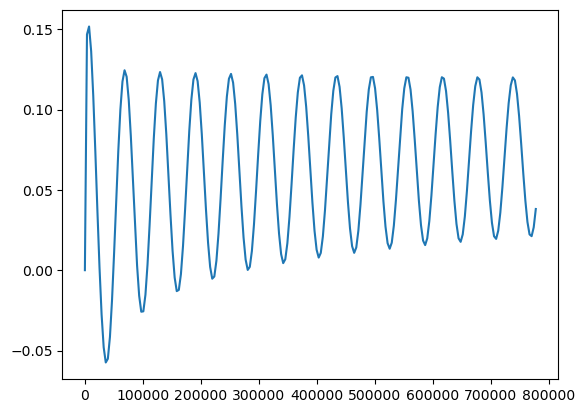

In [475]:
plt.plot(t,U_rot+V_rot)

### Cas sans rotation 

Comme on integre l'equation $\partial_t \overline{u} = \partial_z ( \nu_t \partial_z \overline{u})$ entre la surface et le fond, on est sensé retrouver $\int_{-H}^0 \partial_t \overline{u} dz = \tau$

In [476]:
print('Dt_u_norot=[' , np.min(Dt_u_norot),np.max(Dt_u_norot),']')
print('tau =', tx/1027)



Dt_u_norot=[ 0.00010001548798754811 0.00010001558985095471 ]
tau = 0.0001


Maintenant il faut verifier que le terme de droite $\partial_z ( \nu_t \partial_z \overline{u})$ integré entre la surface et le fond nous donne $\tau$

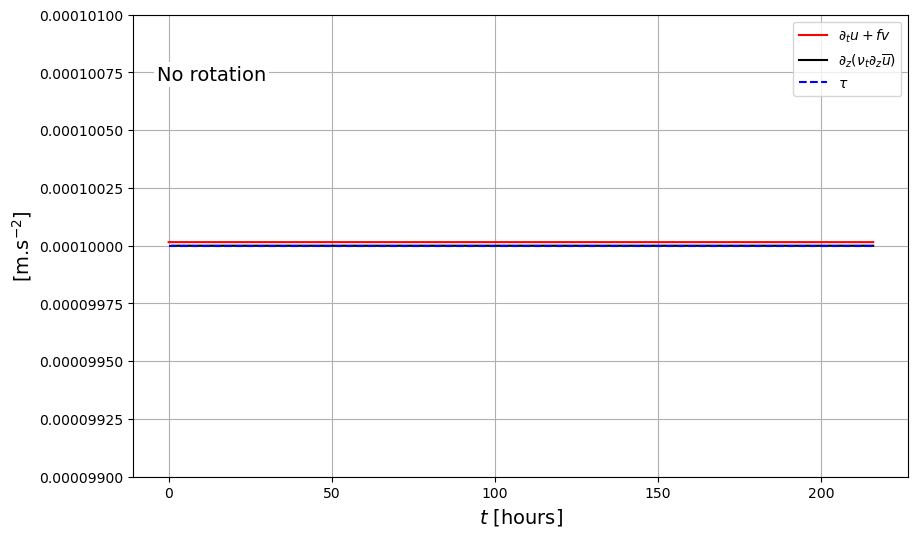

In [477]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(t/hours,Dt_u_norot,'-', color='r', label='$\partial_t u + fv$')
plt.plot(t[1:]/hours,E1_norot[1:],'-', color='k', label=r'$\partial_z ( \nu_t \partial_z \overline{u})$')
plt.plot(t/hours,np.ones(t.size)*tx/1027,'--', color='b',label=r'$\tau$')
plt.ylim(0.000099,0.000101)
plt.legend()
plt.text(0.03, 0.85, 'No rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.ylabel('[m.s$^{-2}$]', fontsize=14)
plt.xlabel('$t$ [hours]', fontsize=14)
plt.grid()

### Cas avec rotation 

Dans ce cas, il faut prendre en compte l'effet de la rotation dans les equations 
$$ \partial_t \overline{u} -f\overline{v} = \partial_z ( \nu_t \partial_z \overline{u})$$
$$ \partial_t \overline{v} +f\overline{u} = \partial_z ( \nu_t \partial_z \overline{v})$$

et donc dans ce cas on est censer retrouver, si on integre entre le fond et la surface : 
$$\partial_t U +fV = \tau$$
$$\partial_t V -fU = 0$$

Avec $U$ et $V$ les vitesse $u$ et $v$ integré sur la colonne

Si on moyenne sur le temps, comme $u$ et $v$ sont periodique (sur une periode d'inertie) c'est normal d'obtenir 
$$\int_0^{nT_f} \int_{-H}^0 \partial_t u dtdz = 0$$
Pareil pour $v$
Donc on est sencé retrouver  
$$-fV = \tau$$
$$fU = 0$$

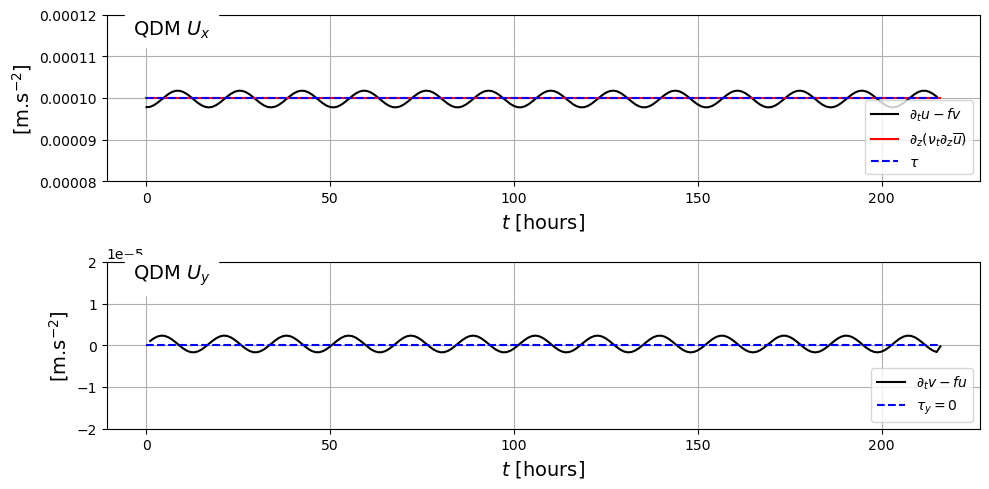

In [478]:
# Création d'une seule figure avec deux sous-graphiques empilés
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

# Premier tracé
ax1.plot(t[:-1]/hours, Dt_u_rot[:-1] - f * v_rot_int[:-1], '-', color='k', label=r'$\partial_t u-fv$')
ax1.plot(t[:]/hours, E1_rot[:], '-', color='r', label=r'$\partial_z ( \nu_t \partial_z \overline{u})$')
ax1.plot(t/hours ,np.ones(t.size) * tx / 1027, '--', color='b', label=r'$\tau$')
ax1.set_ylim(0.00008, 0.00012)
ax1.legend(loc='lower right')
ax1.text(0.03, 0.85, 'QDM $U_x$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('[m.s$^{-2}$]', fontsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)
ax1.grid()

# Deuxième tracé
ax2.plot(t[1:]/hours, Dt_v_rot[1:] + f * u_rot_int[1:], '-', color='k', label=r'$\partial_t v-fu$')
ax2.plot(t/hours, np.zeros(t.size), '--', color='b', label=r'$\tau_y=0$')
ax2.set_ylim(-0.00002, 0.00002)
ax2.legend(loc='lower right')
ax2.text(0.03, 0.85, 'QDM $U_y$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14)
ax2.set_ylabel('[m.s$^{-2}$]', fontsize=14)
ax2.set_xlabel('$t$ [hours]', fontsize=14)
ax2.grid()

# Ajustement de l'espacement entre les deux tracés
plt.tight_layout()

# Affichage de la figure
plt.savefig('bilan_qdm')
plt.show()


#### Test de $\nu_t (\partial_z \overline{u})^2 = P$ avec $P$ le shear product en sortie de Gotm ### 

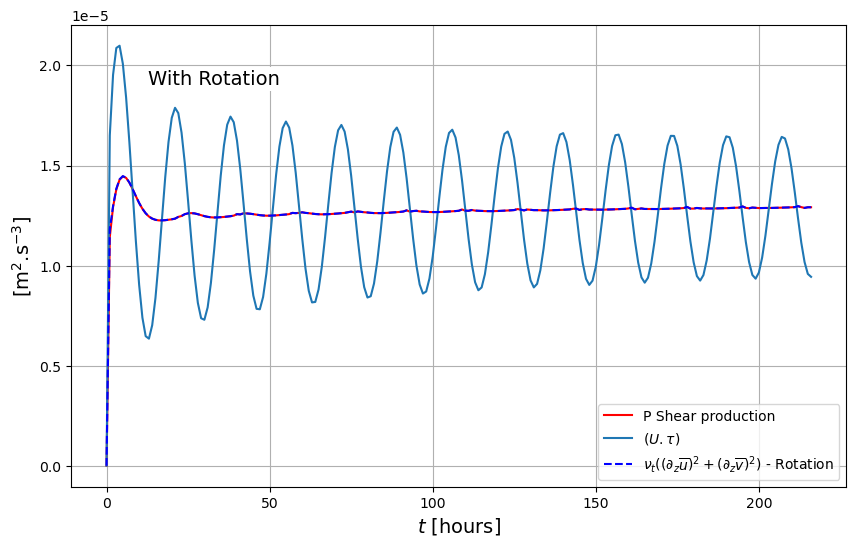

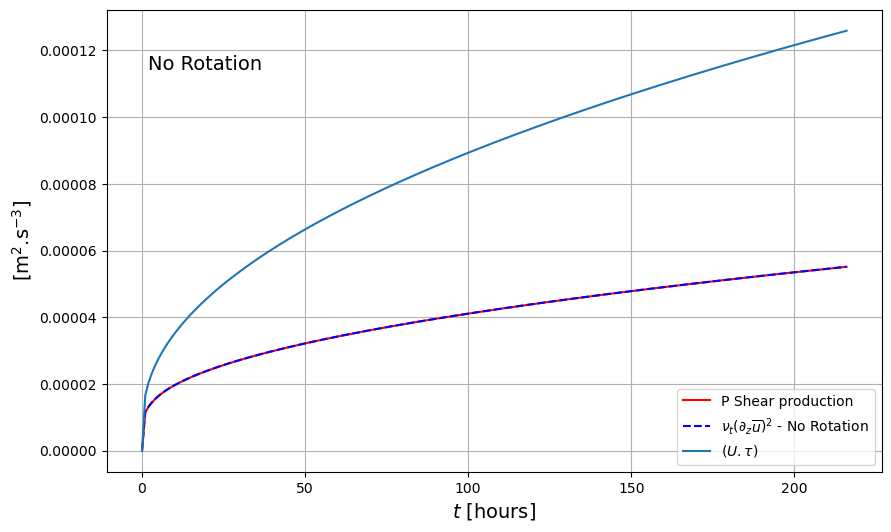

In [479]:
dz_u_rot[:,-1]  = (tx/1027)
dz_u_norot[:,-1]  = (tx/1027)
e3_rot = (nu_rot*((dz_u_rot**2)+(dz_v_rot**2)))

#e3_rot = (tx/1027*(dz_u_rot))+nu_rot*dz_v_rot**2
e3_norot = (nu_norot*dz_u_norot**2)
#e3_norot = (tx/1027*dz_u_norot)

#### Integrale sur la colonne d'eau : #### 
E3_rot   = np.zeros(t.size)
E3_norot = np.zeros(t.size)
P_rot_int = np.zeros(t.size)
P_norot_int = np.zeros(t.size)

for i in range (len(t)):
    
    E3_rot[i] = np.sum((e3_rot[i,:])*dz)
    E3_norot[i] = np.sum((e3_norot[i,:])*dz)
    
    P_rot_int[i] = np.sum((0.5*(P_rot[i,1:]+P_rot[i,:-1]))*dz)
    P_norot_int[i] = np.sum((0.5*(P_norot[i,1:]+P_norot[i,:-1]))*dz)
    #epsilon_norot[i] = np.sum((eps_norot[i, :surf])*dz*np.mean(rho_rot))



##### Plot #####
plt.figure(figsize=(10, 6))
plt.plot(t/hours,P_rot_int,'-', color='r', label='P Shear production')
plt.plot(t/hours,(U_rot*(tx/1027)),'-',label=r'($U.\tau)$')
plt.plot(t/hours,E3_rot,'--', color='b',label=r'$\nu_t ((\partial_z \overline{u})^2+(\partial_z \overline{v})^2)$ - Rotation')
plt.legend(loc='lower right')
plt.text(0.03, 0.85, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('$t$ [hours]', fontsize=14)
plt.grid()

plt.figure(figsize=(10, 6))
plt.plot(t/hours,P_norot_int,'-', color='r', label='P Shear production')
plt.plot(t/hours,E3_norot,'--', color='b',label=r'$\nu_t (\partial_z \overline{u})^2$ - No Rotation')
plt.plot(t/hours,(U_norot*(tx/1027)),'-',label=r'($U.\tau)$')
plt.text(0.03, 0.85, 'No Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('$t$ [hours]', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

La production de shear est multiplié par 2

## Bilan d'energie $\partial_t e_{kin} -  \partial_z ( \nu_t \partial_z e_{kin})= - \nu_t [(\partial_z \overline{u})^2+(\partial_z \overline{v})^2]$

### Cas sans rotation

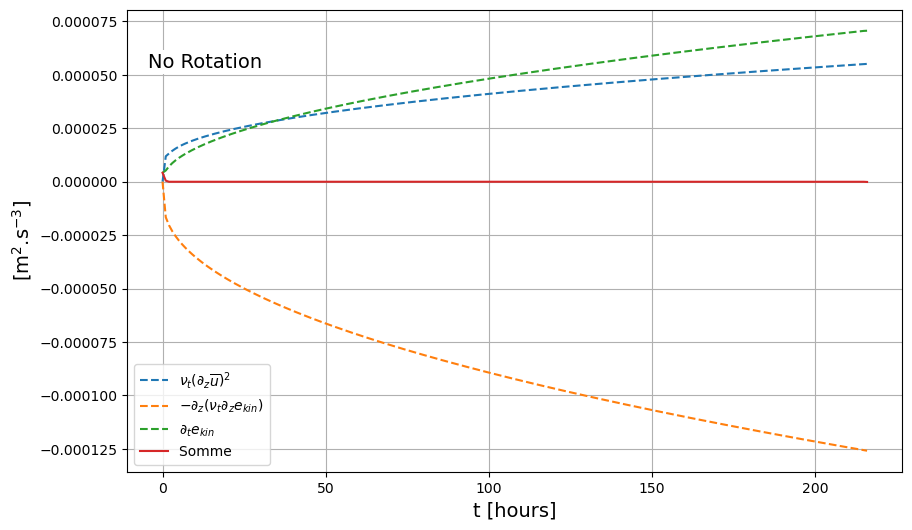

In [480]:
plt.figure(figsize=(10, 6))
plt.plot(t/hours,E3_norot,'--',label=r'$\nu_t (\partial_z \overline{u})^2$')
plt.plot(t/hours,-E2_norot,'--',label=r'$-\partial_z ( \nu_t \partial_z e_{kin})$ ')
plt.plot(t/hours,Dt_Ke_norot,'--',label=r'$\partial_t e_{kin}$ ')
plt.plot(t/hours,Dt_Ke_norot -E2_norot+E3_norot,'-',label=r'Somme ')
plt.text(0.03, 0.85, 'No Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend(loc='lower left')
plt.grid()

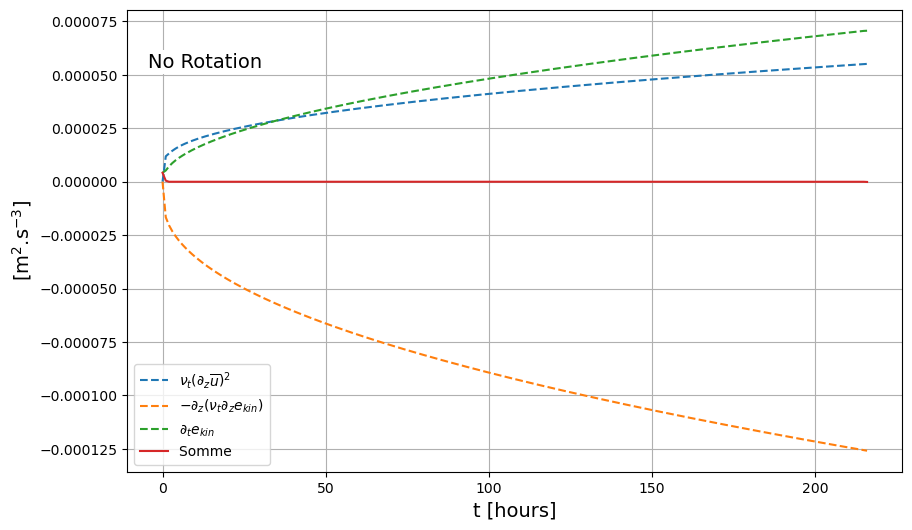

In [481]:
plt.figure(figsize=(10, 6))
plt.plot(t/hours,E3_norot,'--',label=r'$\nu_t (\partial_z \overline{u})^2$')
plt.plot(t/hours,-E2_norot,'--',label=r'$-\partial_z ( \nu_t \partial_z e_{kin})$ ')
plt.plot(t/hours,Dt_Ke_norot,'--',label=r'$\partial_t e_{kin}$ ')
plt.plot(t/hours,Dt_Ke_norot -E2_norot+E3_norot,'-',label=r'Somme ')
plt.text(0.03, 0.85, 'No Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend(loc='lower left')
plt.grid()

### Cas avec rotation

In [482]:
Dt_Ke_rot_meaned =np.ones(Dt_Ke_rot.size)*np.mean((Dt_Ke_rot)[iTf:])


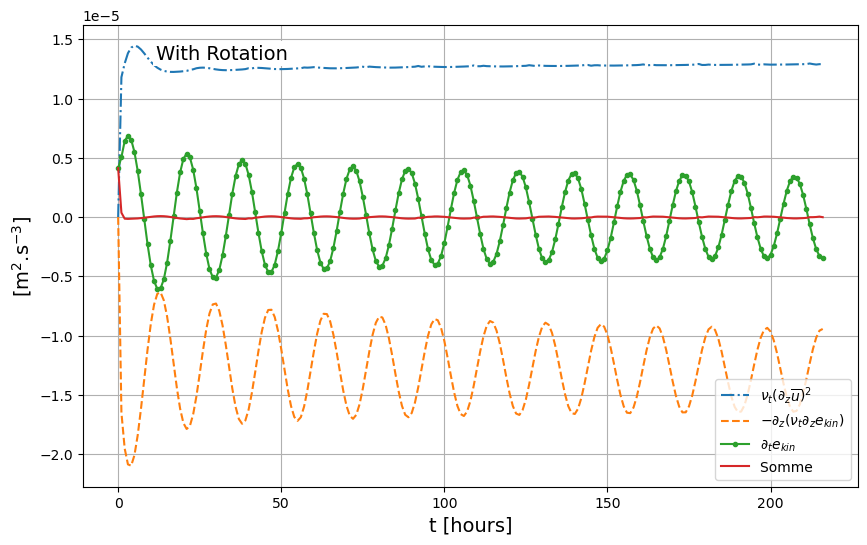

In [483]:
plt.figure(figsize=(10, 6))
plt.plot(t/hours,E3_rot,'-.',label=r'$\nu_t (\partial_z \overline{u})^2$ ')
plt.plot(t/hours,-E2_rot,'--',label=r'$-\partial_z ( \nu_t \partial_z e_{kin})$ ')
plt.plot(t/hours,Dt_Ke_rot,'.-',label=r'$\partial_t e_{kin}$ ')
#plt.plot(t/hours,np.ones(Dt_Ke_rot.size)*np.mean((Dt_Ke_rot -E2_rot+E3_rot)[iTf:]),'.-',label=r'Somme meaned on inertials periodes')
plt.plot(t/hours,Dt_Ke_rot -E2_rot+E3_rot,'-',label=r'Somme ')
plt.text(0.04, 0.9, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

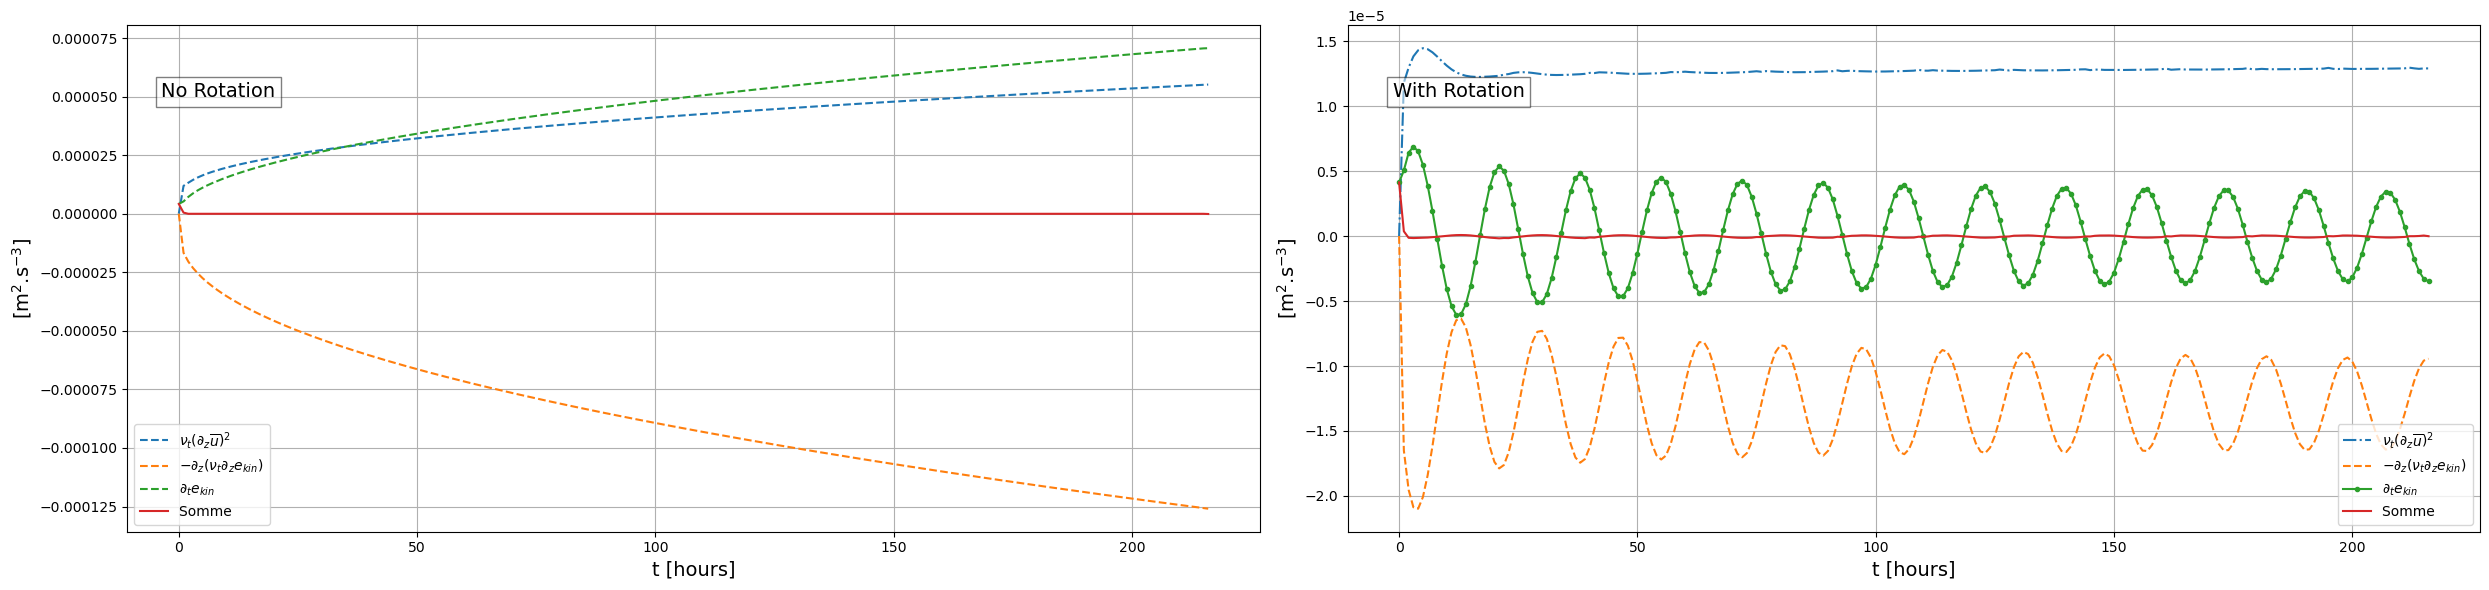

In [484]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
plt.plot(t/hours, E3_norot, '--', label=r'$\nu_t (\partial_z \overline{u})^2$')
plt.plot(t/hours, -E2_norot, '--', label=r'$-\partial_z ( \nu_t \partial_z e_{kin})$ ')
plt.plot(t/hours, Dt_Ke_norot, '--', label=r'$\partial_t e_{kin}$ ')
plt.plot(t/hours, Dt_Ke_norot - E2_norot + E3_norot, '-', label=r'Somme ')
plt.text(0.03, 0.85, 'No Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=plt.gca().transAxes, fontsize=14, bbox={'facecolor': 'white', 'alpha': 0.5})
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend(loc='lower left')
plt.grid()

# Plot for With Rotation
plt.subplot(1, 2, 2)
plt.plot(t/hours, E3_rot, '-.', label=r'$\nu_t (\partial_z \overline{u})^2$ ')
plt.plot(t/hours, -E2_rot, '--', label=r'$-\partial_z ( \nu_t \partial_z e_{kin})$ ')
plt.plot(t/hours, Dt_Ke_rot, '.-', label=r'$\partial_t e_{kin}$ ')
plt.plot(t/hours, Dt_Ke_rot - E2_rot + E3_rot, '-', label=r'Somme ')
plt.text(0.04, 0.85, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=plt.gca().transAxes, fontsize=14, bbox={'facecolor': 'white', 'alpha': 0.5})
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
plt.savefig('bilan_ekin')
plt.show()

## Bilan $\partial_t b = \partial_z ( \nu_t' \partial_z b)$

 $$f1 = \nu'_t \partial_z \overline{b}$$
 $$F1 = \int \nu'_t \partial_z \overline{b}$$
 $$f2 = \partial_z ( \nu'_t \partial_z \overline{b}) =  \partial_z (f1)$$
 $$f3 = \partial_z ((-z) \nu'_t \partial_z \overline{b}) =  \partial_z ((-z)f1)$$

Capital letter signify the quantitie has been integrated on the vertical axis (column integral)

In [485]:
nuh_rot

<xarray.Variable (time: 217, zi: 1001)>
[217217 values with dtype=float32]
Attributes:
    units:          m2/s
    long_name:      turbulent diffusivity of heat
    standard_name:  ??
    path:           /turbulence

In [486]:
##### Parametre de l'integration #####
H=-z[0,0]
dz  = np.abs(z[0,0].data-z[0,1].data)
dt = hours

##### calcul de nu'
Pr0 = 0.74
#Pr0 = 2.8
nu_prime_rot = nuh_rot#nu_rot/Pr0
nu_prime_norot = nuh_norot#nu_norot/Pr0

#### Derivé temporel ######
dt_b_rot    = np.gradient(b_rot, axis = 0)/dt
dt_b_norot  = np.gradient(b_norot, axis = 0)/dt
Dt_Ep_rot   = np.gradient(Ep_rot/rho0)/dt           #Ep_ etait en kg.m-1s-2, il faut donc normalisé par rho 
Dt_Ep_norot = np.gradient(Ep_norot/rho0)/dt


#### Derivé selon z ######

dz_b_rot      = np.diff(b_rot, axis = 1)/dz
dz_b_rot      =  np.pad(dz_b_rot,((0,0),(1,1)))
#dz_b_rot[:,-1]  = (tx/1027)/nu_rot[:,-1].data
dz_b_norot    = np.diff(b_norot, axis = 1)/dz
dz_b_norot    =  np.pad(dz_b_norot,((0,0),(1,1)))

#f1_rot      = np.diff(nu_prime_rot*dz_b_rot, axis=1)/dz
#f1_norot    = np.diff(nu_prime_norot*dz_b_norot, axis=1)/dz
f1_rot      = nu_prime_rot*dz_b_rot
f1_norot    = nu_prime_norot*dz_b_norot

f2_rot      = np.diff(f1_rot, axis = 1)/dz
f2_norot    = np.diff(f1_norot, axis = 1)/dz
f3_rot      = np.diff(-zi*f1_rot, axis = 1)/dz
f3_norot    = np.diff(-zi*f1_norot, axis = 1)/dz


#### Integrale sur la colonne d'eau : #### 
Dt_b_rot     = np.zeros(t.size)
Dt_b_norot   = np.zeros(t.size)

Dz_b_rot     = np.zeros(t.size)
Dz_b_norot   = np.zeros(t.size)


#Autres 
Nu_prime_rot       = np.zeros(t.size)
Nu_prime_norot     = np.zeros(t.size)
F1_rot             = np.zeros(t.size)
F1_norot           = np.zeros(t.size)
F2_rot             = np.zeros(t.size)
F2_norot           = np.zeros(t.size)
F3_rot             = np.zeros(t.size)
F3_norot           = np.zeros(t.size)

for i in range (len(t)):

    Dz_b_rot[i]     = np.sum((dz_b_rot[i,:])*dz)
    Dz_b_norot[i]   = np.sum((dz_b_norot[i,:])*dz)
    Dt_b_rot[i]     = np.sum((dt_b_rot[i,:])*dz)
    Dt_b_norot[i]   = np.sum((dt_b_norot[i,:])*dz)
    
    
    
    F1_rot[i]       = np.sum((f1_rot[i,:])*dz)
    F1_norot[i]     = np.sum((f1_norot[i,:])*dz)
    F2_rot[i]       = np.sum((f2_rot[i,:])*dz)
    F2_norot[i]     = np.sum((f2_norot[i,:])*dz)
    F3_rot[i]       = np.sum((f3_rot[i,:])*dz)
    F3_norot[i]     = np.sum((f3_norot[i,:])*dz)
    
    Nu_prime_rot[i]       = np.sum((nu_prime_rot[i,:])*dz)
    Nu_prime_norot[i]     = np.sum((nu_prime_norot[i,:])*dz)



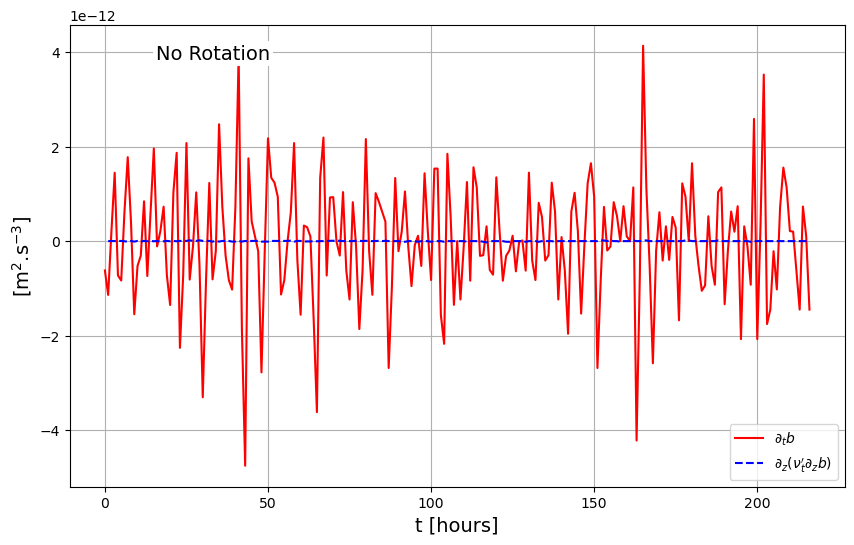

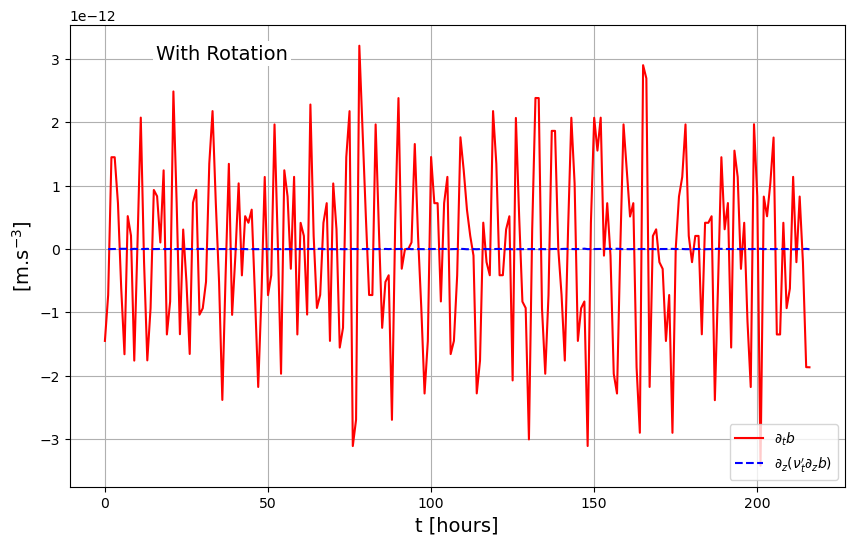

In [487]:
#### Teste de \partial_t b = \partial_z ( \nu_t' \partial_z b) = f2####

plt.figure(figsize=(10, 6))
plt.plot(t/hours,Dt_b_norot,'-', color='r', label='$\partial_t b$')
plt.plot(t[1:]/hours,F2_norot[1:],'--', color='b',label=r"$\partial_z (\nu_t'\partial_z b)$")
plt.text(0.04, 0.9, 'No Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

plt.figure(figsize=(10, 6))
plt.plot(t/hours, Dt_b_rot,'-', color='r', label='$\partial_t b$')
plt.plot(t[1:]/hours,F2_rot[1:],'--', color='b',label=r"$\partial_z (\nu_t'\partial_z b)$")
plt.text(0.04, 0.9, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.ylabel('[m.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

### Test de $\nu'_t(\partial_z b) = G$ avec $G=B$ le Buoyancy prduction en sortie de Gotm 

On a $\nu'_t = \frac{\nu_t}{Pr}$, avec Prandtl fixe dans le fichier d'initialisation $Pr_0 = 0.74$ 

On va verifier cette valeure

In [488]:

G_rot_int = np.zeros(t.size)
G_norot_int = np.zeros(t.size)

for i in range (len(t)):

    G_rot_int[i] = np.sum((0.5*(G_rot[i,1:]+G_rot[i,:-1]))*dz)
    G_norot_int[i] = np.sum((0.5*(G_norot[i,1:]+G_norot[i,:-1]))*dz)
    #epsilon_norot[i] = np.sum((eps_norot[i, :surf])*dz*np.mean(rho_rot))


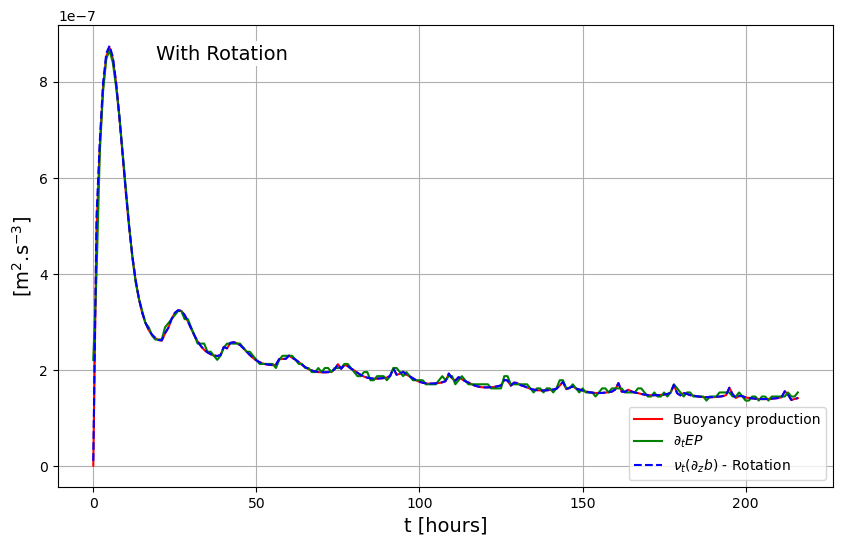

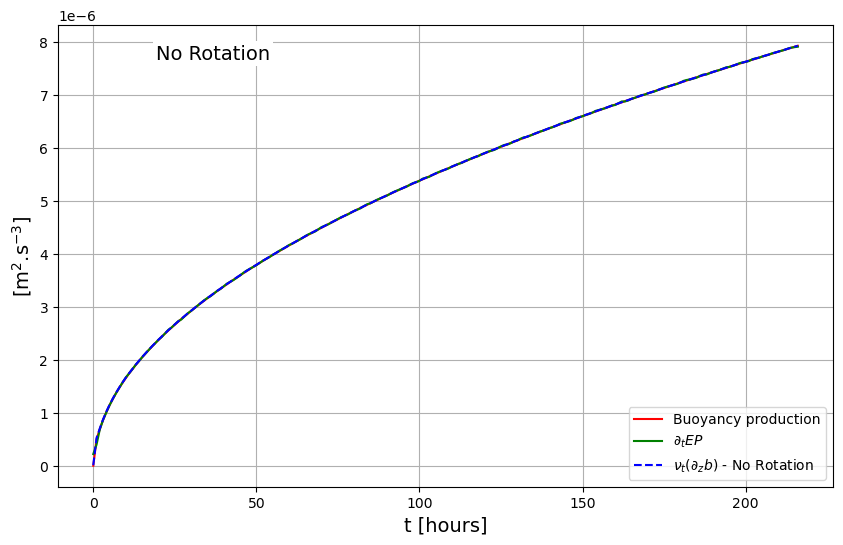

In [489]:
plt.figure(figsize=(10, 6))
plt.plot(t/hours,-G_rot_int,'-', color='r', label='Buoyancy production')
plt.plot(t/hours,Dt_Ep_rot,'-', color='g', label='$\partial_t EP$')
plt.plot(t/hours,F1_rot,'--', color='b',label=r'$\nu_t(\partial_z b)$ - Rotation')
plt.text(0.04, 0.9, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

plt.figure(figsize=(10, 6))
plt.plot(t/hours,-G_norot_int,'-', color='r', label='Buoyancy production')
plt.plot(t/hours,Dt_Ep_norot,'-', color='g', label='$\partial_t EP$')
plt.plot(t/hours,F1_norot,'--', color='b',label=r'$\nu_t(\partial_z b)$ - No Rotation')
plt.text(0.04, 0.9, 'No Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

## Bilan d'energie $\partial_t e_{pot} -  \partial_z ((-z) \nu'_t \partial_z b)=  \nu'_t [(\partial_z b)]=-G$

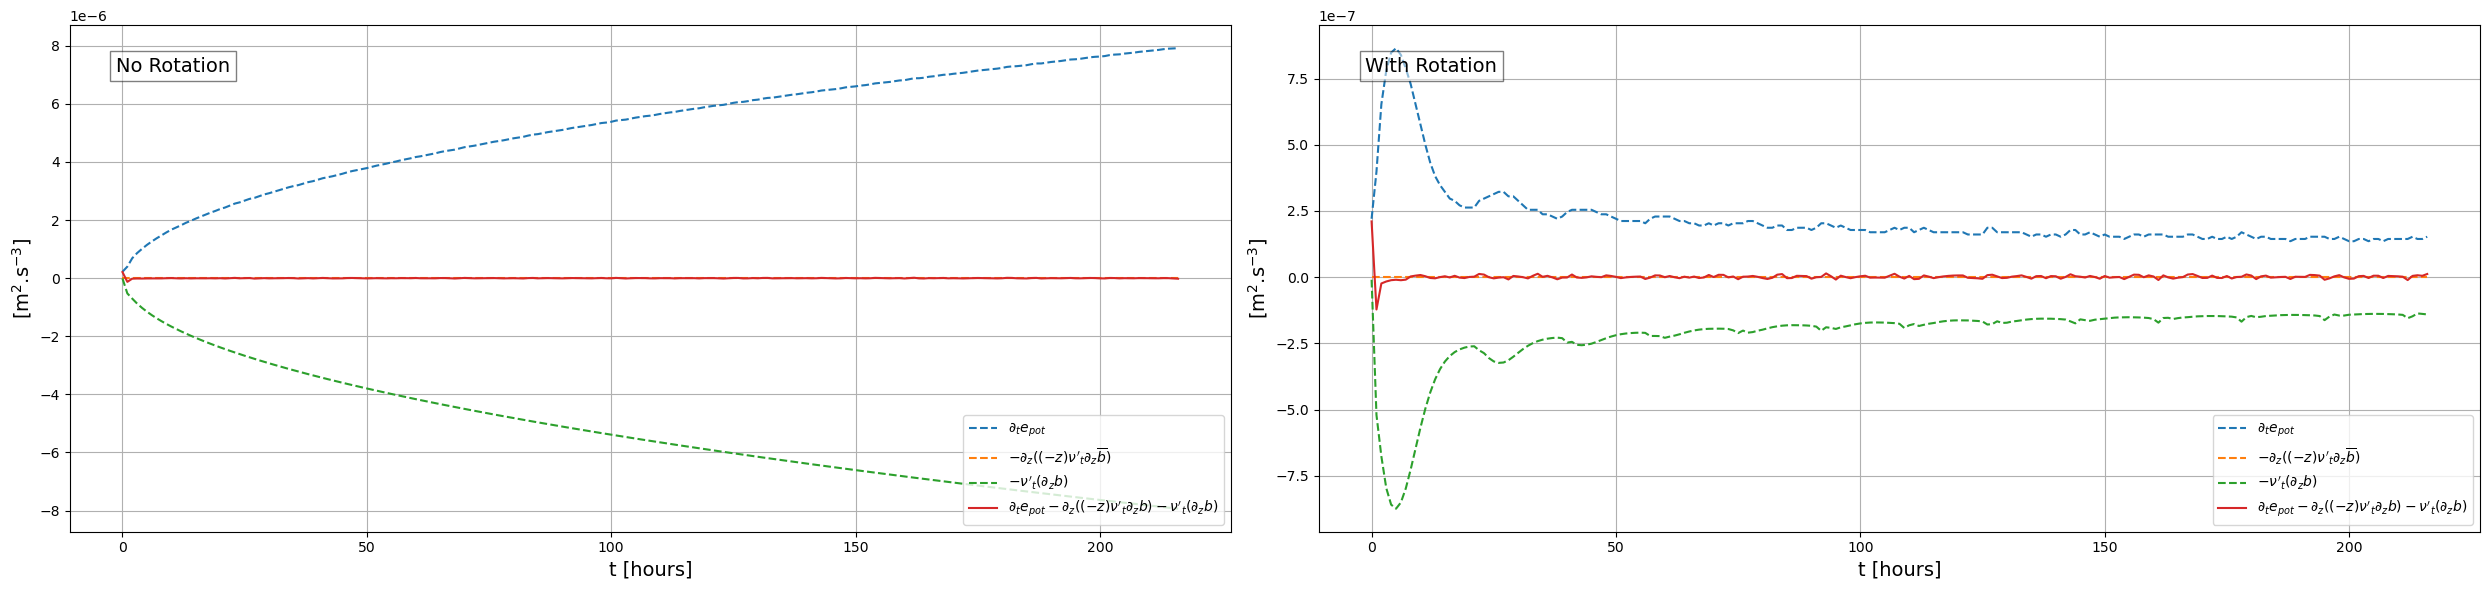

In [490]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
plt.plot(t/hours, Dt_Ep_norot, '--', label='$\partial_t e_{pot}$')
plt.plot(t/hours, -F3_norot, '--', label=r"$-\partial_z ((-z) \nu'_t \partial_z \overline{b})$")
plt.plot(t/hours, -F1_norot, '--', label=r"$- \nu'_t (\partial_z b)$")
plt.plot(t/hours, Dt_Ep_norot - F3_norot - F1_norot, '-', label=r"$\partial_t e_{pot} -  \partial_z ((-z) \nu'_t \partial_z b) - \nu'_t (\partial_z b)$")

plt.text(0.04, 0.9, 'No Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=plt.gca().transAxes, fontsize=14, bbox={'facecolor': 'white', 'alpha': 0.5})
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

# Plot for With Rotation
plt.subplot(1, 2, 2)
plt.plot(t/hours, Dt_Ep_rot, '--', label='$\partial_t e_{pot}$')
plt.plot(t/hours, -F3_rot, '--', label=r"$-\partial_z ((-z) \nu'_t \partial_z \overline{b})$")
plt.plot(t/hours, -F1_rot, '--', label=r"$- \nu'_t (\partial_z b)$")
plt.plot(t/hours, Dt_Ep_rot - F3_rot - F1_rot, '-', label=r"$\partial_t e_{pot} -  \partial_z ((-z) \nu'_t \partial_z b) - \nu'_t (\partial_z b)$")

plt.text(0.04, 0.9, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=plt.gca().transAxes, fontsize=14, bbox={'facecolor': 'white', 'alpha': 0.5})
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
plt.savefig('bilan_epot')
plt.show()


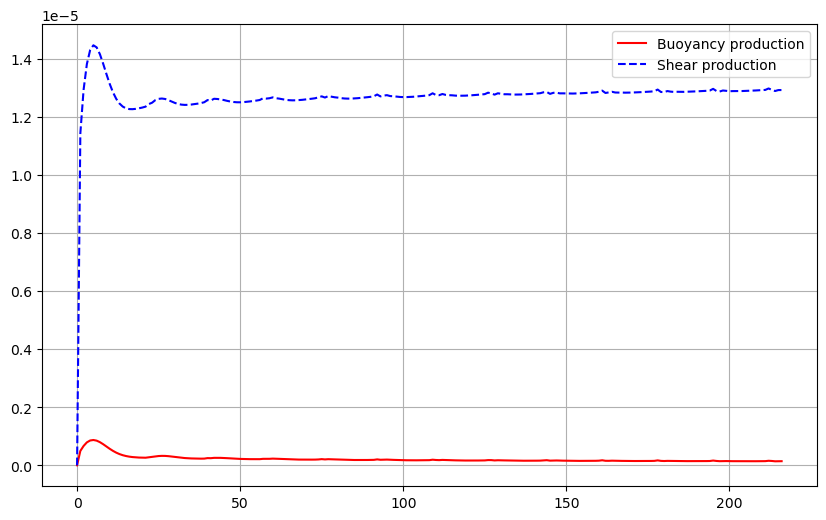

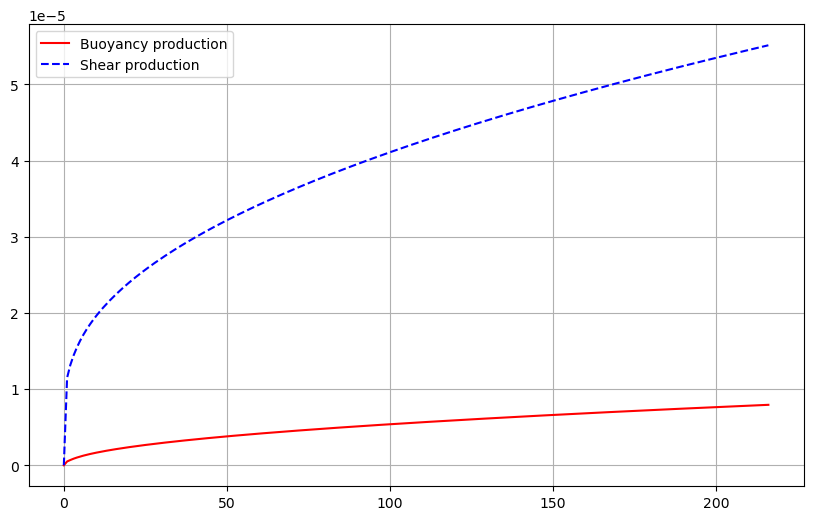

In [491]:
plt.figure(figsize=(10, 6))
plt.plot(t/hours,-G_rot_int,'-', color='r', label='Buoyancy production')
plt.plot(t/hours,P_rot_int,'--', color='b',label='Shear production')
#plt.plot(t/hours,Eturb_rot/rho0,'--', color='g',label='Shear production')
plt.legend()
plt.grid()

plt.figure(figsize=(10, 6))
plt.plot(t/hours,-G_norot_int,'-', color='r', label='Buoyancy production')
plt.plot(t/hours,P_norot_int,'--', color='b',label='Shear production')
#plt.plot(t/hours,Eturb_norot/rho0,'--', color='g',label='Shear production')
plt.legend()
plt.grid()

## Bilan local de TKE

- Faire un bilan local de la TKE et verfier en chaque point que $P=B = \epsilon$  (es-ce que les termes d'advection ne sont ils pas a prendre en compte ?)



In [492]:
eps_rot[:,:-1]

<xarray.Variable (time: 217, zi: 1000)>
array([[1.000000e-14, 1.000000e-14, 1.000000e-14, ..., 1.000000e-14,
        1.000000e-14, 1.000000e-14],
       [1.000000e-14, 1.634260e-14, 1.630285e-14, ..., 7.972685e-06,
        1.173172e-05, 2.132726e-05],
       [1.000000e-14, 1.000000e-14, 1.000000e-14, ..., 7.975603e-06,
        1.173026e-05, 2.132221e-05],
       ...,
       [1.000000e-14, 1.000000e-14, 1.000000e-14, ..., 7.962411e-06,
        1.171913e-05, 2.131429e-05],
       [1.000000e-14, 1.000000e-14, 1.000000e-14, ..., 7.962696e-06,
        1.171936e-05, 2.131455e-05],
       [1.000000e-14, 1.000000e-14, 1.000000e-14, ..., 7.962461e-06,
        1.171912e-05, 2.131426e-05]], dtype=float32)
Attributes:
    units:          m2/s3
    long_name:      energy dissipation rate
    standard_name:  ??
    path:           /turbulence

In [493]:
np.shape(dt_tke_rot)
fermeture_tke =  P_rot[:,:-1] -eps_rot[:,:-1]+G_rot[:,:-1] -dt_tke_rot[:,:-1]


/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/3434558855.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


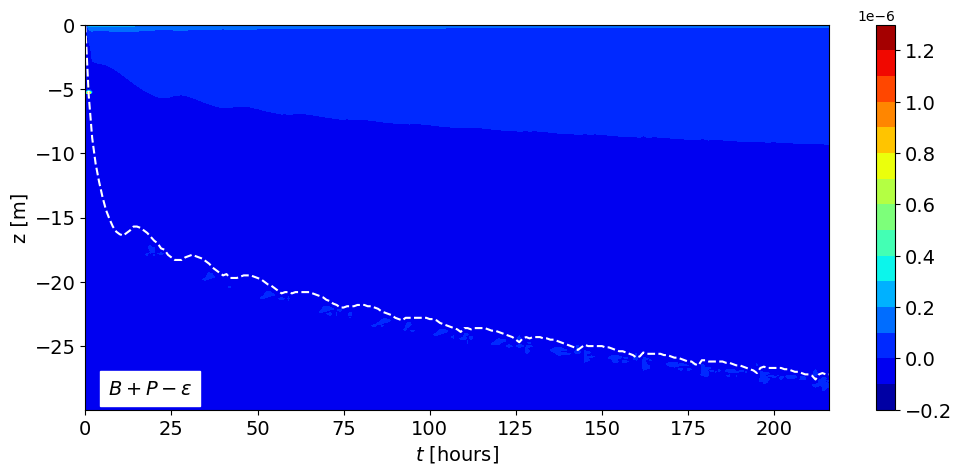

In [494]:

fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=15).tick_values(fermeture_tke.min(),fermeture_tke.max())
CS1 = ax1.contourf(t/hour, zi1D[:-1], fermeture_tke.T, levels=levels, cmap=cmap)

ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')

ax1.text(0.03, 0.03, r'$B+P -\epsilon$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+70, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )

colorbar.ax.tick_params(labelsize=14)

plt.savefig('bilan_tke_local')
plt.show()

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/4083686381.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


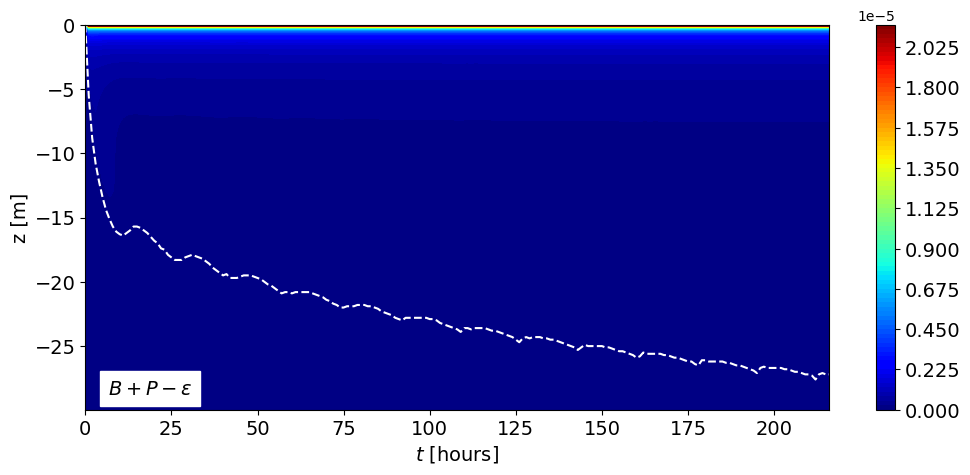

In [495]:

fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=100).tick_values(eps_rot[:,:-1].min(),eps_rot[:,:-1].max())
CS1 = ax1.contourf(t/hour, zi1D[:-1], eps_rot[:,:-1].T, levels=levels, cmap=cmap)
ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')

ax1.text(0.03, 0.03, r'$B+P -\epsilon$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+70, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )

colorbar.ax.tick_params(labelsize=14)


plt.show()

##### Bilan avec les profils de tous les termes de lequation 22 en fonction de z

In [496]:
eps_rot

<xarray.Variable (time: 217, zi: 1001)>
array([[1.000000e-14, 1.000000e-14, 1.000000e-14, ..., 1.000000e-14,
        1.000000e-14, 1.000000e-14],
       [1.000000e-14, 1.634260e-14, 1.630285e-14, ..., 1.173172e-05,
        2.132726e-05, 6.012979e-05],
       [1.000000e-14, 1.000000e-14, 1.000000e-14, ..., 1.173026e-05,
        2.132221e-05, 6.012979e-05],
       ...,
       [1.000000e-14, 1.000000e-14, 1.000000e-14, ..., 1.171913e-05,
        2.131429e-05, 6.012979e-05],
       [1.000000e-14, 1.000000e-14, 1.000000e-14, ..., 1.171936e-05,
        2.131455e-05, 6.012979e-05],
       [1.000000e-14, 1.000000e-14, 1.000000e-14, ..., 1.171912e-05,
        2.131426e-05, 6.012979e-05]], dtype=float32)
Attributes:
    units:          m2/s3
    long_name:      energy dissipation rate
    standard_name:  ??
    path:           /turbulence

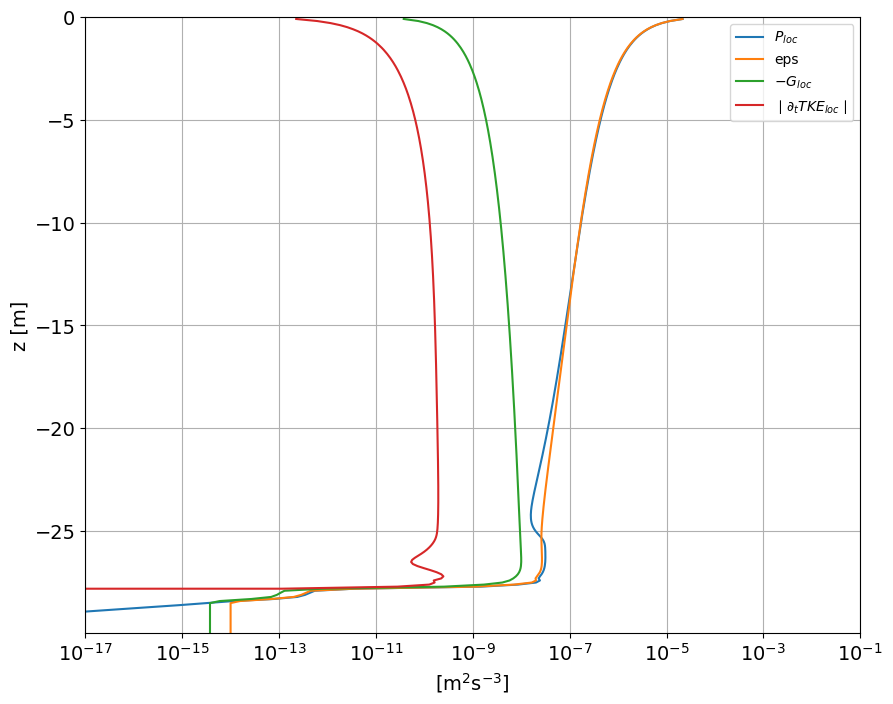

In [497]:

# Supposons que P_rot, eps_rot, G_rot, t, zi1D, h_rot et d'autres variables sont déjà définies

# Dernier instant
last_index = -1

# Créer un nouveau graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Sélectionner les données au dernier instant
P_rot_last = P_rot[last_index, :-1]
eps_rot_last = eps_rot[last_index, :-1]
G_rot_last = G_rot[last_index, :-1]
zi_last = zi1D[:-1]

# Tracer le profil vertical pour chaque composante

ax.plot(P_rot_last, zi_last, label=r'$P_{loc}$')
ax.plot(eps_rot_last, zi_last, label='eps')
ax.plot(-G_rot_last, zi_last, label=r'$-G_{loc}$')
ax.plot(np.abs(dt_tke_rot[last_index,:-1]), zi_last, label=r'$\mid\partial_t TKE_{loc}\mid$')
# Inverser l'axe y
ax.invert_yaxis()

# Ajouter une légende
ax.legend()

# Ajouter des étiquettes et ajuster les paramètres
ax.set_ylabel('z [m]', fontsize=14)
ax.set_xlabel('[m$^2$s$^{-3}$]', fontsize=14)
ax.set_ylim([-H + 70, 0])
ax.set_xlim([1e-17, 1e-1])
ax.set_xscale('log')
ax.tick_params(labelsize=14)
plt.grid()
# Afficher le graphique

plt.show()



In [498]:
h_rot[-2]

<xarray.Variable ()>
array(27.2, dtype=float32)
Attributes:
    units:      m
    long_name:  surface mixed layer depth
    path:       /surface

In [499]:
np.where(P_rot_last==0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

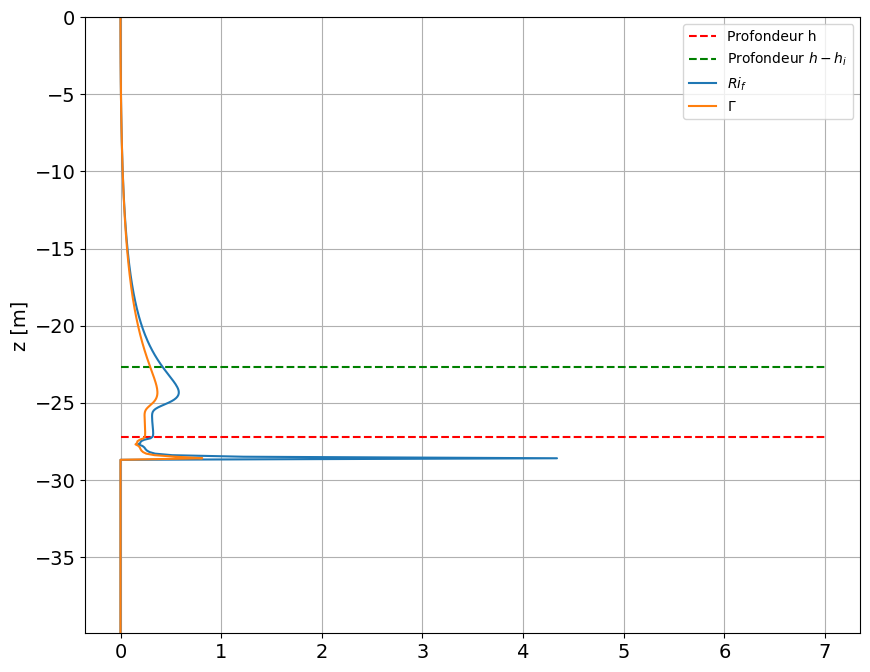

In [500]:
Ri_f = -G_rot_last/P_rot_last
Ri_f = np.where((Ri_f > 1e1), 0, Ri_f)
gamma = Ri_f/(1+Ri_f)
# Créer un nouveau graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer le profil vertical pour chaque composante
#ax.hlines(-h_rot[-2],1e-3, 1e3 ,colors='r', linestyles='dashed', label='Profondeur h')
ax.hlines(-h_rot[-1],0, 7 ,colors='r', linestyles='dashed', label='Profondeur h')
ax.hlines(-h_rot[-1]+4.5,0, 7 ,colors='g', linestyles='dashed', label='Profondeur $h-h_i$')

ax.plot(Ri_f, zi_last, label=r'$Ri_f$')
ax.plot(gamma, zi_last, label=r'$\Gamma$')

# Inverser l'axe y
ax.invert_yaxis()

# Ajouter une légende
ax.legend()

# Ajouter des étiquettes et ajuster les paramètres
ax.set_ylabel('z [m]', fontsize=14)
#ax.set_xlabel('[m$^2$s$^{-3}$]', fontsize=14)
ax.set_ylim([-H + 60, 0])
#ax.set_xlim([1e-3, 1e3])
#ax.set_xscale('log')
ax.tick_params(labelsize=14)
plt.grid()
# Afficher le graphique

plt.show()

In [501]:

###### Indice de l'interface de la couche de mélange et zone stablement stratifié #### 
idh_rot = np.zeros(len(t),dtype=np.int64)

for i in range (len(t)):
    idh_rot[i]= np.argmin(np.abs(z[i].data+h_rot[i].data))-10#   6 par defaut ->  Dans le diagnostique pur epsilon, 6 est la valeure la plus adaptée


#### Calcul de la u  pres de l'interface ######
#ui_rot= np.zeros((len(t)))
#for i in range (1,len(t)):
j1 = idh_rot[-i]
j1

ui_rot = u_rot[-1,j1]

h_i = 1/4 * ui_rot**2/NN0 /h_rot[-1]     # On rappel que NN0 represente N^2 

ui_rot

<xarray.Variable ()>
array(-0.023927, dtype=float32)
Attributes:
    units:          m/s
    long_name:      x-velocity
    standard_name:  ??
    path:           /velocities

## Bilan des terme de la TKE intégré sur la verticale


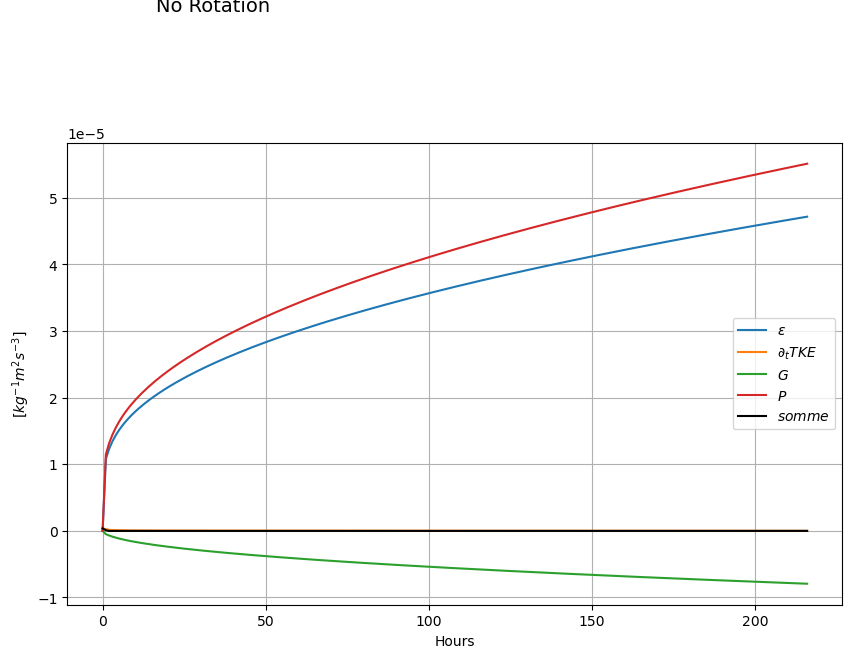

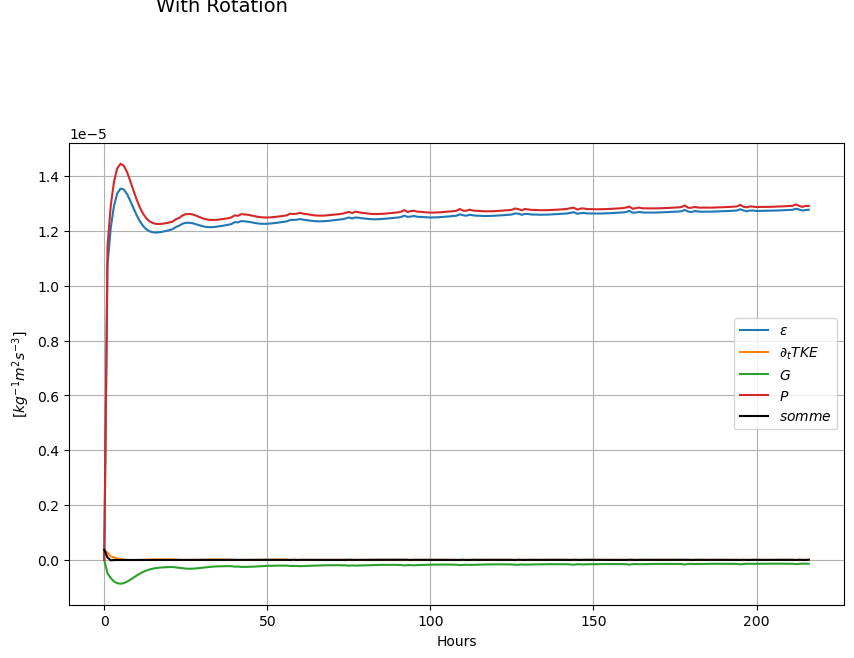

In [502]:
plt.figure(figsize=(10, 6))
plt.plot(t/hours,epsilon_norot,label='$\epsilon $')
plt.plot(t/hour,Dt_Tke_norot , label='$\partial_t TKE $') 
plt.plot(t/hours,G_norot_int,label='$G$')
plt.plot(t/hour,P_norot_int , label='$P$')
somme_norot = Dt_Tke_norot -G_norot_int-P_norot_int+epsilon_norot
plt.plot(t/hour,somme_norot ,'k', label='$somme$')
plt.grid()
plt.xlabel('Hours')
plt.ylabel('$[kg^{-1}m^2s^{-3}]$')
plt.text(0.04, 0.9, 'No Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.legend(loc='center right')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t/hours,epsilon_rot,label='$\epsilon $')
plt.plot(t/hour,Dt_Tke_rot , label='$\partial_t TKE $') 
plt.plot(t/hours,G_rot_int,label='$G$')
plt.plot(t/hour,P_rot_int , label='$P$')
somme_rot = Dt_Tke_rot -G_rot_int-P_rot_int+epsilon_rot
plt.plot(t/hour,somme_rot ,'k', label='$somme$')
plt.grid()
plt.xlabel('Hours')
plt.ylabel('$[kg^{-1}m^2s^{-3}]$')
plt.text(0.04, 0.9, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.legend(loc='center right')
plt.show()

Histograme des termes de l'equation TKE intégré verticalement

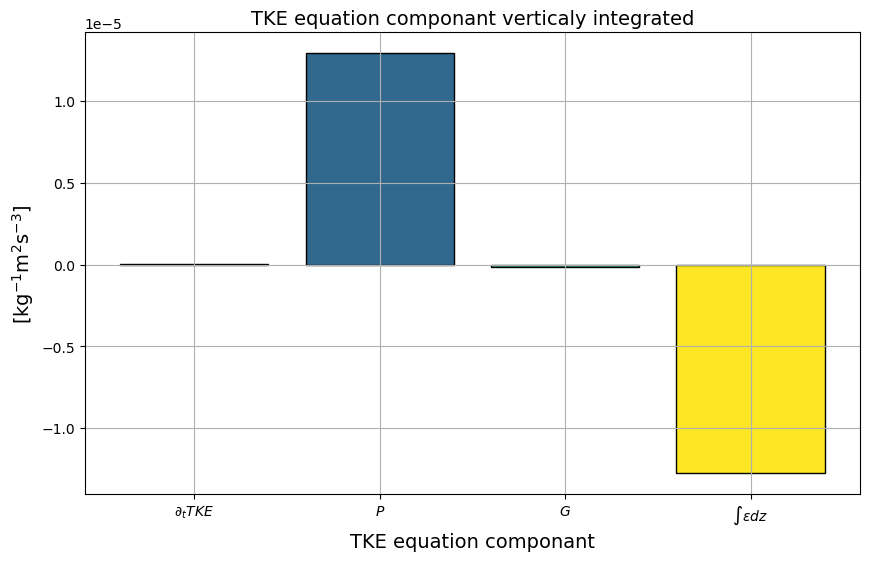

In [503]:

# Assuming you have arrays for each budget component
labels = ['$\partial_t TKE $', '$P$','$G$', '$ \int \epsilon dz$']


# Assuming you have arrays for each budget component
data = np.array([Dt_Tke_rot,P_rot_int, G_rot_int, -epsilon_rot])
# Extracting the last values of each array
last_values = data[:, -1]



# Generating distinct colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(labels, last_values, color=colors,edgecolor='black', linewidth=1)
plt.title('TKE equation componant verticaly integrated',fontsize=14)
plt.xlabel('TKE equation componant',fontsize=14)
plt.ylabel('[kg$^{-1}$m$^{2}$s$^{-3}$]',fontsize=14)


plt.show()



## Bilan $\partial_t EK +\partial_t Ep = \langle U.u_*^2 \rangle +P+ G $

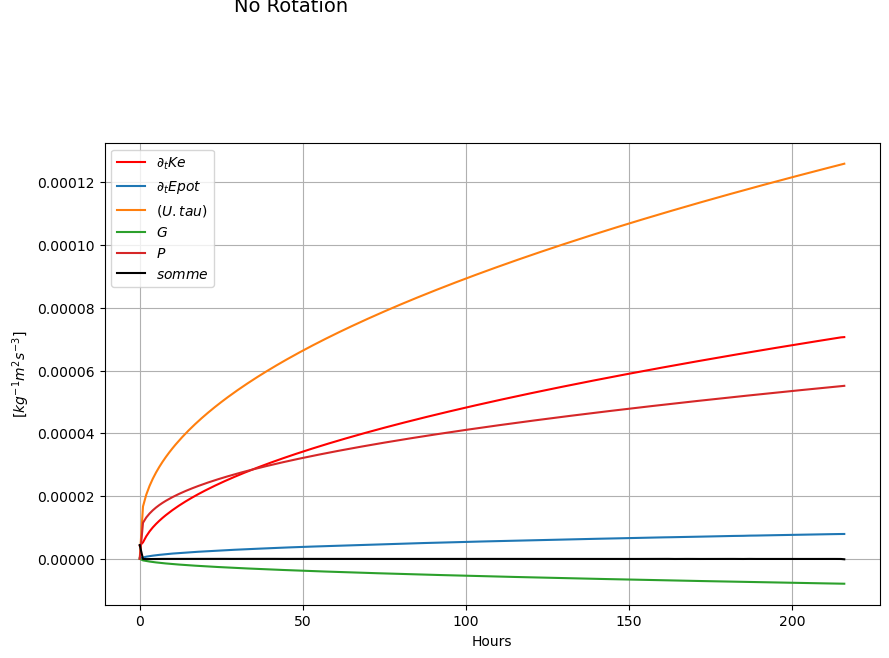

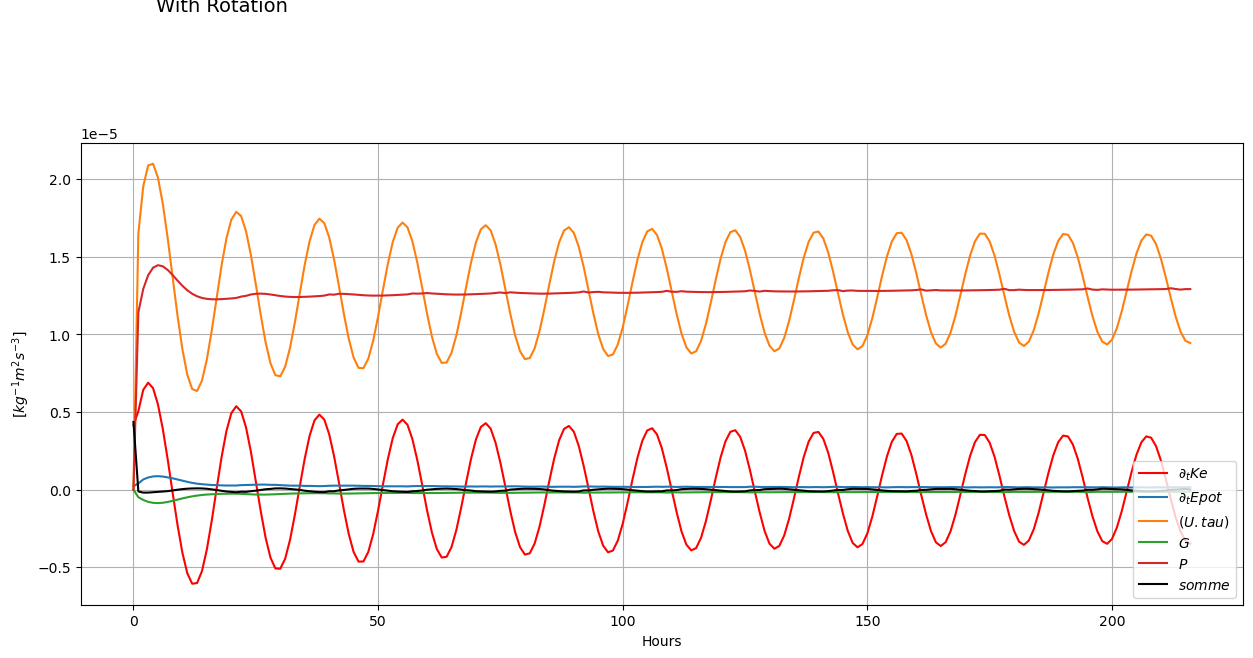

In [504]:
plt.figure(figsize=(10, 6))
plt.plot(t/hours,Dt_Ke_norot, 'r', label = '$\partial_t Ke $' ) 
plt.plot(t/hours, Dt_Ep_norot,label='$\partial_t Epot$')
plt.plot(t/hours,(U_norot*u_taus_norot**2), label='($U.tau$)')
plt.plot(t/hours,G_norot_int,label='$G$')
plt.plot(t/hour,P_norot_int , label='$P$')
somme_norot = Dt_Ke_norot+Dt_Ep_norot-(U_norot*u_taus_norot**2)+G_norot_int+P_norot_int

plt.plot(t/hour,somme_norot ,'k', label='$somme$')
plt.grid()
plt.xlabel('Hours')
plt.ylabel('$[kg^{-1}m^2s^{-3}]$')
plt.text(0.14, 0.9, 'No Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(t/hours,Dt_Ke_rot, 'r', label = '$\partial_t Ke $' ) 
plt.plot(t/hours, Dt_Ep_rot,label='$\partial_t Epot$')
plt.plot(t/hours,(U_rot*u_taus_rot**2), label='($U.tau$)')
plt.plot(t/hours,G_rot_int,label='$G$')
plt.plot(t/hour,P_rot_int , label='$P$')
somme_rot = Dt_Ke_rot+Dt_Ep_rot-(U_rot*u_taus_rot**2)+G_rot_int+P_rot_int

plt.plot(t/hour,somme_rot ,'k', label='$somme$')
plt.grid()
plt.xlabel('Hours')
plt.ylabel('$[kg^{-1}m^2s^{-3}]$')
plt.text(0.04, 0.9, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.legend(loc='lower right')
plt.show()

## Bilan d'energie 

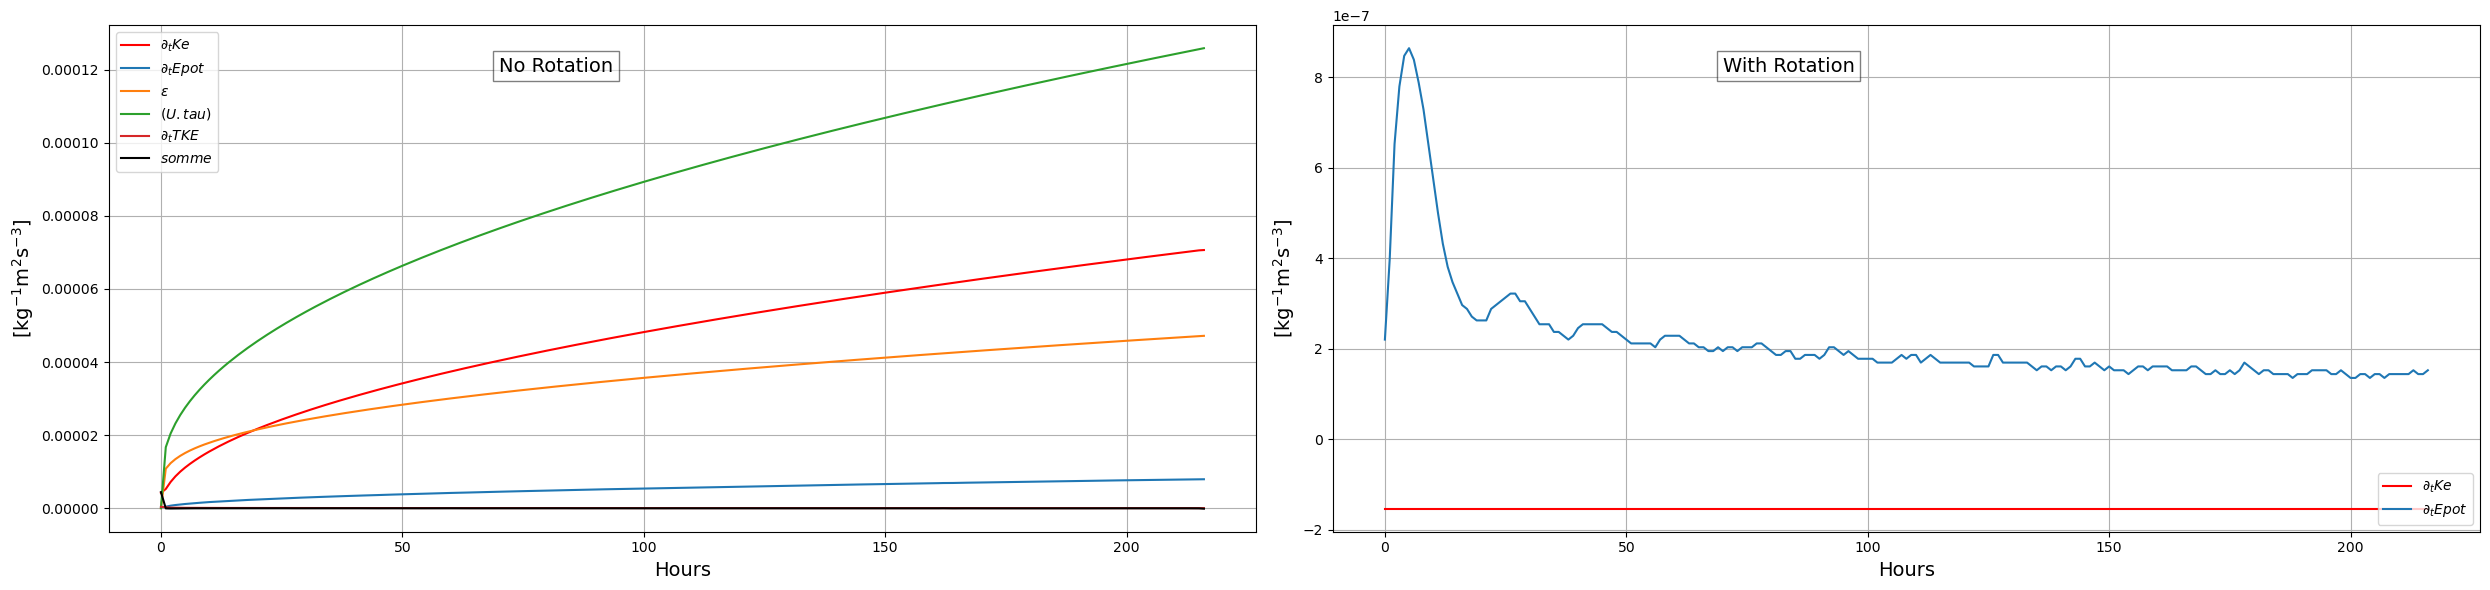

In [505]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
plt.plot(t/hours, Dt_Ke_norot, 'r', label='$\partial_t Ke $')
plt.plot(t/hours, Dt_Ep_norot, label='$\partial_t Epot$')
plt.plot(t/hours, epsilon_norot, label='$\epsilon $')
plt.plot(t/hours, (U_norot*u_taus_norot**2), label=r'($U.tau$)')
plt.plot(t/hours, Dt_Tke_norot, label='$\partial_t TKE $')
plt.plot(t/hours, somme_norot, 'k', label='$somme$')
plt.grid()
plt.xlabel('Hours',fontsize=14)
plt.ylabel('[kg$^{-1}$m$^2$s$^{-3}$]',fontsize=14)
plt.text(0.34, 0.9, 'No Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=plt.gca().transAxes, fontsize=14, bbox={'facecolor': 'white', 'alpha': 0.5})
plt.legend()

# Plot for With Rotation
plt.subplot(1, 2, 2)
Dt_Ke_rot_meaned = np.ones(Dt_Ke_rot.shape)*np.mean(Dt_Ke_rot[-3*iTf:])
#plt.plot(t/hours, Dt_Ke_rot, 'r', label='$\partial_t Ke $')
plt.plot(t/hours, Dt_Ke_rot_meaned, 'r', label='$\partial_t Ke $')
plt.plot(t/hours, Dt_Ep_rot, label='$\partial_t Epot$')
#plt.plot(t/hours, epsilon_rot, label='$\epsilon $')
#plt.plot(t/hours, (U_rot*u_taus_rot**2), label=r'($U.tau$)')
#plt.plot(t/hours, Dt_Tke_rot, label='$\partial_t TKE $')
#plt.plot(t/hours, somme_rot, 'k', label='$somme$')
plt.grid()
plt.xlabel('Hours',fontsize=14)
plt.ylabel('[kg$^{-1}$m$^2$s$^{-3}$]',fontsize=14)
plt.text(0.34, 0.9, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=plt.gca().transAxes, fontsize=14, bbox={'facecolor': 'white', 'alpha': 0.5})
plt.legend(loc='lower right')
plt.savefig("fermeture_bilan_energie")
plt.tight_layout()
plt.show()

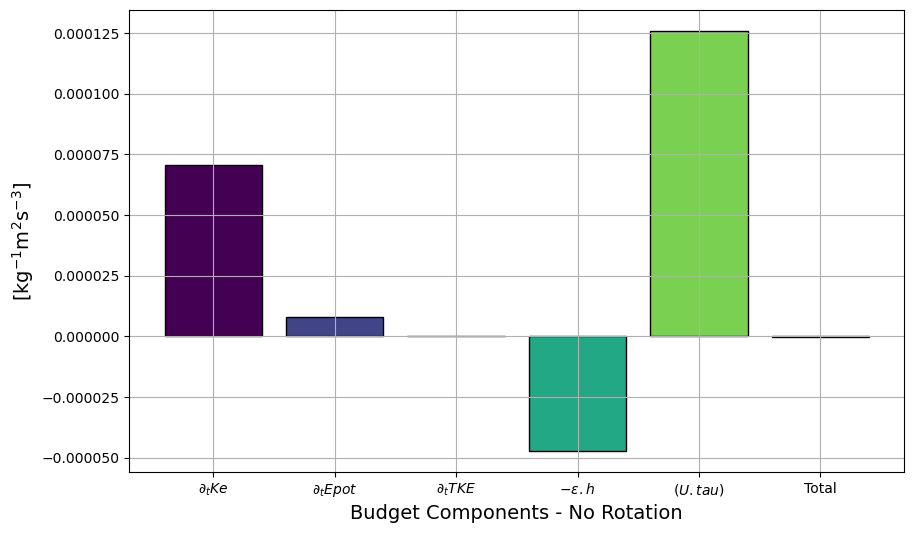

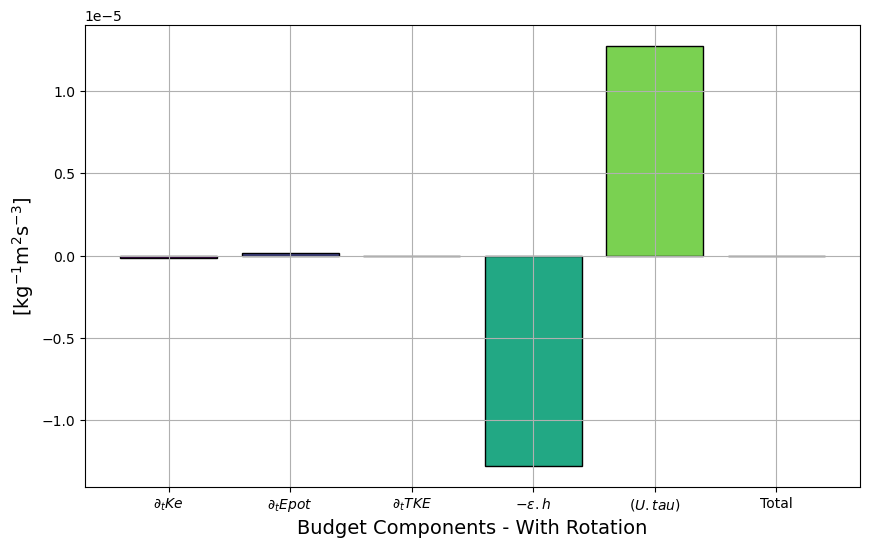

In [506]:
######### Without rotation ############

Dt_Ke_rot_meaned = np.ones(Dt_Ke_rot.shape)*np.mean(Dt_Ke_rot[-3*iTf:])
U_rot_meaned = np.ones(U_rot.shape)*np.mean(U_rot[-3*iTf:])
# Assuming you have arrays for each budget component
labels = ['$\partial_t Ke$', '$\partial_t Epot$','$\partial_t TKE$', '$-\epsilon.h$', '($U.tau$)']


# Assuming you have arrays for each budget component
data = np.array([Dt_Ke_norot, Dt_Ep_norot, Dt_Tke_norot, -epsilon_norot, +(U_norot*u_taus_norot**2)])
# Extracting the last values of each array
last_values = data[:, -1]

# Adding a bar for the total sum of the last values
total_sum = np.sum(data[:2, -1])-np.sum(data[2:, -1])
last_values = np.append(last_values, total_sum)
labels.append('Total')

# Generating distinct colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(labels, last_values, color=colors,edgecolor='black', linewidth=1)

plt.xlabel('Budget Components - No Rotation',fontsize=14)
plt.ylabel('[kg$^{-1}$m$^{2}$s$^{-3}$]',fontsize=14)
plt.show()



######### With rotation ############

# Assuming you have arrays for each budget component
labels = ['$\partial_t Ke$', '$\partial_t Epot$','$\partial_t TKE$', '$-\epsilon.h$', '($U.tau$)']


# Assuming you have arrays for each budget component
data = np.array([Dt_Ke_rot_meaned, Dt_Ep_rot, Dt_Tke_rot, -epsilon_rot, (U_rot_meaned*u_taus_rot**2)])
# Extracting the last values of each array
last_values = data[:, -1]

# Adding a bar for the total sum of the last values
total_sum = np.sum(last_values)
last_values = np.append(last_values, total_sum)
labels.append('Total')

# Generating distinct colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.grid()
plt.bar(labels, last_values, color=colors,edgecolor='black', linewidth=1)

plt.xlabel('Budget Components - With Rotation',fontsize=14)
plt.ylabel('[kg$^{-1}$m$^{2}$s$^{-3}$]',fontsize=14)


plt.show()



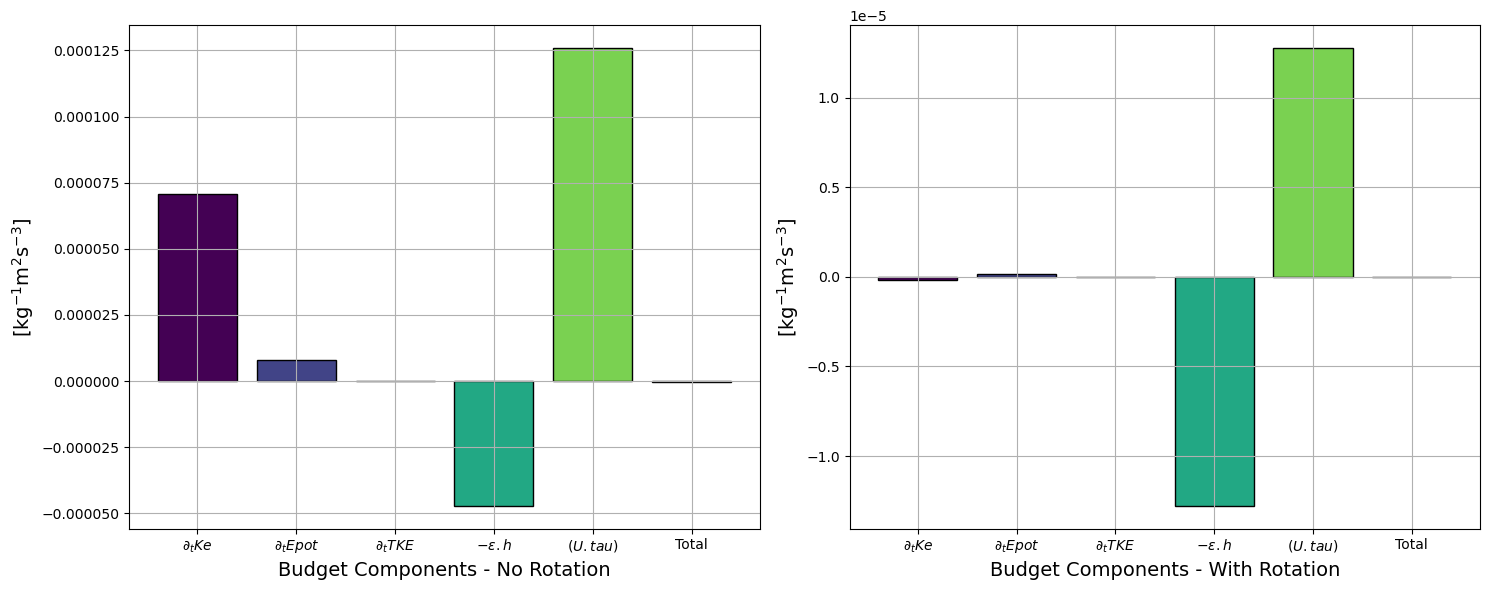

In [507]:
######### Without rotation ############

Dt_Ke_rot_meaned = np.ones(Dt_Ke_rot.shape)*np.mean(Dt_Ke_rot[-3*iTf:])
U_rot_meaned = np.ones(U_rot.shape)*np.mean(U_rot[-3*iTf:])
# Assuming you have arrays for each budget component
labels_norot = ['$\partial_t Ke$', '$\partial_t Epot$', '$\partial_t TKE$', '$-\epsilon.h$', '($U.tau$)']

# Assuming you have arrays for each budget component
data_norot = np.array([Dt_Ke_norot, Dt_Ep_norot, Dt_Tke_norot, -epsilon_norot, +(U_norot*u_taus_norot**2)])
# Extracting the last values of each array
last_values_norot = data_norot[:, -1]

# Adding a bar for the total sum of the last values
total_sum_norot = np.sum(data_norot[:2, -1]) - np.sum(data_norot[2:, -1])
last_values_norot = np.append(last_values_norot, total_sum_norot)
labels_norot.append('Total')

# Generating distinct colors for each bar
colors_norot = plt.cm.viridis(np.linspace(0, 1, len(labels_norot)))

# Plotting the histogram for No Rotation
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(labels_norot, last_values_norot, color=colors_norot, edgecolor='black', linewidth=1)
plt.xlabel('Budget Components - No Rotation', fontsize=14)
plt.ylabel('[kg$^{-1}$m$^{2}$s$^{-3}$]', fontsize=14)
plt.grid()

# With Rotation
# Assuming you have arrays for each budget component
labels_rot = ['$\partial_t Ke$', '$\partial_t Epot$', '$\partial_t TKE$', '$-\epsilon.h$', '($U.tau$)']

# Assuming you have arrays for each budget component
data_rot = np.array([Dt_Ke_rot_meaned, Dt_Ep_rot, Dt_Tke_rot, -epsilon_rot, (U_rot_meaned*u_taus_rot**2)])
# Extracting the last values of each array
last_values_rot = data_rot[:, -1]

# Adding a bar for the total sum of the last values
total_sum_rot = np.sum(last_values_rot)
last_values_rot = np.append(last_values_rot, total_sum_rot)
labels_rot.append('Total')

# Generating distinct colors for each bar
colors_rot = plt.cm.viridis(np.linspace(0, 1, len(labels_rot)))

# Plotting the histogram for With Rotation
plt.subplot(1, 2, 2)
plt.bar(labels_rot, last_values_rot, color=colors_rot, edgecolor='black', linewidth=1)
plt.xlabel('Budget Components - With Rotation', fontsize=14)
plt.ylabel('[kg$^{-1}$m$^{2}$s$^{-3}$]', fontsize=14)
plt.grid()

plt.savefig('bilan_energie_hist')
plt.tight_layout()
plt.show()



# A l'interface


## Nombre de Richardson 

#### We can compute the local Ri (classic oceanographic Ri)

\begin{equation}
Ri = \frac{N^2}{(du/dz)^2}
\end{equation}

Dans la composante de cisaillement on prend en compte dv/dz a cause des oscillation inertielles 

In [552]:
# %%%%%%%%%%%%%%%%%%%%%%% Calcul des cisaillements  %%%%%%%%%%%%%%%%%%%%%
dudz_rot = np.diff(u_rot,axis=1)/dz
dudz_rot=np.pad(dudz_rot,((0,0),(1,1)))
dudz_norot = np.diff(u_norot,axis=1)/dz
dudz_norot=np.pad(dudz_norot,((0,0),(1,1)))
dvdz_rot = np.diff(v_rot,axis=1)/dz
dvdz_rot=np.pad(dvdz_rot,((0,0),(1,1)))
dvdz_norot = np.diff(v_norot,axis=1)/dz
dvdz_norot=np.pad(dvdz_norot,((0,0),(1,1)))

duvdz_rot =  np.diff(u_rot+v_rot,axis=1)/dz
duvdz_rot=np.pad(duvdz_rot,((0,0),(1,1)))

# %%%%%%%%%%%%%%%%%%%%%%%  Ri avec rotation  %%%%%%%%%%%%%%%%%%%%%%
#Ri_rot = NN_rot[:,:-1]**2/dudz_rot**2
Ri_rot = NN_rot**2/(dudz_rot**2+dvdz_rot**2)


# %%%%%%%%%%%%%%%%%%%%%%%  Ri sans rotation  %%%%%%%%%%%%%%%%%%%%%%

Ri_norot = NN_norot**2/dudz_norot**2



#### Plot of the Evolution of the Richardson number

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/1851655430.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('inferno')
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/1851655430.py:33: RuntimeWarning: divide by zero encountered in log10
  levels = MaxNLocator(nbins=40).tick_values(np.log10(Ri_rot).min(), np.log10(Ri_rot).max())
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/1851655430.py:35: RuntimeWarning: divide by zero encountered in log10
  CS1 = ax1.contourf(t/hour, zi1D,  np.log10(Ri_rot).T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/1851655430.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor r

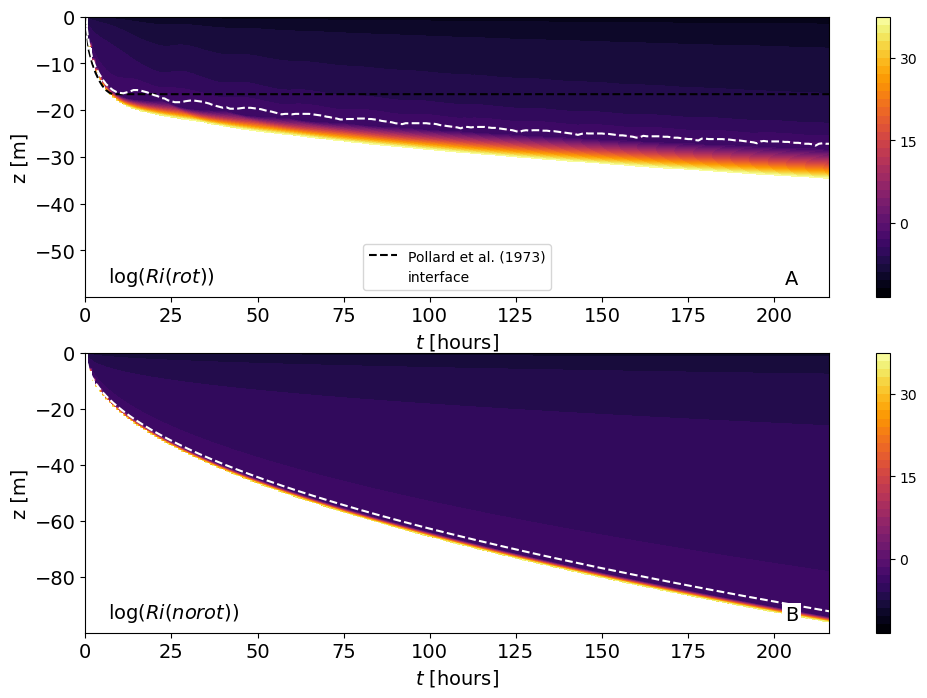

In [553]:
# plot contour plot of entire time series
fig1, (ax1, ax2 )= plt.subplots(2 ,figsize=(12, 8))
plt.subplots_adjust(hspace=0.2)
bprops = {'facecolor': 'white', 'edgecolor': 'none', 'pad': 2}
# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]


# plot all following profiles at time index iPlt
NT      = t.size
iPlt    = NT-1

# water depth
H       = - z[iPlt,0]

# entrainment depth without rotation (Pollard et al., 1973; Price, 1979)
Rv      = 0.6    # bulk Richardson number
h_poll_norot   = (2*Rv)**0.25 * us * (t/np.sqrt(NN0))**0.5

# entrainment depth with rotation (Pollard et al., 1973)
Rv      = 1.0    # bulk Richardson number
h_poll_rot       = us * ( ( 4*Rv*(1.0 - np.cos(f * t)) ) / ( f**2.0 * NN0 ) )**0.25
h_ref   = (8*Rv)**0.25 * us / ( f*np.sqrt(NN0) )**0.5

h_poll_rot[np.where(t > np.pi/f)] = h_ref



hours = 3600
hour  = 3600
cmap = plt.cm.get_cmap('inferno')
levels = MaxNLocator(nbins=40).tick_values(np.log10(Ri_rot).min(), np.log10(Ri_rot).max())
#levels = MaxNLocator(nbins=40).tick_values(np.log10(0.001), np.log10(1000))
CS1 = ax1.contourf(t/hour, zi1D,  np.log10(Ri_rot).T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
ax1.plot(t/hour, -h_poll_rot, '--', color='k',label='Pollard et al. (1973)')
ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')
#ax1.plot(t/hour,-h_norot.data,color= 'b', linewidth=1, label = 'MLD' )
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, r'$\log(Ri (rot))$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+40, 0])
#ax1.set_ylim([-30, -10])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)
colorbar = fig1.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()


cmap = plt.cm.get_cmap('inferno')
levels = MaxNLocator(nbins=40).tick_values(np.log10(Ri_rot).min(), np.log10(Ri_rot).max())
#levels = MaxNLocator(nbins=40).tick_values(np.log10(1/4), np.log10(1000))
CS2 = ax2.contourf(t/hour, zi1D,  np.log10(Ri_norot).T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
ax2.plot(t/hour, -h_poll_norot, '--', color='w')

ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'$\log(Ri(no rot))$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
#ax2.set_ylim([-30, -10])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('$t$ [hours]', fontsize=14)
colorbar2 = fig1.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()



In [554]:
idh_rot = np.zeros(len(t),dtype=np.int64)
idh_norot = np.zeros(len(t),dtype=np.int64)
for i in range (len(t)):
    idh_rot[i]= np.argmin(np.abs(z[i].data+h_rot[i].data))
    idh_norot[i]= np.argmin(np.abs(z[i].data+h_norot[i].data))
np.shape(idh_rot)
np.max(idh_rot)

999

In [555]:
Ri_interface_rot= np.zeros((len(t),15))
Ri_interface_norot= np.zeros((len(t),15))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    R1 = Ri_rot[i,j1-7:j1+8].data
    R2 = Ri_norot[i,j2-7:j2+8].data
    
    Ri_interface_rot[i] =R1
    Ri_interface_norot[i] =R2


dudz_interface_rot= np.zeros((len(t),15))
dudz_interface_norot= np.zeros((len(t),15))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    R1 = dudz_rot[i,j1-7:j1+8].data
    R2 = dudz_norot[i,j2-7:j2+8].data
    
    dudz_interface_rot[i] =R1
    dudz_interface_norot[i] =R2


dvdz_interface_rot= np.zeros((len(t),15))
dvdz_interface_norot= np.zeros((len(t),15))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    R1 = Ri_rot[i,j1-7:j1+8].data
    R2 = Ri_norot[i,j2-7:j2+8].data
    
    dvdz_interface_rot[i] =R1
    dvdz_interface_norot[i] =R2


duvdz_interface_rot= np.zeros((len(t),15))

for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    R1 = duvdz_rot[i,j1-7:j1+8].data
   
    
    duvdz_interface_rot[i] =R1
    

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/1361133969.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('inferno')
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/1361133969.py:15: RuntimeWarning: divide by zero encountered in log10
  CS1 = ax1.contourf(t/hour, Z_interface,  np.log10(Ri_interface_rot).T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/1361133969.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or `

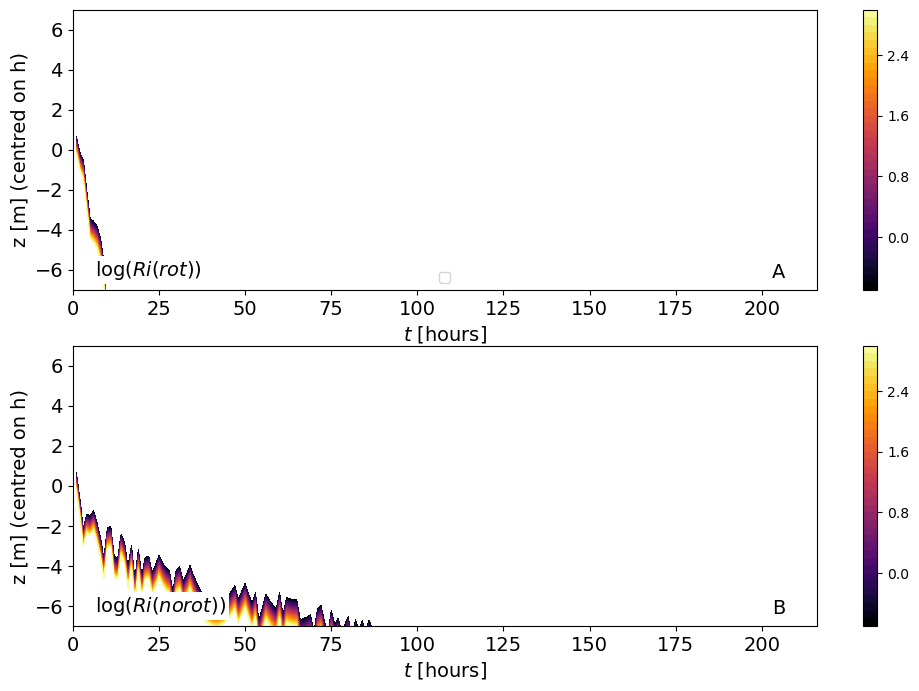

In [556]:

# plot contour plot of entire time series
fig1, (ax1, ax2 )= plt.subplots(2 ,figsize=(12, 8))
plt.subplots_adjust(hspace=0.2)
bprops = {'facecolor': 'white', 'edgecolor': 'none', 'pad': 2}
# generate 1D z-axes for plotting (assuming that grid doesn't change)
z1D   = z[0, :]
zi1D  = zi[0, :]
Z_interface = np.arange(-7,8,1)


cmap = plt.cm.get_cmap('inferno')
#levels = MaxNLocator(nbins=40).tick_values(np.log10(Ri_rot).min(), np.log10(Ri_rot).max())
#levels = MaxNLocator(nbins=40).tick_values(np.log10(1/4), np.log(100))#np.log10(Ri_rot).max())
levels = MaxNLocator(nbins=40).tick_values(np.log10(1/4), np.log10(1000))
CS1 = ax1.contourf(t/hour, Z_interface,  np.log10(Ri_interface_rot).T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
#ax1.plot(t/hour, -h_poll_rot, '--', color='k',label='Pollard et al. (1973)')
#ax1.plot(t/hour, -h_rot, '--', color='k',label='Pollard et al. (1973)')
#ax1.plot(t/hour,-h_norot.data,color= 'b', linewidth=1, label = 'MLD' )
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, r'$\log(Ri (rot))$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m] (centred on h)', fontsize=14)
#ax1.set_ylim([-H, 0])
#ax1.set_ylim([-30, -10])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)
colorbar = fig1.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()


cmap = plt.cm.get_cmap('inferno')
#levels = MaxNLocator(nbins=40).tick_values(np.log10(Ri_rot_bis).min(), np.log10(Ri_rot_bis).max())
levels = MaxNLocator(nbins=40).tick_values(np.log10(1/4), np.log10(1000))
CS2 = ax2.contourf(t/hour, Z_interface,  np.log10(Ri_interface_norot).T, levels=levels, cmap=cmap)#cmocean.cm.thermal)

#ax2.plot(t/hour, -h_poll_norot, '--', color='k')

ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'$\log(Ri(no rot))$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m] (centred on h)', fontsize=14)
#ax2.set_ylim([-H, 0])
#ax2.set_ylim([-30, -10])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('$t$ [hours]', fontsize=14)
colorbar2 = fig1.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()



### Plot du cisaillement verticale


/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/1644937279.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('inferno')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


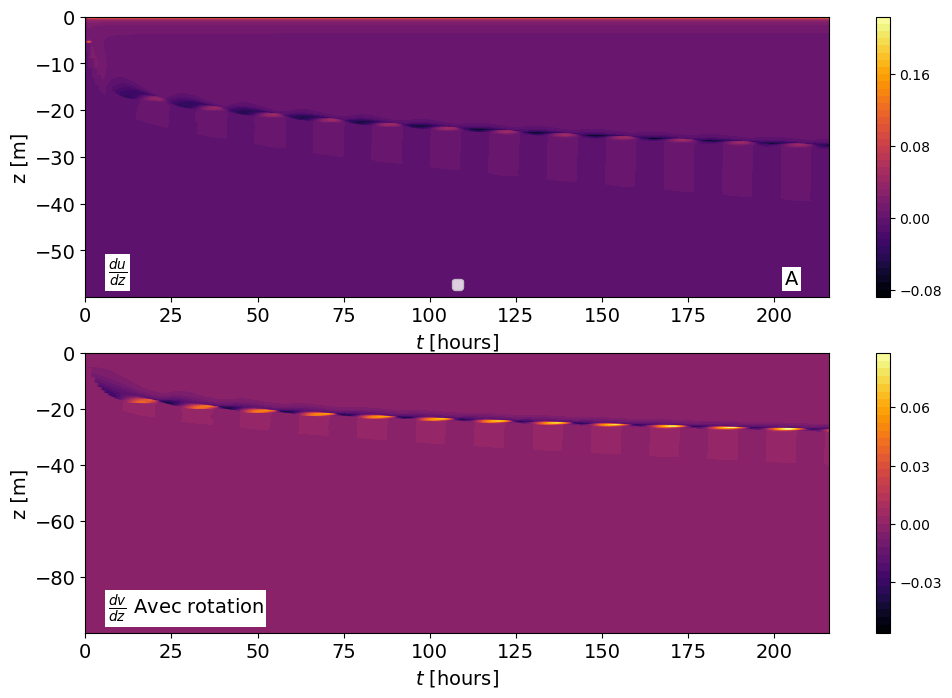

In [557]:
# plot contour plot of entire time series
fig1, (ax1, ax2 )= plt.subplots(2 ,figsize=(12, 8))
plt.subplots_adjust(hspace=0.2)



hours = 3600
hour  = 3600
cmap = plt.cm.get_cmap('inferno')
levels = MaxNLocator(nbins=40).tick_values(dudz_rot.min(), dudz_rot.max())
#levels = MaxNLocator(nbins=40).tick_values(np.log10(0.001), np.log10(1000))
CS1 = ax1.contourf(t/hour, zi1D,  dudz_rot.T, levels=levels, cmap=cmap)#cmocean.cm.thermal)

#ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')
#ax1.plot(t/hour,-h_norot.data,color= 'b', linewidth=1, label = 'MLD' )
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, r'$\frac{du}{dz}$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+40, 0])
#ax1.set_ylim([-30, -10])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)
colorbar = fig1.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()



levels = MaxNLocator(nbins=40).tick_values(dvdz_rot.min(), dvdz_rot.max())
#levels = MaxNLocator(nbins=40).tick_values(np.log10(1/4), np.log10(1000))
CS2 = ax2.contourf(t/hour, zi1D,  dvdz_rot.T, levels=levels, cmap=cmap)
#ax2.plot(t/hour, -h_poll_norot, '--', color='w')
ax2.text(0.03, 0.03, r'$\frac{dv}{dz}$ Avec rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m]', fontsize=14)
ax2.set_ylim([-H, 0])
#ax2.set_ylim([-30, -10])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('$t$ [hours]', fontsize=14)
colorbar2 = fig1.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()



In [558]:
dudz_interface_rot= np.zeros((len(t),15))
dudz_interface_norot= np.zeros((len(t),15))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    R1 = dudz_rot[i,j1-7:j1+8].data
    R2 = dudz_norot[i,j2-7:j2+8].data
    
    dudz_interface_rot[i] =R1
    dudz_interface_norot[i] =R2

dvdz_interface_rot= np.zeros((len(t),15))
dvdz_interface_norot= np.zeros((len(t),15))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    R1 = dvdz_rot[i,j1-7:j1+8].data
    R2 = dvdz_norot[i,j2-7:j2+8].data
    
    dvdz_interface_rot[i] =R1
    dvdz_interface_norot[i] =R2


/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/193648106.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('seismic')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/193648106.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('seismic')
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/193648106.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and wil

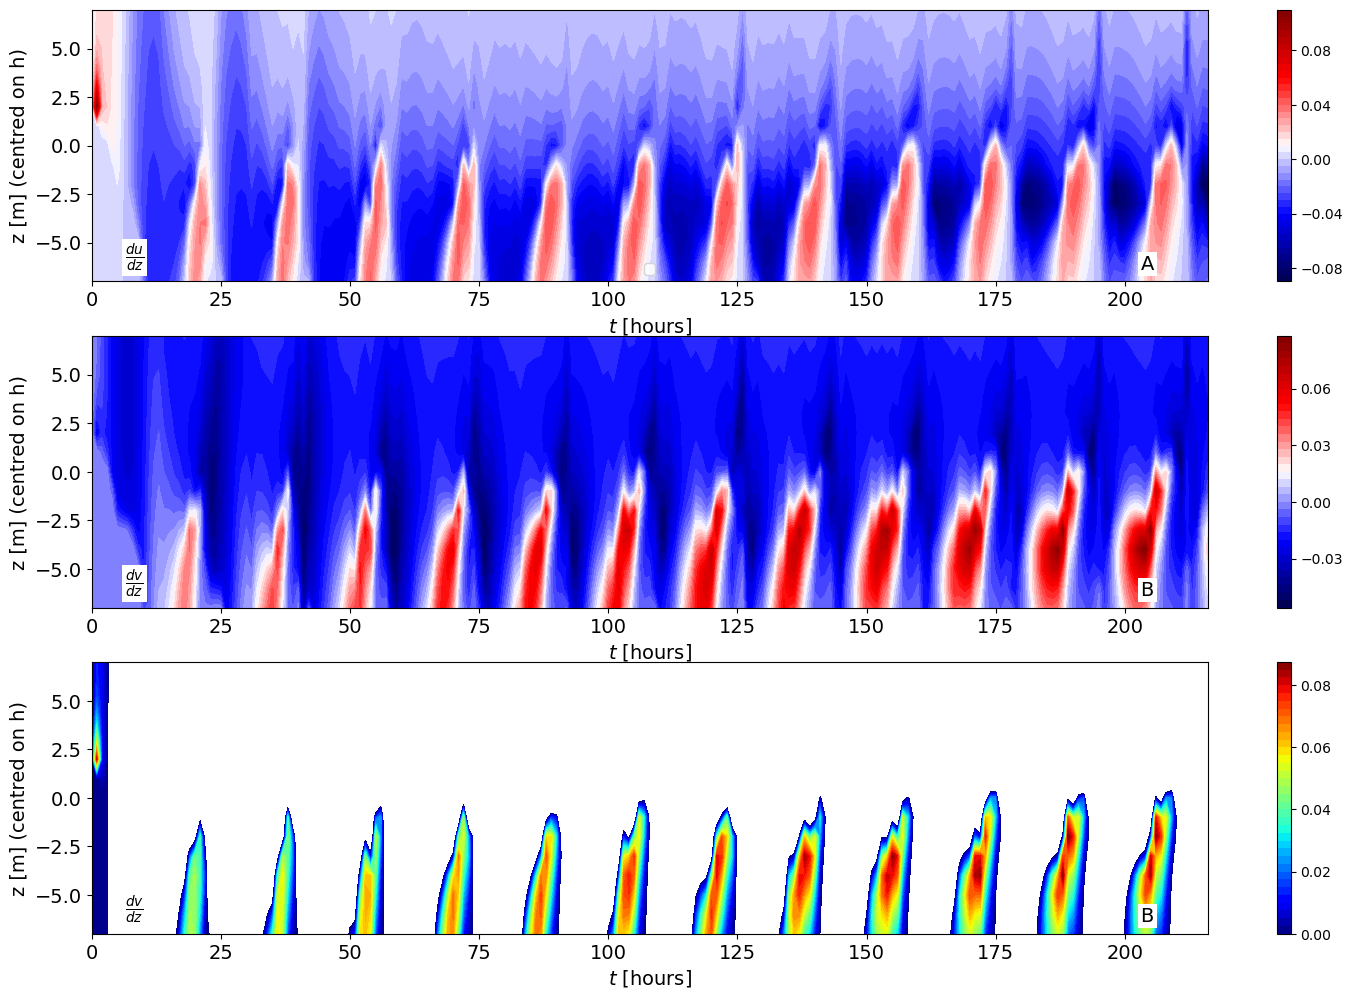

In [559]:

# plot contour plot of entire time series
fig1, (ax1, ax2, ax3 )= plt.subplots(3 ,figsize=(18, 12))
plt.subplots_adjust(hspace=0.2)

cmap = plt.cm.get_cmap('seismic')

#top= np.max((np.abs(dudz_interface_rot.min()),np.abs(dvdz_interface_rot.min()),np.abs(dudz_interface_rot.max()),np.abs(dvdz_interface_rot.max())))

levels = MaxNLocator(nbins=40).tick_values(dudz_interface_rot.min(),dudz_interface_rot.max())
#levels = MaxNLocator(nbins=40).tick_values(-top,top)
CS1 = ax1.contourf(t/hour, Z_interface,  dudz_interface_rot.T, levels=levels, cmap=cmap)#cmocean.cm.thermal)
ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.text(0.03, 0.03, r'$\frac{du}{dz}$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14, bbox=bprops)
ax1.legend(loc='lower center')
ax1.set_ylabel('z [m] (centred on h)', fontsize=14)
#ax1.set_ylim([-H, 0])
#ax1.set_ylim([-30, -10])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)
colorbar = fig1.colorbar(CS1, ax=ax1)
tick_locator = MaxNLocator(nbins=5)
colorbar.locator = tick_locator
colorbar.update_ticks()


cmap = plt.cm.get_cmap('seismic')
levels = MaxNLocator(nbins=40).tick_values(dvdz_interface_rot.min(), dvdz_interface_rot.max())
#levels = MaxNLocator(nbins=40).tick_values(-top,top)
CS2 = ax2.contourf(t/hour, Z_interface,  dvdz_interface_rot.T, levels=levels, cmap=cmap)#cmocean.cm.thermal)

ax2.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.text(0.03, 0.03, r'$\frac{dv}{dz}$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax2.transAxes, fontsize=14, bbox=bprops)
ax2.set_ylabel('z [m] (centred on h)', fontsize=14)
#ax2.set_ylim([-H, 0])
#ax2.set_ylim([-30, -10])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('$t$ [hours]', fontsize=14)
colorbar2 = fig1.colorbar(CS2, ax=ax2)
tick_locator = MaxNLocator(nbins=5)
colorbar2.locator = tick_locator
colorbar2.update_ticks()



shear_interface = dudz_interface_rot**2 + dvdz_interface_rot**2
#duvdz_interface_rot[i]
shear_interface = duvdz_interface_rot
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=40).tick_values(0, shear_interface.max())
CS3 = ax3.contourf(t/hour, Z_interface,  shear_interface.T, levels=levels, cmap=cmap)#cmocean.cm.thermal)

ax3.text(0.94, 0.03, 'B', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=14, bbox=bprops)
ax3.text(0.03, 0.03, r'$\frac{dv}{dz}$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax3.transAxes, fontsize=14, bbox=bprops)
ax3.set_ylabel('z [m] (centred on h)', fontsize=14)
#ax3.set_ylim([-H, 0])
#ax3.set_ylim([-30, -10])
ax3.tick_params(labelsize=14)
ax3.set_xlabel('$t$ [hours]', fontsize=14)
colorbar3 = fig1.colorbar(CS3, ax=ax3)
tick_locator = MaxNLocator(nbins=5)
colorbar3.locator = tick_locator
colorbar3.update_ticks()


# Diagnostique à l'interface

## calcul des nombres près de l'interface

\begin{equation}
Ri = \frac{N^2}{(du/dz)^2+(dv/dz)^2}
\end{equation}

Dans la composante de cisaillement on prend en compte dv/dz a cause des oscillation inertielles 

In [560]:

###### Indice de l'interface de la couche de mélange et zone stablement stratifié #### 
idh_rot = np.zeros(len(t),dtype=np.int64)
idh_norot = np.zeros(len(t),dtype=np.int64)
for i in range (len(t)):
    idh_rot[i]= np.argmin(np.abs(z[i].data+h_rot[i].data))+6#   6 par defaut ->  Dans le diagnostique pur epsilon, 6 est la valeure la plus adaptée
    idh_norot[i]= np.argmin(np.abs(z[i].data+h_norot[i].data))+6#  6 par defaut ->  Dans le diagnostique pur epsilon, 6 est la valeure la plus adaptée


#### Calcul du cisaillement pres de l'interface ######
dudzi_rot= np.zeros((len(t)))
dudzi_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    dudzi_rot[i] = dudz_rot[i,j1]
    dudzi_norot[i] = dudz_norot[i,j2]
#### Calcul du Richardson pres de l'interface ######
Rii_rot= np.zeros((len(t)))
Rii_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    Rii_rot[i] = Ri_rot[i,j1]
    Rii_norot[i] = Ri_norot[i,j2]


#### Calcul du cisaillement pres de l'interface ######
dudzi_rot= np.zeros((len(t)))
dudzi_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    dudzi_rot[i] = dudz_rot[i,j1]
    dudzi_norot[i] = dudz_norot[i,j2]

#### Calcul du cisaillement pres de l'interface ######
dvdzi_rot= np.zeros((len(t)))
dvdzi_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    dvdzi_rot[i] = dvdz_rot[i,j1]
    dvdzi_norot[i] = dvdz_norot[i,j2]

#### Calcul du nu pres de l'interface ######
nui_rot= np.zeros((len(t)))
nui_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    nui_rot[i] = nu_rot[i,j1]
    nui_norot[i] = nu_norot[i,j2]

#### Calcul de la tke  pres de l'interface ######
ki_rot= np.zeros((len(t)))
ki_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    ki_rot[i] = k_rot[i,j1]
    ki_norot[i] = k_norot[i,j2]

#### Calcul de la tke  pres de l'interface ######
cmuei_rot= np.zeros((len(t)))
cmuei_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    cmuei_rot[i] = cmue1_rot[i,j1]
    cmuei_norot[i] = cmue1_norot[i,j2]

#### Calcul de la N  pres de l'interface ######
NNi_rot= np.zeros((len(t)))
NNi_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    NNi_rot[i] = NN_rot[i,j1]
    NNi_norot[i] = NN_norot[i,j2]

#### Calcul de la u  pres de l'interface ######
ui_rot= np.zeros((len(t)))
ui_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    ui_rot[i] = u_rot[i,j1]
    ui_norot[i] = u_norot[i,j2]

#### Calcul de la u  pres de l'interface ######
vi_rot= np.zeros((len(t)))
vi_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    vi_rot[i] = v_rot[i,j1]
    vi_norot[i] = v_norot[i,j2]

#### Calcul de la eps  pres de l'interface ######         Il faut faire atteention, l premier veleurs shift tout
epsi_rot= np.zeros((len(t)))
epsi_norot= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = idh_rot[i]
    j2 = idh_norot[i]
    epsi_rot[i] = eps_rot[i,j1].data
    epsi_norot[i] = eps_norot[i,j2].data

In [561]:
(4.8e-5)/0.5 *44.25

0.004248

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/1144015360.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(t/hours,cmuei_rot*ki_rot**2/epsi_rot/nui_rot)


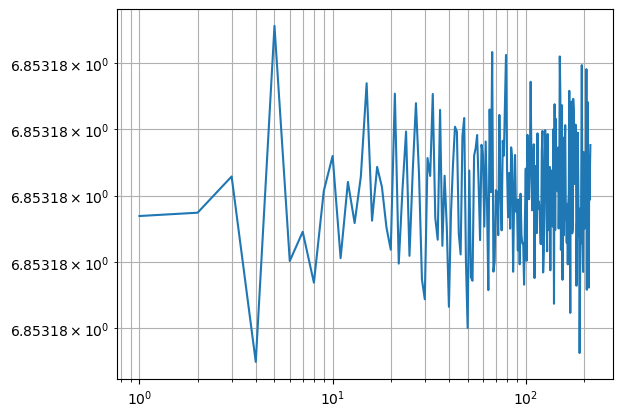

In [518]:
plt.plot(t/hours,cmuei_rot*ki_rot**2/epsi_rot/nui_rot)
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/3751548794.py:7: RuntimeWarning: invalid value encountered in divide
  ax.plot(t/hour,cmuei_rot*ki_rot**2/epsi_rot, label = 'nu calculé')


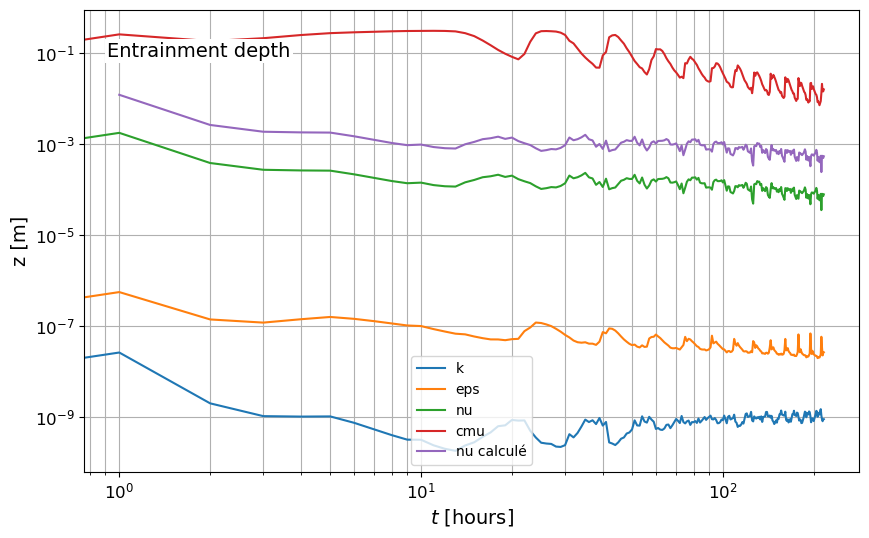

In [519]:
fig,ax=  plt.subplots(1, figsize=(10, 6))
#ax.plot(t/hour,h_rot,color= 'r', label = 'h' )
ax.plot(t/hour,ki_rot**2, label = 'k')
ax.plot(t/hour,epsi_rot, label = 'eps')
ax.plot(t/hour,nui_rot, label = 'nu')
ax.plot(t/hour,cmuei_rot, label = 'cmu')
ax.plot(t/hour,cmuei_rot*ki_rot**2/epsi_rot, label = 'nu calculé')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower center')
ax.text(0.03, 0.89, 'Entrainment depth', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
ax.set_ylabel('z [m]', fontsize=14)
ax.set_xlabel('$t$ [hours]', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(which='both')


##### Comparer u*dh/dt et nu du/dz à l'interface

/Users/maxcoppin/anaconda3/envs/gotm/lib/python3.9/site-packages/xarray/core/computation.py:808: RuntimeWarning: divide by zero encountered in divide
  result_data = func(*input_data)
/Users/maxcoppin/anaconda3/envs/gotm/lib/python3.9/site-packages/xarray/core/computation.py:808: RuntimeWarning: invalid value encountered in multiply
  result_data = func(*input_data)
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/2771258610.py:14: RuntimeWarning: invalid value encountered in divide
  plt.plot(t/hours,(dudzi_rot+dvdzi_rot)*(cmuei_rot*ki_rot**2/epsi_rot)*rho0,label=r'$\nu_i$ $\frac{du}{dz}$ - calculé')


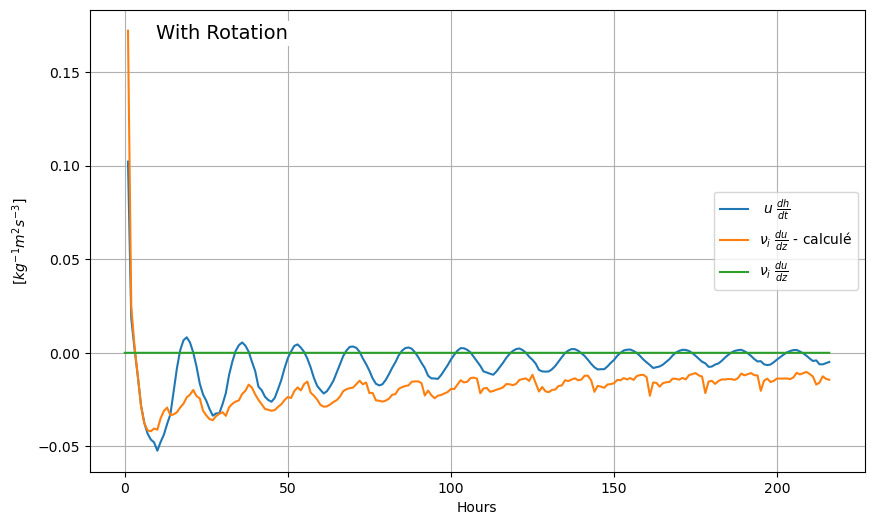

In [520]:
#dhdt_rot = np.gradient(h_rot)
#dEp_rot = np.pad(dEp_rot, (0,0))
dhdt_rot = 4*dEp_rot/(rho0*NN0**2*h_rot**2)


#dhdt_norot = 4*dEp_norot/(rho0*NN0**2*h_rot**2)
dhdt_norot = np.gradient(h_norot)


plt.figure(figsize=(10, 6))

#plt.plot(t/hours,dhdt_rot,label='$dhdt $')
plt.plot(t/hours,(ui_rot+vi_rot)*dhdt_rot,label=r' $u$ $\frac{dh}{dt}$ ')
plt.plot(t/hours,(dudzi_rot+dvdzi_rot)*(cmuei_rot*ki_rot**2/epsi_rot)*rho0,label=r'$\nu_i$ $\frac{du}{dz}$ - calculé')
plt.plot(t/hours,(dudzi_rot+dvdzi_rot)*nui_rot,label=r'$\nu_i$ $\frac{du}{dz}$')
#plt.plot(t/hours,dudzi_rot,label='$dudz $')
#plt.plot(t/hours,nui_rot,label='$nui $')
plt.grid()
plt.xlabel('Hours')
plt.ylabel('$[kg^{-1}m^2s^{-3}]$')
plt.text(0.04, 0.9, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.legend(loc='center right')
plt.show()



# Efficacité de mélange 

On cherche a verifier que $\Gamma = \frac{1}{4}\frac{hi}{h}$ 


Si on pose $Ri =1/4$ on en déduit que $h_i = \frac{1}{4}\frac{U_0^2}{N^2} \frac{1}{h}$

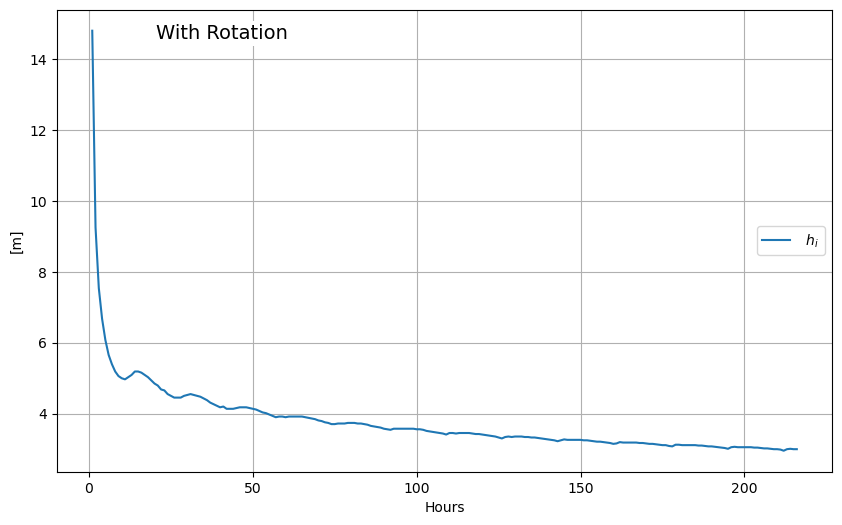

<xarray.Variable ()>
array(2.99392031)
Attributes:
    units:      m
    long_name:  surface mixed layer depth
    path:       /surface

In [521]:
h_i = 1/2 * U_rot_meaned**2/NN0 /h_rot     # On rappel que NN0 represente N^2 

plt.figure(figsize=(10, 6))
plt.plot(t/hours,h_i,label=r' $h_i$ ')

plt.grid()
plt.xlabel('Hours')
plt.ylabel('[m]')
plt.text(0.04, 0.9, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.legend(loc='center right')
plt.show()

h_i[-1]

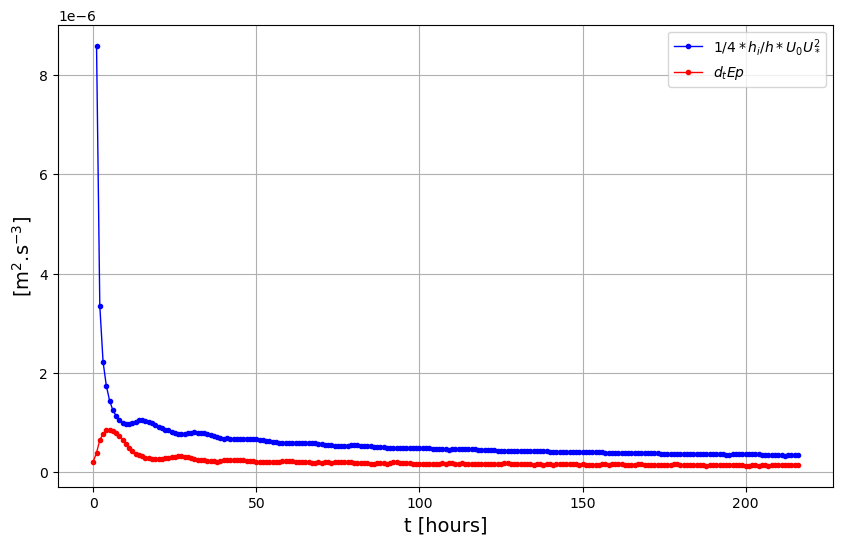

In [522]:
plt.figure(figsize=(10, 6))
plt.plot(t/hours,0.25* h_i /h_rot*U_rot_meaned*u_taus_rot**2,'.-', color='b', linewidth=1,label='$1/4  *h_i/h  * U_0 U_*^2 $')
#plt.plot(t/hours, epsilon_rot,'.-', color='r', linewidth=1,label='$\epsilon_{moyen}$')
plt.plot(t/hours, dEp_rot/rho0,'.-', color='r', linewidth=1,label='$d_t Ep$')
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend()
#plt.xscale('log')
#plt.yscale('log')
plt.grid(which='both')

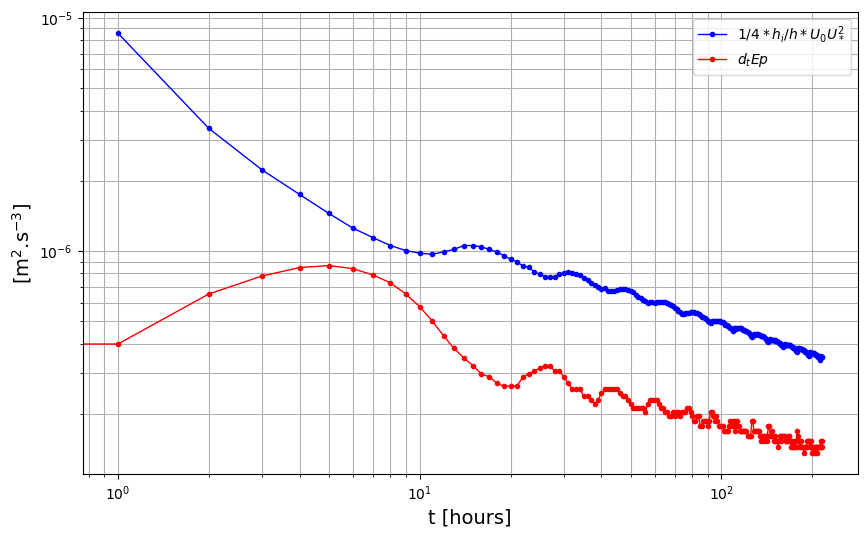

In [523]:
plt.figure(figsize=(10, 6))
plt.plot(t/hours,0.25* h_i /h_rot*U_rot_meaned*u_taus_rot**2,'.-', color='b', linewidth=1,label='$1/4 *h_i/h  * U_0 U_*^2 $')
#plt.plot(t/hours, epsilon_rot,'.-', color='r', linewidth=1,label='$\epsilon_{moyen}$')
plt.plot(t/hours, dEp_rot/rho0,'.-', color='r', linewidth=1,label='$d_t Ep$')
plt.ylabel('[m$^{2}$.s$^{-3}$]', fontsize=14)
plt.xlabel('t [hours]', fontsize=14)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')

In [524]:
u_taus_rot

<xarray.Variable (time: 217)>
array([0.      , 0.010001, 0.010001, ..., 0.010001, 0.010001, 0.010001],
      dtype=float32)
Attributes:
    units:      m/s
    long_name:  surface friction velocity
    path:       /surface

# Test de la loi de h

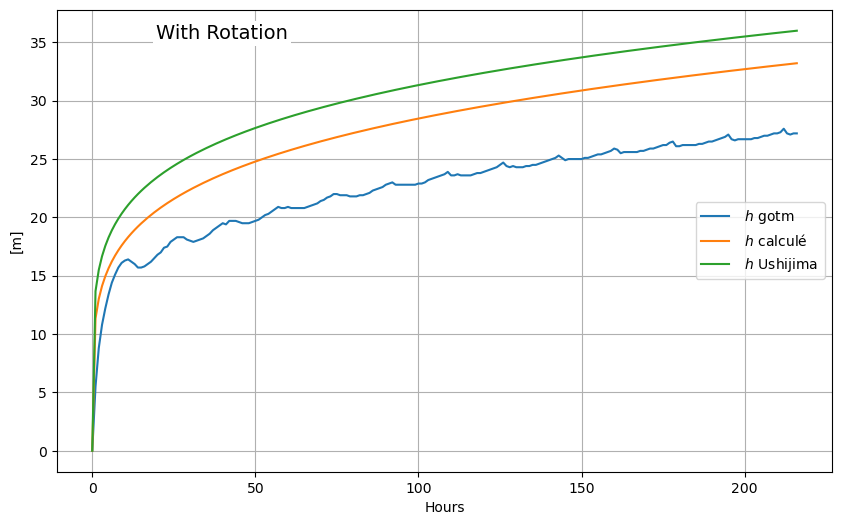

In [525]:
t_15 = (t)**(1/5)
t_uj = (t*f)**(0.18)
t_13 = (t)**(1/3)


h_scale = (5/2 * (U_rot_meaned*u_taus_rot**2)*U_rot_meaned**2/NN0**2)**(1/5) *t_15   # On rappel que NN0 represente N^2 
h_uj = 1.5 *(u_taus_rot/np.sqrt(np.sqrt(NN0)*f))*(f/np.sqrt(NN0))**(-2.2e-2)*t_uj
#h_uj = 3/4**1.5 *(u_taus_rot/np.sqrt(np.sqrt(NN0)*f))*(f/np.sqrt(NN0))**(-2.2e-2)*t_uj

plt.figure(figsize=(10, 6))
plt.plot(t/hours,h_rot,label=r' $h$ gotm ')
plt.plot(t/hours,h_scale,label=r' $h$ calculé ')
plt.plot(t/hours,h_uj,label=r' $h$ Ushijima ')
plt.grid()
plt.xlabel('Hours')
plt.ylabel('[m]')
plt.text(0.04, 0.9, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.legend(loc='center right')

#plt.xscale('log')
#plt.yscale('log')
plt.grid(which='both')
plt.grid()
plt.show()

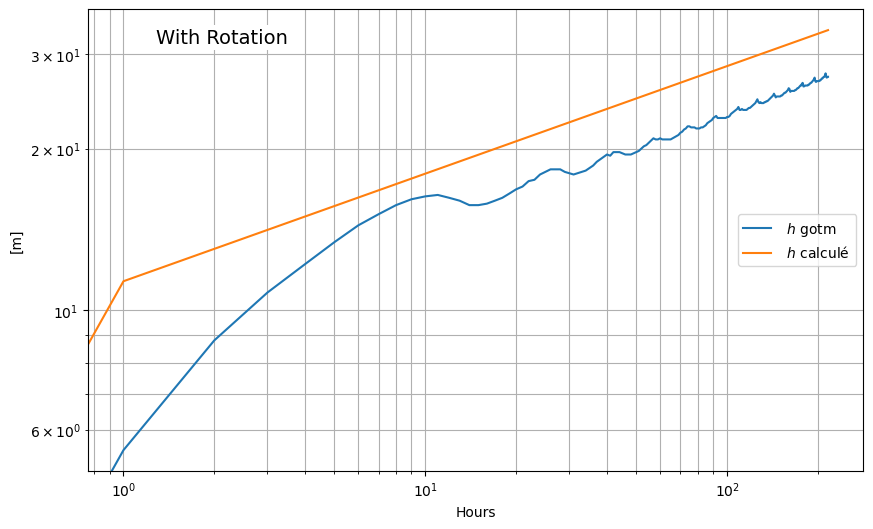

In [526]:
t_15 = (t)**(1/5)
h_scale = (5/2 * (U_rot_meaned*u_taus_rot**2)*U_rot_meaned**2/NN0**2)**(1/5) *t_15   # On rappel que NN0 represente N^2 

plt.figure(figsize=(10, 6))
plt.plot(t/hours,h_rot,label=r' $h$ gotm ')
plt.plot(t/hours,h_scale,label=r' $h$ calculé ')
 
plt.grid()
plt.xlabel('Hours')
plt.ylabel('[m]')
plt.text(0.04, 0.9, 'With Rotation', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax.transAxes, fontsize=14, bbox=bprops)
plt.legend(loc='center right')

plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.grid()
plt.show()

In [527]:
1/2+1/5


0.7

In [528]:
h_rot

<xarray.Variable (time: 217)>
array([ 0. ,  5.5,  8.8, ..., 27.1, 27.2, 27.2], dtype=float32)
Attributes:
    units:      m
    long_name:  surface mixed layer depth
    path:       /surface

# Dignostique de l'energie potentiel, evolution de la flotabilité local et flux de la flotabilite 

On vas dans un premier temps regarder l'evolution local de la flotabiité 
$$\frac{d}{dt}(-zb) = -z\frac{db}{dt}-wb$$
Avec le membre de gauche l'evolution local de flotabilité, et a droite le flux verticale de flotabilitée


Nous allons procéder en 4 etapes : 
1. Regarder spatialement les zones où il y a un Gain_space d'energie potentiel entre deux pas de temps, et celles où il y a une perte
2. Diagnostiquer qualitativement les  dimentions spatial de ces zones
3. Diagnostiquer qualitativement le bilan d'evolution d'énergie potentiel par unité spatial (et comparaison à h)
4. Dissocier l'evolution de l'énergie potentile en une partie locale et une partie flux

In [529]:
##### Energie potentiel calculé a partir de b ######
ep_rot = -z*b_rot
ep_norot = -z*b_norot

dtb_rot = np.diff(b_rot, axis=0)/dt
dtb_rot = np.pad(dtb_rot , ((1, 0), (0, 0)))

zdtb_rot = -z*dtb_rot


dtep_rot = np.diff(ep_rot, axis=0)/dt
dtep_rot = np.pad(dtep_rot , ((1, 0), (0, 0)))

dtep_norot = np.diff(ep_norot, axis=0)/dt
dtep_norot = np.pad(dtep_norot , ((1, 0), (0, 0)))

dtEp_rot            = np.zeros(t.size)
dtEp_norot          = np.zeros(t.size)
for i in range (len(t)):
    dtEp_rot[i]     = np.sum((dtep_rot[i,:])*dz)
    dtEp_norot[i]   = np.sum((dtep_norot[i,:])*dz)

###### Je crer un array pour determiner spatialement où se situe la perte ou le Gain_space d'energie potentiel ####

gain_loss_ep_rot = np.zeros(ep_rot.shape)
gain_loss_ep_norot = np.zeros(ep_norot.shape)

### je vais créer 3 liste d'indice ####
H_lim = -50
#H_lim = 0

# Pour le Gain_space d'Ep 
id_dtep_pos_rot = np.where((dtep_rot>0)& (z > H_lim))
gain_loss_ep_rot[id_dtep_pos_rot] = 1

id_dtep_pos_norot = np.where((dtep_norot>0))
gain_loss_ep_norot[id_dtep_pos_norot] = 1

# Pour la perte d'Ep 
id_dtep_neg_rot = np.where((dtep_rot<0)& (z > H_lim))
gain_loss_ep_rot[id_dtep_neg_rot] = -1

id_dtep_neg_norot = np.where((dtep_norot<0))
gain_loss_ep_norot[id_dtep_neg_norot] = -1

# Ep constant
id_dtep_nul_rot = np.where((dtep_rot==0)& (z > H_lim))
gain_loss_ep_rot[id_dtep_nul_rot] = 0

id_dtep_nul_norot = np.where((dtep_norot==0))
gain_loss_ep_norot[id_dtep_nul_norot] = 0


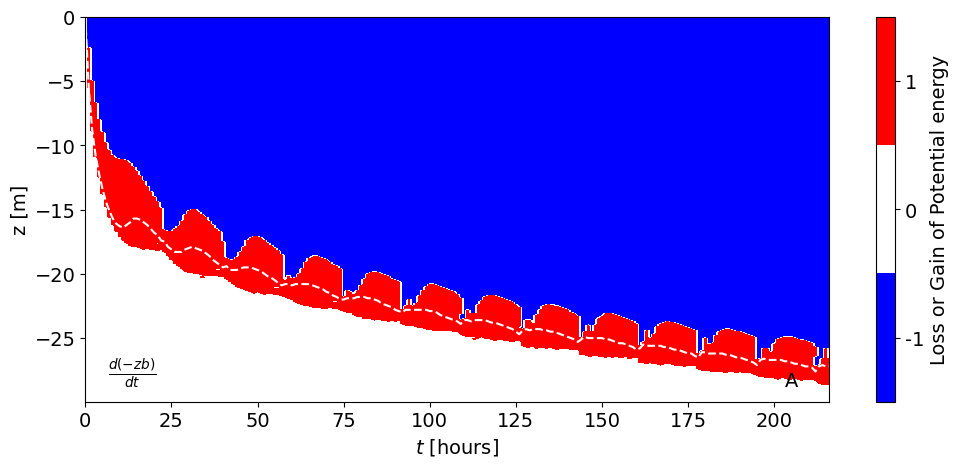

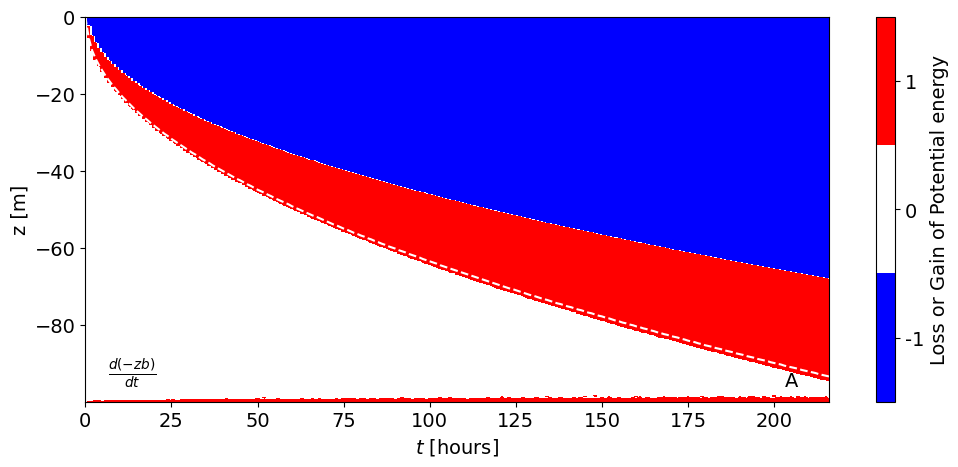

In [530]:

cmap_custom = ListedColormap(['blue', 'white', 'red'])

fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)

CS1 = ax1.contourf(t/hour, z1D, gain_loss_ep_rot.T, levels=[-1.5, -0.5, 0.5, 1.5], cmap=cmap_custom)
ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r'$\frac{d(-zb)}{dt}$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+70, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)

# Ajouter une colorbar avec les valeurs -1, 0, 1
colorbar = fig1.colorbar(CS1, ax=ax1, ticks=[-1, 0, 1])
colorbar.set_label('Loss or Gain of Potential energy', fontsize=14)
colorbar.ax.tick_params(labelsize=14)
colorbar.set_ticklabels(['-1', '0', '1'])

plt.show()

fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)

CS1 = ax1.contourf(t/hour, z1D, gain_loss_ep_norot.T, levels=[-1.5, -0.5, 0.5, 1.5], cmap=cmap_custom)
ax1.plot(t/hour, -h_norot, '--', color='w',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r'$\frac{d(-zb)}{dt}$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)

# Ajouter une colorbar avec les valeurs -1, 0, 1
colorbar = fig1.colorbar(CS1, ax=ax1, ticks=[-1, 0, 1])
colorbar.set_label('Loss or Gain of Potential energy', fontsize=14)
colorbar.ax.tick_params(labelsize=14)
colorbar.set_ticklabels(['-1', '0', '1'])


## 1. Spatial distribution of Gain and Loss of potential energy

1.999969482421875

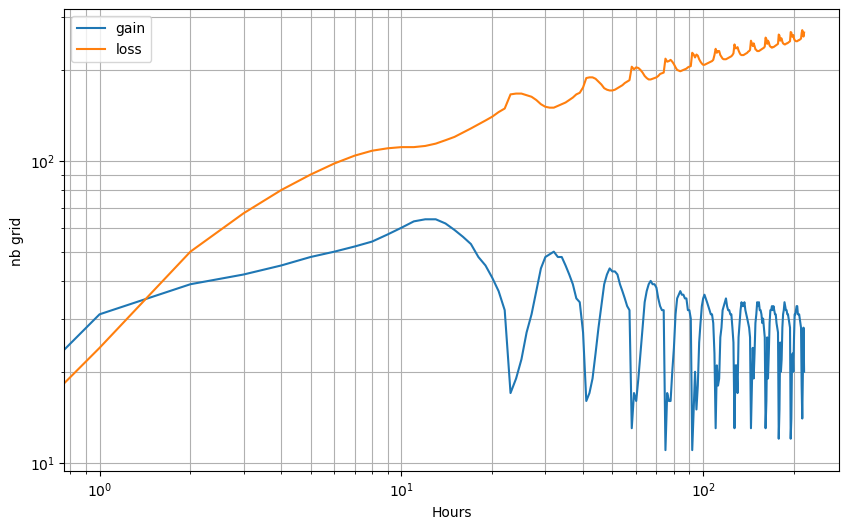

In [531]:
Gain_space =np.zeros(t.size)
Loss_space = np.zeros(t.size)
for i in range (t.size):
    Gain_space[i] = np.shape(np.where(gain_loss_ep_rot[i]==+1))[1]
    Loss_space[i] = np.shape(np.where(gain_loss_ep_rot[i]==-1))[1]

plt.figure(figsize=(10, 6))
plt.xlabel('Hours')
plt.ylabel('nb grid')

plt.plot(t/hour, Gain_space, label = 'gain')
plt.plot(t/hour, Loss_space, label = 'loss')
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.legend()
Gain_space[-1]*dz

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/2759746003.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(t/hours,Gain_space/Loss_space, label = 'Nb maille Lose_space/Gain_space')


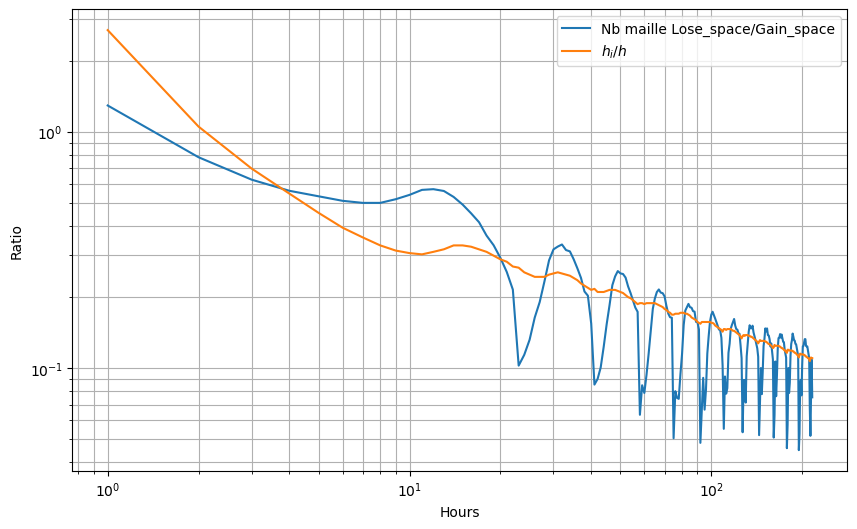

In [532]:
plt.figure(figsize=(10, 6))
plt.xlabel('Hours')
plt.ylabel('Ratio')
plt.plot(t/hours,Gain_space/Loss_space, label = 'Nb maille Lose_space/Gain_space')
plt.plot(t/hours, h_i/h_rot , label='$h_i/h$')


plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.legend()

## 2. Variation de l'energie potentiel dans : la couche de mélange/ Interface

In [533]:
dtep_ML_rot = np.zeros(t.size)
dtep_itf_rot = np.zeros(t.size) # interface

for it in range (t.size):
    # Pour le Gain_space d'Ep 
    id_dtep_pos_rot = np.where((dtep_rot[it,:]>0)& (z[it,:] > H_lim))   #creation d'une liste d'indice pour chaque pas de temps
    dtep_itf_rot[it] = np.sum(dtep_rot[it,id_dtep_pos_rot]*dz)
    print(dtep_rot[it,id_dtep_pos_rot])

# Pour la perte d'Ep 
    id_dtep_neg_rot = np.where((dtep_rot[it,:]<0)& (z[it,:] > H_lim))
    dtep_ML_rot[it] = np.sum(dtep_rot[it,id_dtep_neg_rot]*dz)
    
#dtep_MLD_rot = np.sum(dtep_rot[id_dtep_neg_rot], axis=1)


[]
[[6.62273847e-11 4.46372574e-08 1.01460351e-07 1.38249661e-07
  1.52273316e-07 1.54972071e-07 1.53448852e-07 1.50700416e-07
  1.47041348e-07 1.42670345e-07 1.37703282e-07 1.32289202e-07
  1.26477744e-07 1.20318603e-07 1.13861425e-07 1.07139350e-07
  1.00193752e-07 9.30660278e-08 8.58141291e-08 7.84960079e-08
  7.11364905e-08 6.38018065e-08 5.65002374e-08 4.93228427e-08
  4.23027409e-08 3.54399283e-08 2.88089108e-08 2.24096901e-08
  1.62753793e-08 1.04390914e-08 4.90910468e-09]]
[[3.3113692e-10 8.6095602e-09 3.6656857e-08 7.0896412e-08 1.0136101e-07
  1.2871291e-07 1.5407801e-07 1.7788675e-07 2.0013916e-07 2.2057030e-07
  2.3906429e-07 2.5543901e-07 2.6972756e-07 2.8188029e-07 2.9193029e-07
  2.9997693e-07 3.0606986e-07 3.1034151e-07 3.1285816e-07 3.1376879e-07
  3.1313962e-07 3.1113623e-07 3.0782488e-07 3.0338765e-07 2.9784110e-07
  2.9133426e-07 2.8394990e-07 2.7582050e-07 2.6697913e-07 2.5754173e-07
  2.4759106e-07 2.3716026e-07 2.2639831e-07 2.1528867e-07 2.0389756e-07
  1.478195

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/2266399041.py:16: RuntimeWarning: invalid value encountered in divide
  plt.plot(t/hour,dtep_itf_rot/(-dtep_ML_rot), label = r'$Ep_{interface}/Ep_{ML}$')


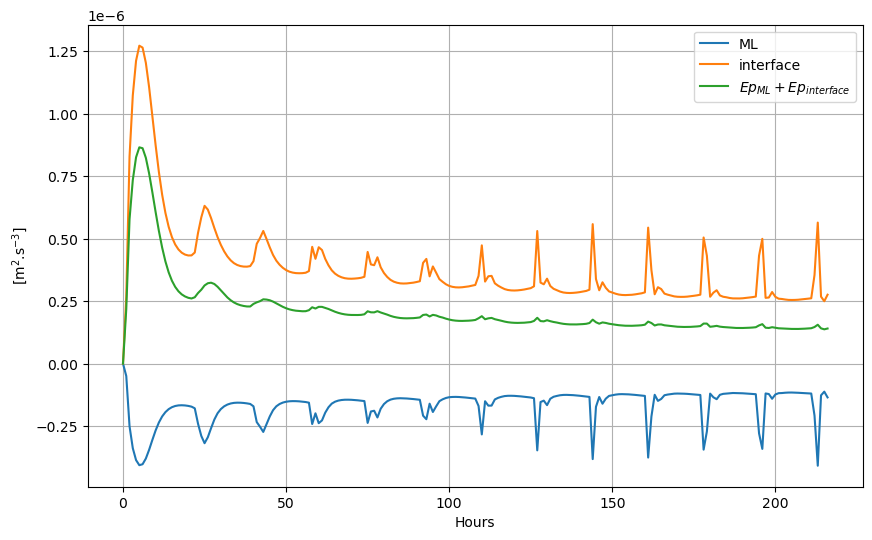

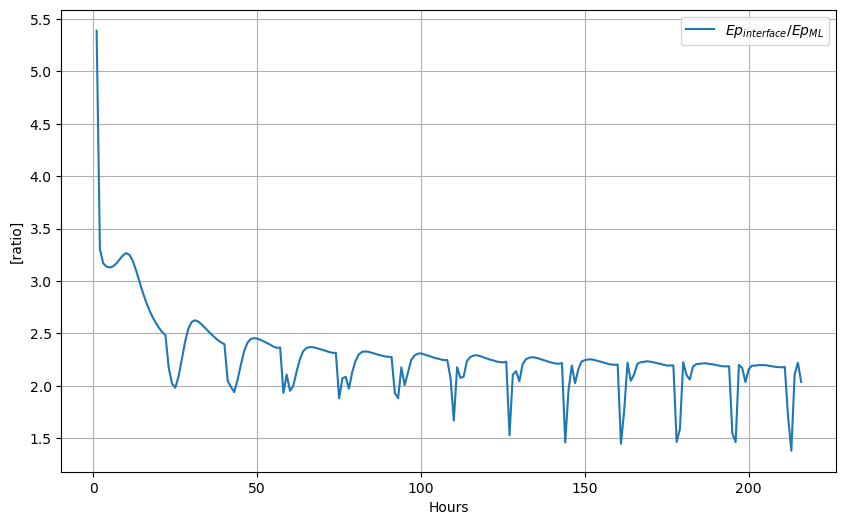

In [534]:
plt.figure(figsize=(10, 6))
plt.xlabel('Hours')
plt.ylabel('[m$^{2}$.s$^{-3}$]')
plt.plot(t/hour, dtep_ML_rot, label = 'ML')
plt.plot(t/hour,dtep_itf_rot, label = 'interface')
plt.plot(t/hour,dtep_itf_rot+dtep_ML_rot, label = r'$Ep_{ML}+ Ep_{interface}$')
#plt.plot(t/hour,dtEp_rot,'--' ,label = 'Ep calculé sur la colonne')
#plt.xscale('log')
#plt.yscale('log')
plt.grid(which='both')
plt.legend()

plt.figure(figsize=(10, 6))
plt.xlabel('Hours')
plt.ylabel('[ratio]')
plt.plot(t/hour,dtep_itf_rot/(-dtep_ML_rot), label = r'$Ep_{interface}/Ep_{ML}$')
#plt.plot(t/hour,dtEp_rot,'--' ,label = 'Ep calculé sur la colonne')
#plt.xscale('log')
#plt.yscale('log')
plt.grid(which='both')
plt.legend()

## 3. Variation de l'energie potentiel ponderé par epaisseur de couche: la couche de mélange/ Interface

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/2362053882.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(t/hour, dtep_ML_rot/Loss_space, label = 'ML')
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/2362053882.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(t/hour,dtep_itf_rot/Gain_space, label = 'interface')
/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/2362053882.py:16: RuntimeWarning: invalid value encountered in divide
  plt.plot(t/hour,(dtep_itf_rot/Loss_space)/(-dtep_ML_rot/Gain_space), label = r'$Ep_{MLD}+ Ep_{interface}$')


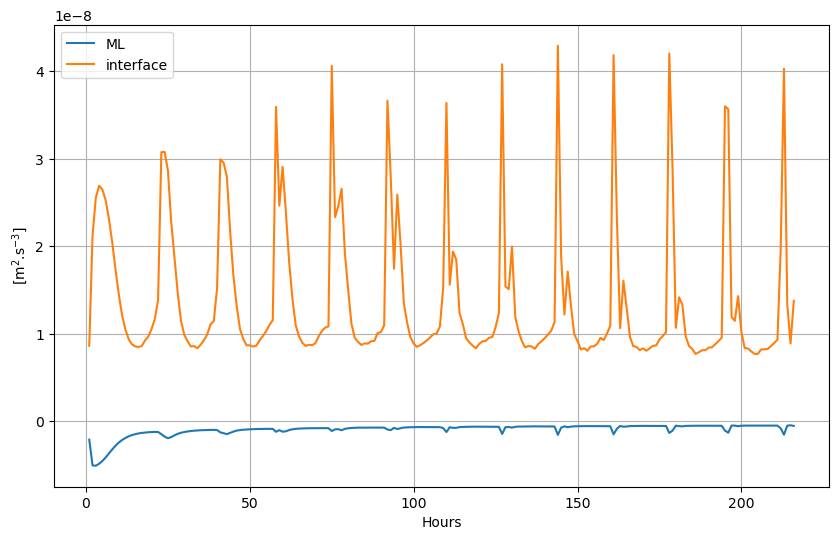

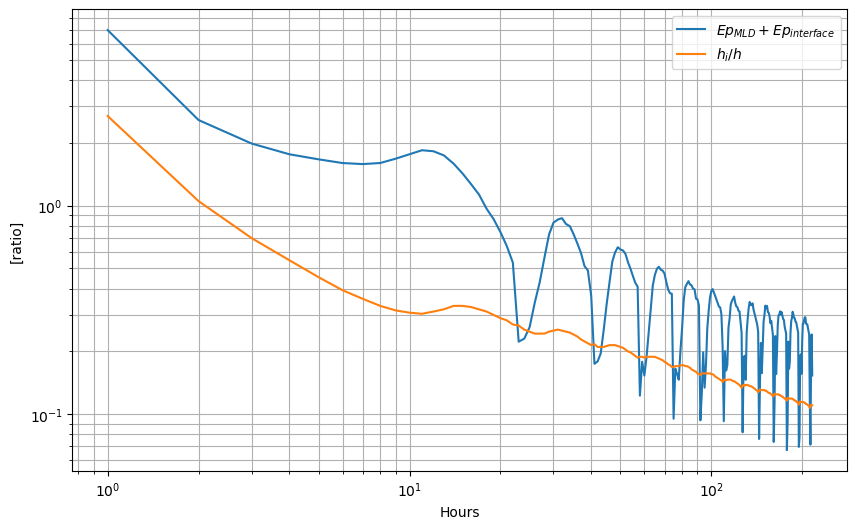

In [535]:
plt.figure(figsize=(10, 6))
plt.xlabel('Hours')
plt.ylabel('[m$^{2}$.s$^{-3}$]')
plt.plot(t/hour, dtep_ML_rot/Loss_space, label = 'ML')
plt.plot(t/hour,dtep_itf_rot/Gain_space, label = 'interface')
#plt.plot(t/hour,dtep_itf_rot+dtep_MLD_rot, label = r'$Ep_{MLD}+ Ep_{interface}$')
#plt.plot(t/hour,dtEp_rot,'--' ,label = 'Ep calculé sur la colonne')
#plt.xscale('log')
#plt.yscale('log')
plt.grid(which='both')
plt.legend()

plt.figure(figsize=(10, 6))
plt.xlabel('Hours')
plt.ylabel('[ratio]')
plt.plot(t/hour,(dtep_itf_rot/Loss_space)/(-dtep_ML_rot/Gain_space), label = r'$Ep_{MLD}+ Ep_{interface}$')
#plt.plot(t/hour,dtEp_rot,'--' ,label = 'Ep calculé sur la colonne')
plt.plot(t/hour,h_i/h_rot, label = r'$h_i/h$')
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.legend()

## 4. Dissociation de l'evolution de l'énergie potentile en une partie locale et une partie flux

$$\frac{d}{dt}(-zb) = -z\frac{db}{dt}-wb$$
Avec le membre de gauche l'evolution local de flotabilité, et a droite le flux verticale de flotabilitée

On a acces a $z$, $b$ mais pas a $w$, on vas donc devoir l'obtenir à partir des autres variables 

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/3108602723.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


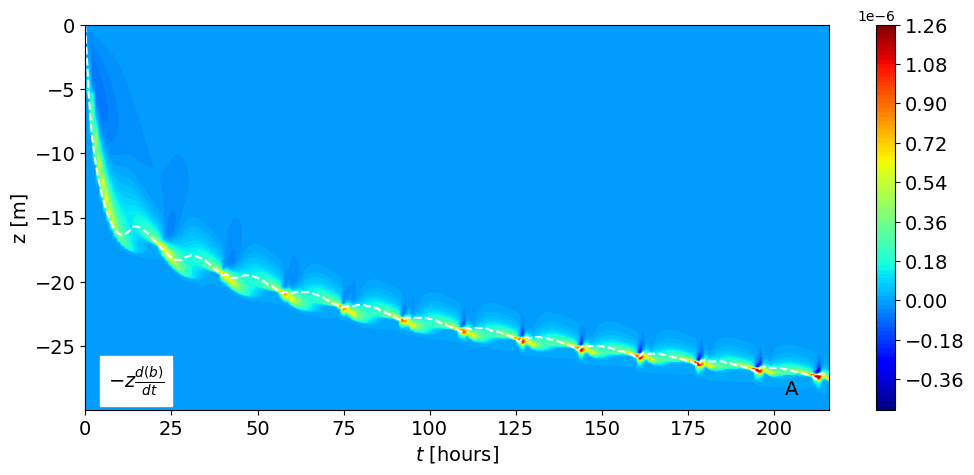

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/3108602723.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


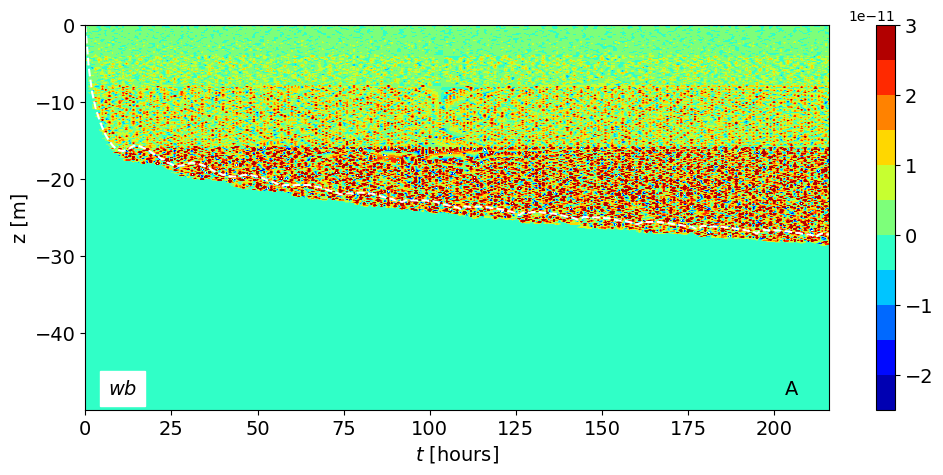

In [185]:

fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=100).tick_values(zdtb_rot.min(),zdtb_rot.max())
CS1 = ax1.contourf(t/hour, z1D, zdtb_rot.T, levels=levels, cmap=cmap)
ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r'$-z\frac{d(b)}{dt}$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+70, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )
colorbar.ax.tick_params(labelsize=14)


plt.show()


wb = dtep_rot-(zdtb_rot) #/b_rot
fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=10).tick_values(wb.min()/10,wb.max()/10)
CS1 = ax1.contourf(t/hour, z1D, wb.T, levels=levels, cmap=cmap)
ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r'$wb$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+50, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )
colorbar.ax.tick_params(labelsize=14)


plt.show()

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/711210698.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


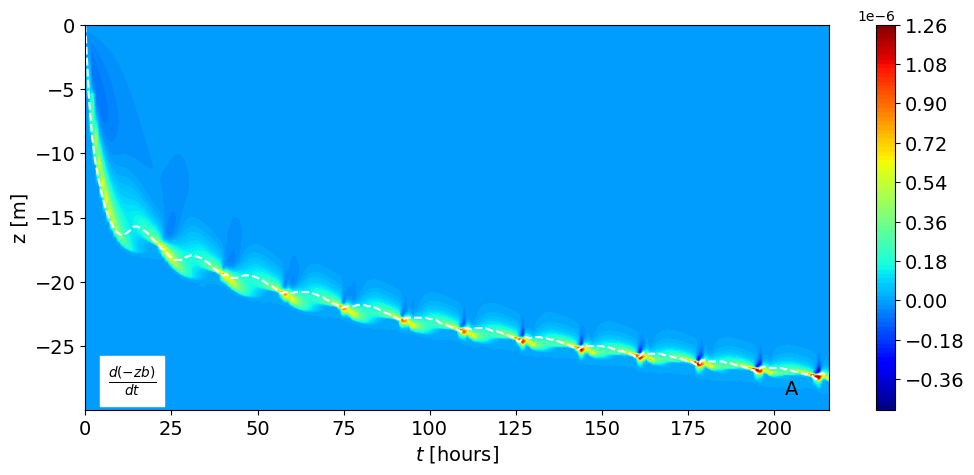

In [186]:

fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=100).tick_values(dtep_rot.min(),dtep_rot.max())
CS1 = ax1.contourf(t/hour, z1D, dtep_rot.T, levels=levels, cmap=cmap)
ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r'$\frac{d(-zb)}{dt}$', verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+70, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )

colorbar.ax.tick_params(labelsize=14)


plt.show()

# Diagnostique des Flux verticaux 

on peut calculer les transport turbulent $\langle u_i'w'\rangle$ a partir du model $k-eps$ de même pour le transport turbulent de chaleur 

$$\langle w' T'\rangle = c_{\mu}' \frac{k^2}{\epsilon}\frac{dT}{dz}$$





## Diagnostique des flux d'energies 


On a comme variables local : 
- la flotabilité : $b$ -> energie potentiel locale (de chaque maille)
- les vitesse horizontale $u,v$  -> energie cinetique du courant moyen
- L'energie cinetique turbulente (tke)
- les termes de transport turbulent
- La dissipation $ \epsilon$
  

In [187]:
dudz_rot = np.diff(u_rot,axis=1)/dz
dudz_rot=np.pad(dudz_rot,((0,0),(1,1)))
dudz_norot = np.diff(u_norot,axis=1)/dz
dudz_norot=np.pad(dudz_norot,((0,0),(1,1)))
dvdz_rot = np.diff(v_rot,axis=1)/dz
dvdz_rot=np.pad(dvdz_rot,((0,0),(1,1)))
dvdz_norot = np.diff(v_norot,axis=1)/dz
dvdz_norot=np.pad(dvdz_norot,((0,0),(1,1)))

dzT_rot = np.diff(T_rot,axis=1)/dz
dzT_rot=np.pad(dzT_rot,((0,0),(1,1)))


dzT_norot = np.diff(T_norot,axis=1)/dz
dzT_norot=np.pad(dzT_norot,((0,0),(1,1)))

dzb_rot = np.diff(b_rot,axis=1)/dz
dzb_rot=np.pad(dzb_rot,((0,0),(1,1)))

In [188]:
wb_rot = (nu_prime_rot * dzb_rot)/eps_rot

wb_rot[0,:]=np.zeros(len(zi[0]))

wT_rot = (nu_prime_rot * dzT_rot)/eps_rot

wT_rot[0,:]=np.zeros(len(zi[0]))
wT_norot = nu_prime_norot * dzT_norot
uw_rot = nu_rot * dudz_rot
uw_norot = nu_norot * dudz_norot
vw_rot = nu_rot * dvdz_rot
vw_norot = nu_norot * dvdz_norot


### With rotation

In [189]:
np.max(wT_rot ), np.max(eps_rot)


(<xarray.Variable ()>
 array(312.43906, dtype=float32),
 <xarray.Variable ()>
 array(6.012979e-05, dtype=float32))

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/305839289.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


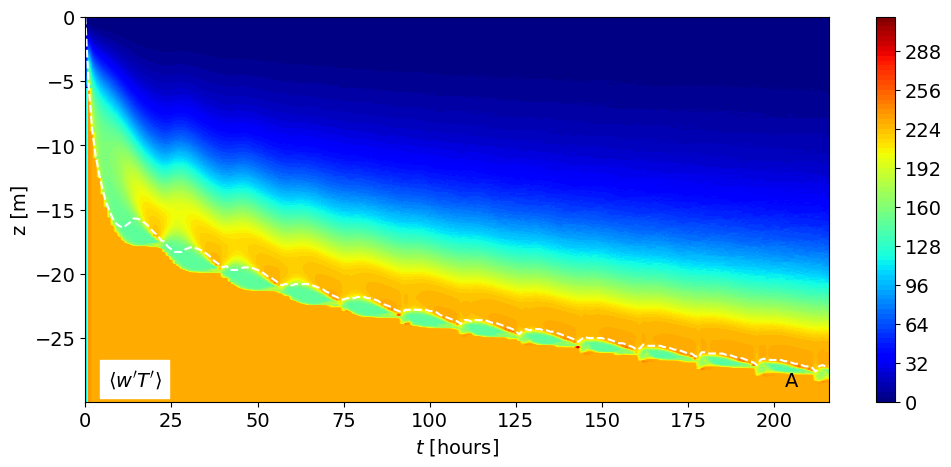

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/305839289.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


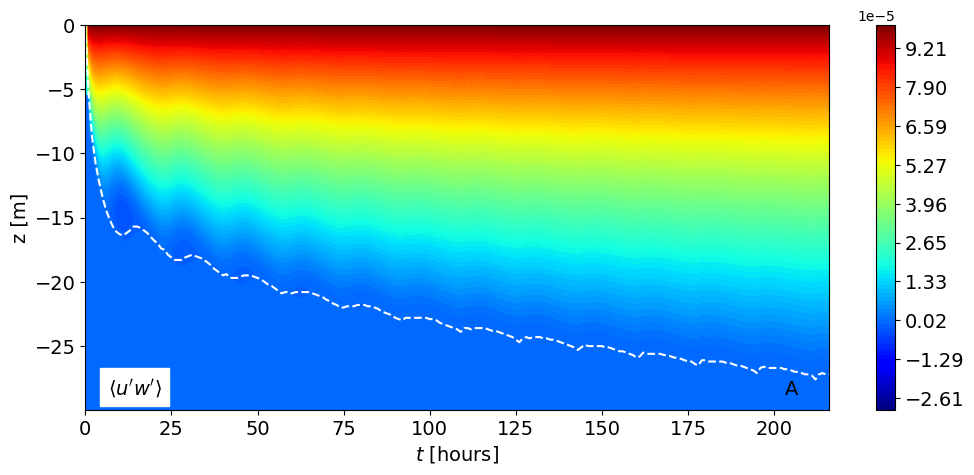

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/305839289.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


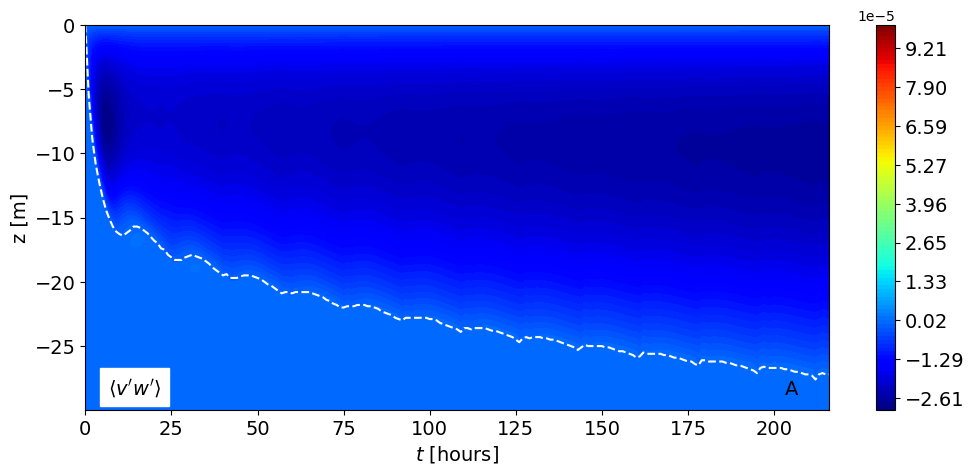

In [190]:
level = np.linspace(-3e-5,1e-4,100)
fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=100).tick_values(wT_rot.min(),wT_rot.max())
CS1 = ax1.contourf(t/hour, zi1D, wT_rot.T, levels=levels, cmap=cmap)
#CS1 = ax1.contourf(t/hour, zi1D, wT_rot.T, levels=level, cmap=cmap)
ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r"$\langle w'T'\rangle$", verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+70, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )

colorbar.ax.tick_params(labelsize=14)


plt.show()


fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=100).tick_values(uw_rot.min(),uw_rot.max())
#CS1 = ax1.contourf(t/hour, zi1D, uw_rot.T, levels=levels, cmap=cmap)
CS1 = ax1.contourf(t/hour, zi1D, uw_rot.T, levels=level, cmap=cmap)
ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r"$\langle u'w'\rangle$", verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+70, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )

colorbar.ax.tick_params(labelsize=14)


plt.show()


fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=100).tick_values(vw_rot.min(),vw_rot.max())
#CS1 = ax1.contourf(t/hour, zi1D, vw_rot.T, levels=levels, cmap=cmap)
CS1 = ax1.contourf(t/hour, zi1D, vw_rot.T, levels=level, cmap=cmap)
ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r"$\langle v'w'\rangle$", verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+70, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )

colorbar.ax.tick_params(labelsize=14)


plt.show()

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/1986610200.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


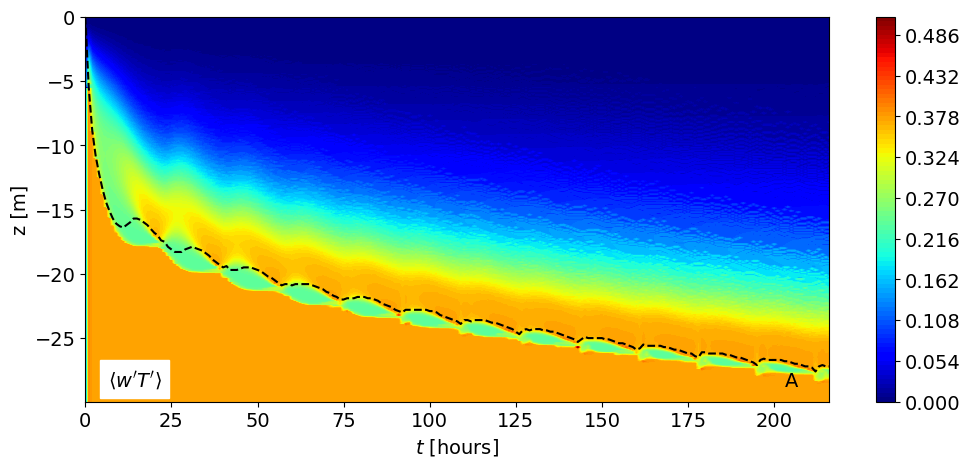

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/1986610200.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


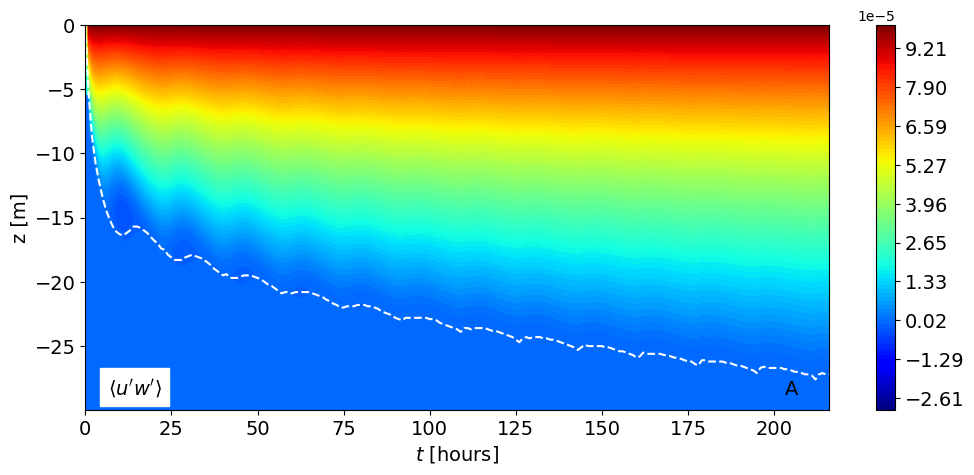

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/1986610200.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


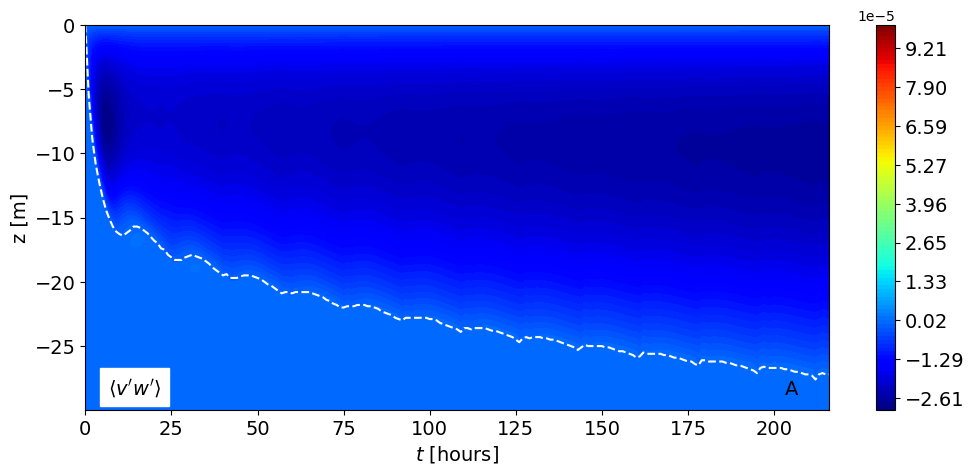

In [191]:
level = np.linspace(-3e-5,1e-4,100)
fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
#levels = MaxNLocator(nbins=100).tick_values(wT_rot.min(),wT_rot.max())
levels = MaxNLocator(nbins=100).tick_values(wb_rot.min(),wb_rot.max())
CS1 = ax1.contourf(t/hour, zi1D, wb_rot.T, levels=levels, cmap=cmap)
#CS1 = ax1.contourf(t/hour, zi1D, wT_rot.T, levels=level, cmap=cmap)
ax1.plot(t/hour, -h_rot, '--', color='k',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r"$\langle w'T'\rangle$", verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+70, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )

colorbar.ax.tick_params(labelsize=14)


plt.show()


fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=100).tick_values(uw_rot.min(),uw_rot.max())
#CS1 = ax1.contourf(t/hour, zi1D, uw_rot.T, levels=levels, cmap=cmap)
CS1 = ax1.contourf(t/hour, zi1D, uw_rot.T, levels=level, cmap=cmap)
ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r"$\langle u'w'\rangle$", verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+70, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )

colorbar.ax.tick_params(labelsize=14)


plt.show()


fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=100).tick_values(vw_rot.min(),vw_rot.max())
#CS1 = ax1.contourf(t/hour, zi1D, vw_rot.T, levels=levels, cmap=cmap)
CS1 = ax1.contourf(t/hour, zi1D, vw_rot.T, levels=level, cmap=cmap)
ax1.plot(t/hour, -h_rot, '--', color='w',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r"$\langle v'w'\rangle$", verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H+70, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )

colorbar.ax.tick_params(labelsize=14)


plt.show()

### Without rotation

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/626909256.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


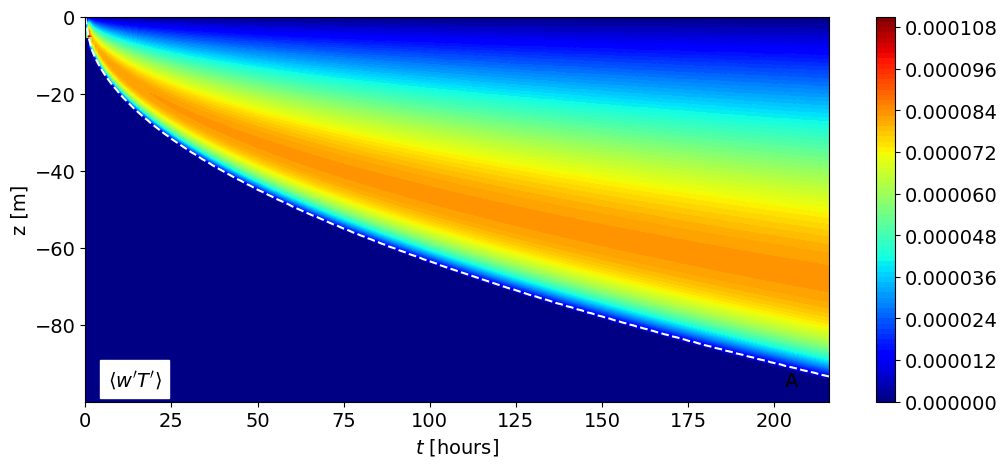

/var/folders/gl/qr_d872d4sj6k_rm1k6tskj80000gq/T/ipykernel_46044/626909256.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


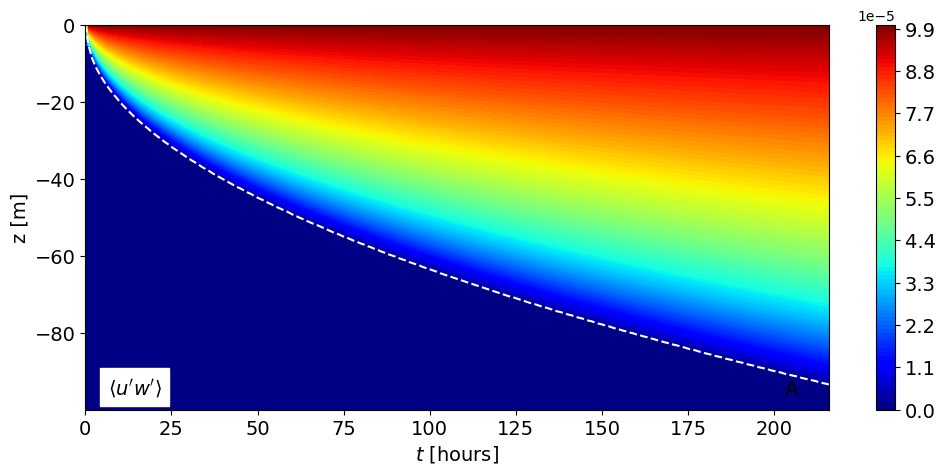

In [192]:

fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=100).tick_values(wT_norot.min(),wT_norot.max())
CS1 = ax1.contourf(t/hour, zi1D, wT_norot.T, levels=levels, cmap=cmap)
ax1.plot(t/hour, -h_norot, '--', color='w',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r"$\langle w'T'\rangle$", verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )

colorbar.ax.tick_params(labelsize=14)


plt.show()


fig1, (ax1) = plt.subplots(1, figsize=(12, 5))
plt.subplots_adjust(hspace=0.2)
cmap = plt.cm.get_cmap('jet')
levels = MaxNLocator(nbins=100).tick_values(uw_norot.min(),uw_norot.max())
CS1 = ax1.contourf(t/hour, zi1D, uw_norot.T, levels=levels, cmap=cmap)
ax1.plot(t/hour, -h_norot, '--', color='w',label='interface')

ax1.text(0.94, 0.03, 'A', verticalalignment='bottom', horizontalalignment='left',
         transform=ax1.transAxes, fontsize=14)
ax1.text(0.03, 0.03, r"$\langle u'w'\rangle$", verticalalignment='bottom', horizontalalignment='left',
         backgroundcolor='w', transform=ax1.transAxes, fontsize=14)
ax1.set_ylabel('z [m]', fontsize=14)
ax1.set_ylim([-H, 0])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('$t$ [hours]', fontsize=14)


colorbar = fig1.colorbar(CS1, ax=ax1 )

colorbar.ax.tick_params(labelsize=14)


plt.show()



# Couche d'interface $h_i$

/Users/maxcoppin/anaconda3/envs/gotm/lib/python3.9/site-packages/xarray/core/computation.py:808: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


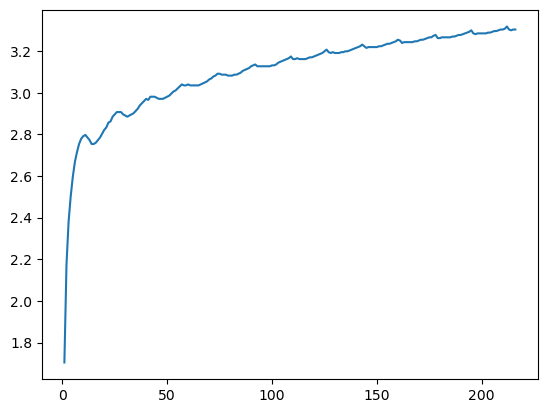

In [193]:
plt.plot(np.log(h_rot))

In [194]:
np.mean(h_rot)

<xarray.Variable ()>
array(22.486176, dtype=float32)

In [195]:
kappa = 0.41
hi_t = (us**2/(kappa**2*NN0 *h_rot))*np.log(h_rot[-1])**2
hi_t1 = (us**2/(kappa**2*NN0 *h_rot))*np.log(np.mean(h_rot))**2

/Users/maxcoppin/anaconda3/envs/gotm/lib/python3.9/site-packages/xarray/core/computation.py:808: RuntimeWarning: divide by zero encountered in divide
  result_data = func(*input_data)


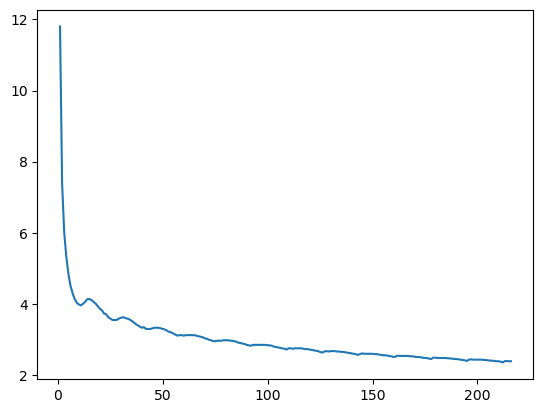

In [196]:
plt.plot(hi_t)

In [197]:
NN0

1e-04

Pour etre plus precis il nous faudrais la vitesse U0 juste au dessous de la couche de mélange 

Pour cela je pais prender l'indice du minimum de cisaillement de la vitesse 

In [198]:
id = np.zeros((len(t),2))
#    id[i,0] = np.where((dudz_rot[i]==np.min(dudz_rot[i])))[0]


###### Indice de l'interface de la couche de mélange et zone stablement stratifié #### 
id  = np.zeros(len(t),dtype=np.int64)
for i in range (len(t)):
    id[i]= np.argmin(dudz_rot[i].data)#+4  
   
#plt.plot(dudz_rot[-200]) 
id.shape

(217,)

In [199]:
#### Calcul de la u  pres de l'interface ######
ui= np.zeros((len(t)))
dudzi= np.zeros((len(t)))
for i in range (1,len(t)):
    j1 = id[i]
    
    ui[i] = u_rot[i,j1]
    dudzi[i] =dudz_rot[i,j1]

In [200]:
hi_n = (ui**2/(NN0 *h_rot))

/Users/maxcoppin/anaconda3/envs/gotm/lib/python3.9/site-packages/xarray/core/computation.py:808: RuntimeWarning: invalid value encountered in divide
  result_data = func(*input_data)


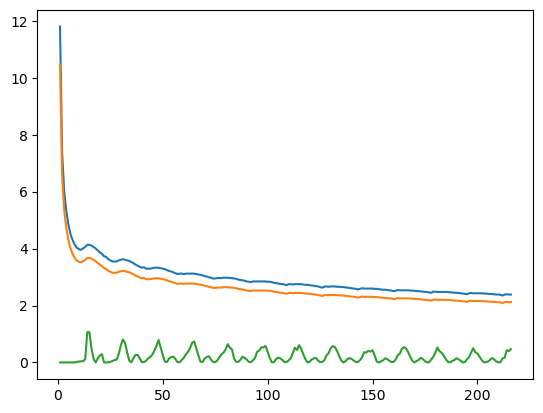

In [201]:
plt.plot(hi_t)
plt.plot(hi_t1)
plt.plot(hi_n)


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

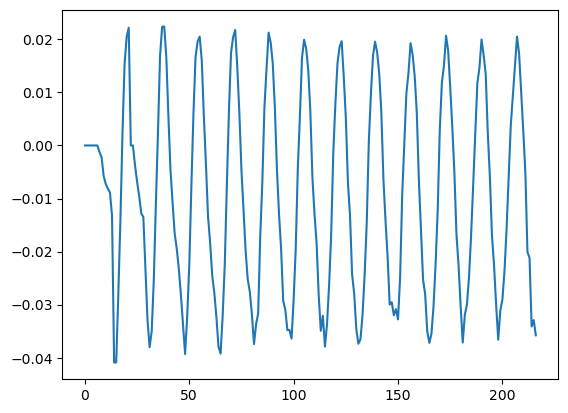

In [202]:
plt.plot(ui)
plt.plot

Comparaison des du/dz et u_i/hi

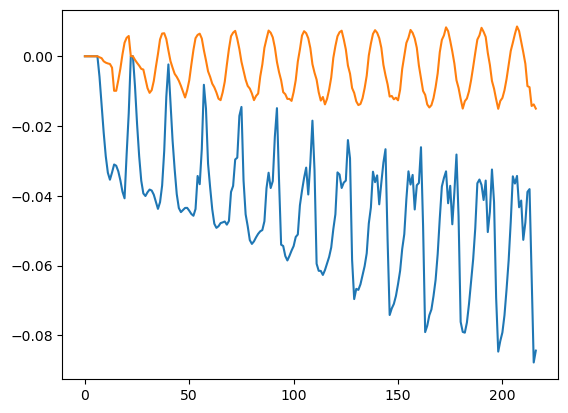

In [203]:
plt.plot(dudzi[:])
plt.plot(ui[:]/hi_t[:])